In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ÌïúÍ∏Ä Ìè∞Ìä∏(NanumGothic) ÏÑ§Ïπò
!apt-get update -qq
!apt-get install -qq -y fonts-nanum

# MatplotlibÏùò Í∏∞Î≥∏ Ìè∞Ìä∏ ÏÑ§Ï†ï
import matplotlib.font_manager as fm

plt.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ

# NanumGothic Ìè∞Ìä∏ Í≤ΩÎ°ú ÌôïÏù∏ Î∞è Ï†ÅÏö©
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path, size=12)

# MatplotlibÏùò Ìè∞Ìä∏ Ï∫êÏãú ÏÇ≠Ï†ú ÌõÑ ÏóÖÎç∞Ïù¥Ìä∏
fm.fontManager.addfont(font_path)  # Ìè∞Ìä∏ Ï∂îÍ∞Ä
plt.rc("font", family="NanumGothic")

print("ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï ÏôÑÎ£å!")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126315 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï ÏôÑÎ£å!


# Îç∞Ïù¥ÌÑ∞Î°úÎìú

In [3]:
df=pd.read_excel("/content/drive/MyDrive/LIKELION_·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®/finalproject/plz.xlsx")
df.head()

Unnamed: 0       eventid  iyear  imonth  iday country_txt  \
0       41069  199001000001   1990       1     0     Lebanon   
1       41070  199001010001   1990       1     1       India   
2       41071  199001010002   1990       1     1       India   
3       41072  199001010003   1990       1     1       India   
4       41073  199001010004   1990       1     1     Bolivia   

                   region_txt          provstate    latitude   longitude  \
0  Middle East & North Africa             Beirut   33.888523   35.503513   
1                  South Asia  Jammu and Kashmir    34.08374   74.789902   
2                  South Asia  Jammu and Kashmir    34.08374   74.789902   
3                  South Asia  Jammu and Kashmir    34.08374   74.789902   
4               South America         Cochabamba  -17.382789  -66.166439   

             city  success              attacktype1_txt  \
0         Matnzas        1  Hostage Taking (Kidnapping)   
1          Tucata        1            Bombing/Explosion   
2       Janajanea        1            Bombing/Explosion   
3  Junin district        1            Bombing/Explosion   
4           Junin        1            Bombing/Explosion   

                    targtype1_txt weaptype1_txt  nkill  nwound    natlty1_txt  \
0             Journalists & Media      Firearms    0.0       0        Lebanon   
1            Government (General)    Explosives    0.0       0          India   
2                        Business    Explosives    0.0       0          India   
3                  Transportation    Explosives    0.0       0          India   
4  Religious Figures/Institutions    Explosives    0.0       0  United States   

            gname  
0         Unknown  
1         Unknown  
2         Unknown  
3         Unknown  
4  Alejo Calatayu

## ÌïÑÏöîÌïú Ïª¨ÎüºÎßå Ï∂îÏ∂ú(19Í∞ú)

In [4]:
columns_to_extract = [
    'eventid',
    'iyear', 'imonth', 'iday',
    'country_txt', 'region_txt', 'provstate',
    'latitude', 'longitude', 'city', 'success',
    'attacktype1_txt', 'targtype1_txt', 'weaptype1_txt',
    'nkill', 'nwound', 'natlty1_txt','gname'
]

df=df[columns_to_extract]

# Îç∞Ïù¥ÌÑ∞ ÌÉêÏÉâ

In [5]:
df.shape

(173597, 18)

In [6]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
country_txt        0
region_txt         0
provstate          0
latitude           0
longitude          0
city               0
success            0
attacktype1_txt    0
targtype1_txt      0
weaptype1_txt      0
nkill              0
nwound             0
natlty1_txt        0
gname              0
dtype: int64

In [7]:
df['success'].unique()

array([1, 0])

In [8]:
df.describe()

eventid          iyear         imonth           iday  \
count  1.735970e+05  173597.000000  173597.000000  173597.000000   
mean   2.010541e+11    2010.475602       6.385727      15.589526   
std    8.709189e+08       8.710555       3.379845       8.792427   
min    1.990010e+11    1990.000000       1.000000       0.000000   
25%    2.007101e+11    2007.000000       4.000000       8.000000   
50%    2.014022e+11    2014.000000       6.000000      15.000000   
75%    2.016122e+11    2016.000000       9.000000      23.000000   
max    2.021073e+11    2021.000000      12.000000      31.000000   

             success          nkill         nwound  
count  173597.000000  173597.000000  173597.000000  
mean        0.873990       2.489170       3.290235  
std         0.331862      11.443061      42.535968  
min         0.000000       0.000000       0.000000  
25%         1.000000       0.000000       0.000000  
50%         1.000000       1.000000       0.000000  
75%         1.000000       2.000000       3.000000  
max         1.000000    1700.000000   10878.000000

In [9]:
df.describe(include=['O'])

country_txt                  region_txt provstate   latitude  \
count       173597                      173597    173597     173597   
unique         193                          12      2474      62082   
top           Iraq  Middle East & North Africa   Baghdad  33.303567   
freq         28032                       55541      8130       4646   

        longitude     city    attacktype1_txt                targtype1_txt  \
count      173597   173597             173597                       173597   
unique      61800    38948                  9                           22   
top     44.371771  Baghdad  Bombing/Explosion  Private Citizens & Property   
freq         4646     8041              81532                        46789   

       weaptype1_txt natlty1_txt    gname  
count         173597      173597   173597  
unique            12         206     2629  
top       Explosives        Iraq  Unknown  
freq           87103       25754    81456

In [10]:
# Ï§ëÎ≥µ Ìñâ ÌôïÏù∏
df.duplicated().sum()

np.int64(0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173597 entries, 0 to 173596
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   eventid          173597 non-null  int64  
 1   iyear            173597 non-null  int64  
 2   imonth           173597 non-null  int64  
 3   iday             173597 non-null  int64  
 4   country_txt      173597 non-null  object 
 5   region_txt       173597 non-null  object 
 6   provstate        173597 non-null  object 
 7   latitude         173597 non-null  object 
 8   longitude        173597 non-null  object 
 9   city             173597 non-null  object 
 10  success          173597 non-null  int64  
 11  attacktype1_txt  173597 non-null  object 
 12  targtype1_txt    173597 non-null  object 
 13  weaptype1_txt    173597 non-null  object 
 14  nkill            173597 non-null  float64
 15  nwound           173597 non-null  int64  
 16  natlty1_txt      173597 non-null  obje

In [12]:
#Ï§ëÎ≥µ Ï†úÍ±∞ Ï†Ñ Ìñâ Ïàò ÌôïÏù∏
print(f"Ï§ëÎ≥µ Ï†úÍ±∞ Ï†Ñ: {df.shape[0]} rows")

#'eventid'ÏôÄ 'Unnamed: 0' Ï†úÏô∏Ìïú Ïª¨Îüº Í∏∞Ï§ÄÏúºÎ°ú Ï§ëÎ≥µ Ï†úÍ±∞
df = df.drop_duplicates(subset=[col for col in df.columns if col not in ['eventid', 'Unnamed: 0']])

#Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ Ìñâ Ïàò ÌôïÏù∏
print(f"Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ: {df.shape[0]} rows")

#'Unnamed: 0' Ïª¨Îüº ÏÇ≠Ï†ú
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

Ï§ëÎ≥µ Ï†úÍ±∞ Ï†Ñ: 173597 rows
Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ: 167685 rows


<ipython-input-12-b724b2f8e940>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')


# Í∞ÄÏÑ§ÏÑ§Ï†ï

## Í∞ÄÏÑ§ 1. Í∏∞Ïà†Ïùò Î∞úÏ†ÑÏóê Îî∞Îùº Î¨¥Í∏∞ÏÇ¨Ïö©Ïùò ÏñëÏÉÅÏù¥ Î≥ÄÌôîÌï†Í≤ÉÏù¥Îã§

- Í∏∞Ïà†Ïùò Î∞úÏ†ÑÏóê Îî∞Îùº Ï≤®Îã®..(?) Î¨¥Í∏∞Îì§Ïù¥ ÎßéÏù¥ ÎÇòÏò¨ÎìØ EX) Ìè≠Î∞úÎ¨º Í∞ôÏùÄ?

**iyearÏù¥ ÏàòÏπòÌòïÏùº Îïå, Î≤îÏ£ºÌòïÏùº Îïå**
- Îß§ÎÖÑ Îç∞Ïù¥ÌÑ∞Í∞Ä ÌïÑÏöîÌïú Í≤ΩÏö∞
    - Ïó≠ÏÇ¨Ï†Å ÏÇ¨Í±¥Ïùò ÏòÅÌñ•Ïù¥ ÌïÑÏöîÌï† Îïå,
    - Ïòà: 2001ÎÖÑ 911ÌÖåÎü¨ / 2011ÎÖÑ ÏïÑÎûçÏùò Î¥Ñ
    - Î®∏Ïã†Îü¨Îãù ÏòàÏ∏° Î™®Îç∏ÏóêÏÑú ÏãúÍ∞Ñ ÌùêÎ¶Ñ Î≥ÄÏàòÎ°ú Ïì∏ Îïå

- 1990ÎÖÑÎåÄ, 2000ÎÖÑÎåÄÍ∞ôÏù¥ ÎÖÑÎåÄÎ≥Ñ Îç∞Ïù¥ÌÑ∞Í∞Ä ÌïÑÏöîÌïú Í≤ΩÏö∞
    - Ìå®ÌÑ¥Ïóê Ïú†ÏùòÎØ∏Ìïú Î≥ÄÌôîÍ∞Ä ÏûàÎäîÏßÄ
    - Îã®Í≥ÑÏ†Å ÌùêÎ¶ÑÏù¥ ÏûàÎäîÏßÄ Î≥¥Í≥† Ïã∂ÏùÑ Îïå

‚û°Ô∏è ÎÇ¥Í∞Ä Î≥¥Í≥† Ïã∂ÏùÄÍ±¥ ÎÖÑÎèÑÎ≥Ñ Ìå®ÌÑ¥Ïù¥ ÏûàÎäîÏßÄÏù¥Í∏∞ ÎïåÎ¨∏Ïóê, Ìï¥Îãπ Í∞ÄÏÑ§ Í≤ÄÏ¶ùÏóêÏÑúÎäî decadeÎ≥ÄÏàòÎ•º ÎßåÎì§Ïñ¥ÏÑú Ìï¥Î≥¥Í≥†, iyearÏùÄ Î≥¥Ï°¥Ìï¥ÏÑú ÎÇòÏ§ëÏóê ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑùÏóê ÌôúÏö©ÌïòÍ∏∞Î°ú Ìï®    

In [13]:
df['decade'] = (df['iyear'] // 10) * 10

<ipython-input-13-ea2a5cde0f80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['decade'] = (df['iyear'] // 10) * 10


In [14]:
df['weaptype1_txt'] = df['weaptype1_txt'].replace(
    'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
    'Vehicle'
)

<ipython-input-14-f177e4421bad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weaptype1_txt'] = df['weaptype1_txt'].replace(


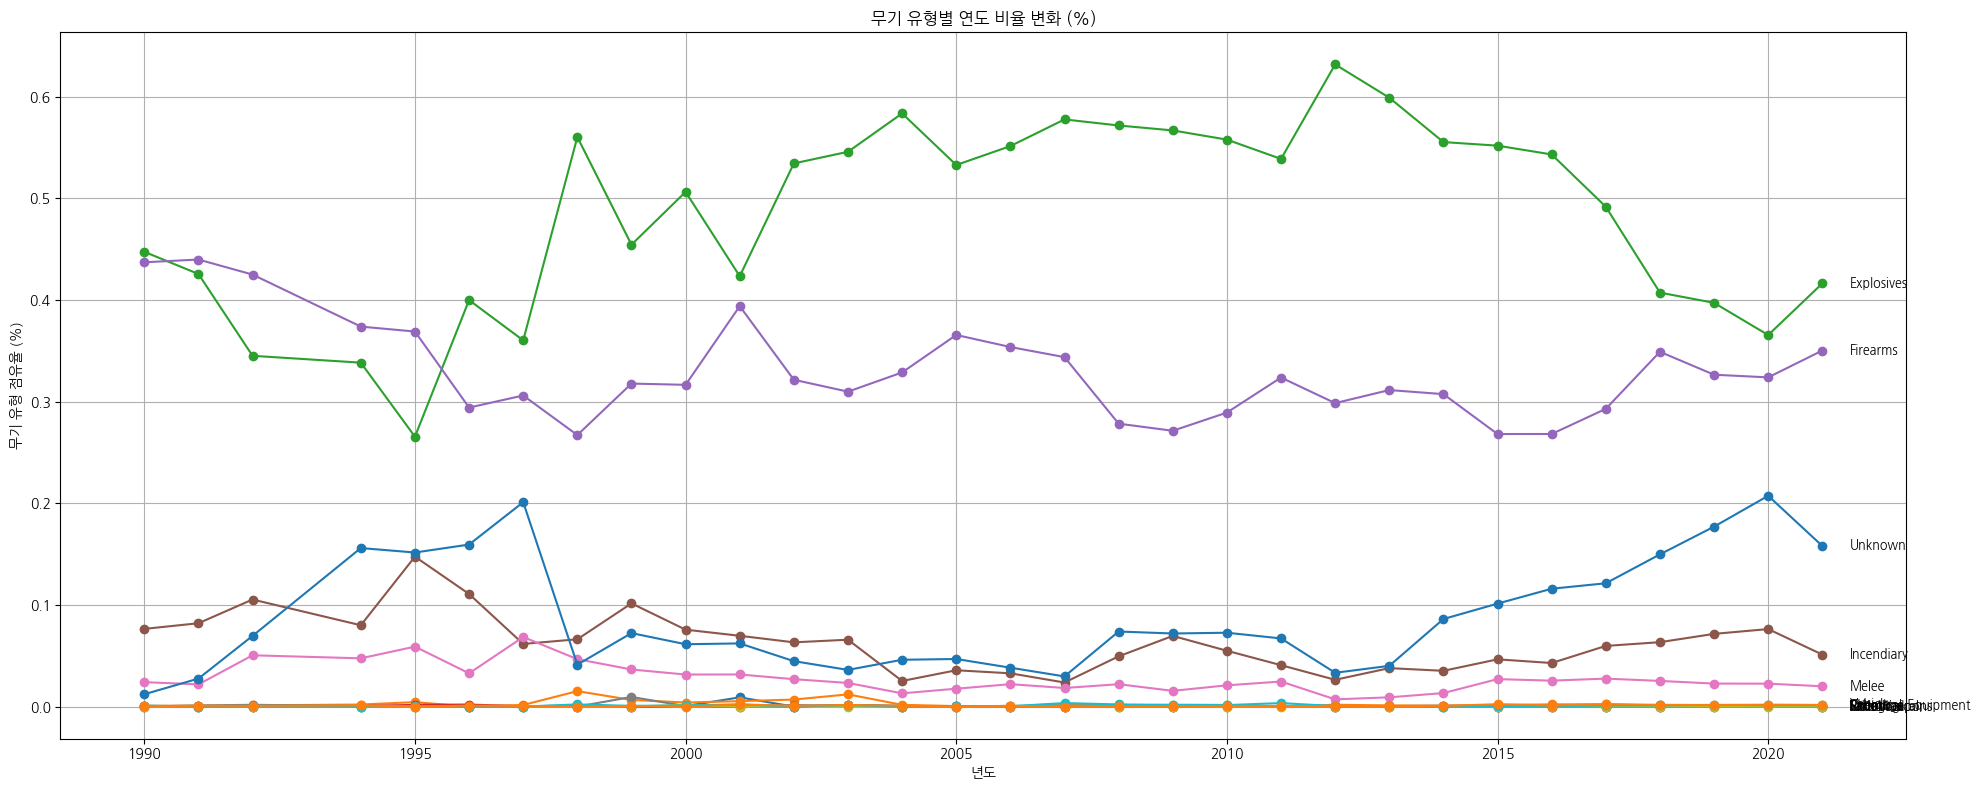

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Ïó∞ÎèÑÎ≥Ñ Î¨¥Í∏∞ Ïú†Ìòï ÎπàÎèÑÌëú ÎßåÎì§Í∏∞
weapon_year_ct = pd.crosstab(df['iyear'], df['weaptype1_txt'])

# 2. Ïó∞ÎèÑÎ≥Ñ ÎπÑÏú® Í≥ÑÏÇ∞
weapon_ratio = weapon_year_ct.div(weapon_year_ct.sum(axis=1), axis=0)

# 3. ÏÑ† Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(20, 8))

for weapon in weapon_ratio.columns:
    y_values = weapon_ratio[weapon]
    x_values = weapon_ratio.index

    # ÏÑ† Í∑∏Î¶¨Í∏∞
    plt.plot(x_values, y_values, label=weapon, marker='o')

    # ÎßàÏßÄÎßâ ÏßÄÏ†êÏóê Î†àÏù¥Î∏î Î∂ôÏù¥Í∏∞
    plt.text(x_values[-1] + 0.5, y_values.iloc[-1], weapon,
             fontsize=9, va='center')

plt.title("Î¨¥Í∏∞ Ïú†ÌòïÎ≥Ñ Ïó∞ÎèÑ ÎπÑÏú® Î≥ÄÌôî (%)")
plt.xlabel("ÎÖÑÎèÑ")
plt.ylabel("Î¨¥Í∏∞ Ïú†Ìòï Ï†êÏú†Ïú® (%)")
plt.tight_layout()
plt.grid(True)
plt.show()


In [16]:
weapon_decade_ct = pd.crosstab(df['decade'], df['weaptype1_txt']).T
weapon_decade_ct

decade               1990   2000   2010  2020
weaptype1_txt                                
Biological              2     21      6     1
Chemical               61     67    150     7
Explosives          10748  13403  54038  5046
Fake Weapons           17      5      6     2
Firearms            10664   7803  30637  4381
Incendiary           2621   1244   4773   880
Melee                1183    521   2056   284
Other                  32     18     71     5
Radiological            0      3      0     0
Sabotage Equipment     13     39     88    19
Unknown              2733   1349  10022  2484
Vehicle                19     13    126    24

In [17]:
# Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï(Îëê Î≤îÏ£ºÌòï Î≥ÄÏàò Í∞Ñ ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ï)
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(weapon_decade_ct)

print(f"Chi-squared ÌÜµÍ≥ÑÎüâ: {stat:.2f}")
print(f"p-value: {p:.5f}")
print(f"ÏûêÏú†ÎèÑ: {dof}")

Chi-squared ÌÜµÍ≥ÑÎüâ: 4969.35
p-value: 0.00000
ÏûêÏú†ÎèÑ: 33


### Í≤∞Î°†: Í∞ÄÏÑ§1
---
- Ìè≠Î∞úÎ¨º ÌÖåÎü¨Îäî Í≥ÑÏÜçÌï¥ÏÑú Í∞êÏÜåÌïòÎã§Í∞Ä 2020ÎÖÑÎåÄ Ïù¥ÌõÑÏóê Îì§Ïñ¥ Ï¶ùÍ∞ÄÌïòÍ≥† ÏûàÍ≥†,
- Ï¥ùÍ∏∞Î•ò ÌÖåÎü¨Îäî Ï¶ùÍ∞ÄÏôÄ Í∞êÏÜåÏ∂îÏÑ∏Î•º Î∞òÎ≥µÌïòÎã§Í∞Ä ÏµúÍ∑ºÏóê Îì§Ïñ¥ÏÑú Îã§Ïãú Ï¶ùÍ∞ÄÌïòÍ≥† ÏûàÎã§.

 -> Ï†ïÌôïÌïú Ï¶ùÍ∞ÄÏõêÏù∏Ïóê ÎåÄÌï¥ÏÑúÎäî Ï∂îÍ∞ÄÏ†ÅÏù∏ Ï°∞ÏÇ¨Í∞Ä ÌïÑÏöîÌï† ÎìØ

 -> Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Í≤∞Í≥º, Í∏∞Ïà† Î∞úÏ†ÑÍ≥º Î¨¥Í∏∞ ÏÇ¨Ïö© ÏñëÏÉÅÏùÄ Ïú†ÏùòÎØ∏Ìïú Í¥ÄÎ†®Ïù¥ ÏûàÏùåÏùÑ ÌôïÏù∏

## Í∞ÄÏÑ§2 ÌÉÄÍ≤üÏóê Îî∞ÎùºÏÑú Î¨¥Í∏∞ Ïú†ÌòïÏù¥ Îã¨ÎùºÏßàÍ≤ÉÏù¥Îã§.

In [18]:
ct_target_weapon = pd.crosstab(df['targtype1_txt'], df['weaptype1_txt']).T
ct_target_weapon

targtype1_txt       Abortion Related  Airports & Aircraft  Business  \
weaptype1_txt                                                         
Biological                         0                    1         3   
Chemical                           0                    1        14   
Explosives                        19                  467      8235   
Fake Weapons                       0                   16         4   
Firearms                          18                  121      3097   
Incendiary                       118                   33      2130   
Melee                              6                   26       196   
Other                              0                    0        12   
Radiological                       0                    0         0   
Sabotage Equipment                 0                    0        12   
Unknown                            0                   68       841   
Vehicle                            0                    1         4   

targtype1_txt       Educational Institution  Food or Water Supply  \
weaptype1_txt                                                       
Biological                                1                     0   
Chemical                                 47                     4   
Explosives                             1971                   140   
Fake Weapons                              0                     0   
Firearms                                930                    54   
Incendiary                              516                    20   
Melee                                    72                     0   
Other                                    12                     0   
Radiological                              0                     0   
Sabotage Equipment                        2                     1   
Unknown                                 219                    17   
Vehicle                                   2                     0   

targtype1_txt       Government (Diplomatic)  Government (General)  \
weaptype1_txt                                                       
Biological                                1                    12   
Chemical                                 10                    28   
Explosives                             1002                  7760   
Fake Weapons                              2                     4   
Firearms                                806                  8011   
Incendiary                              171                  1037   
Melee                                    64                   329   
Other                                     2                    11   
Radiological                              0                     3   
Sabotage Equipment                        1                     7   
Unknown                                 232                  1397   
Vehicle                                   3                    23   

targtype1_txt       Journalists & Media  Maritime  Military  ...  Police  \
weaptype1_txt                                                ...           
Biological                            6         0         1  ...       0   
Chemical                              3         0        36  ...      30   
Explosives                          548       109     13954  ...   10999   
Fake Weapons                          0         0         0  ...       0   
Firearms                           1128       127      9303  ...    9832   
Incendiary                          150         7       219  ...     531   
Melee                               152         6       337  ...     400   
Other                                 7         0         4  ...      13   
Radiological                          0         0         0  ...       0   
Sabotage Equipment                    7         0         0  ...       2   
Unknown                             348        42      4342  ...    2438   
Vehicle                               2         0        60  ...      25   

targty

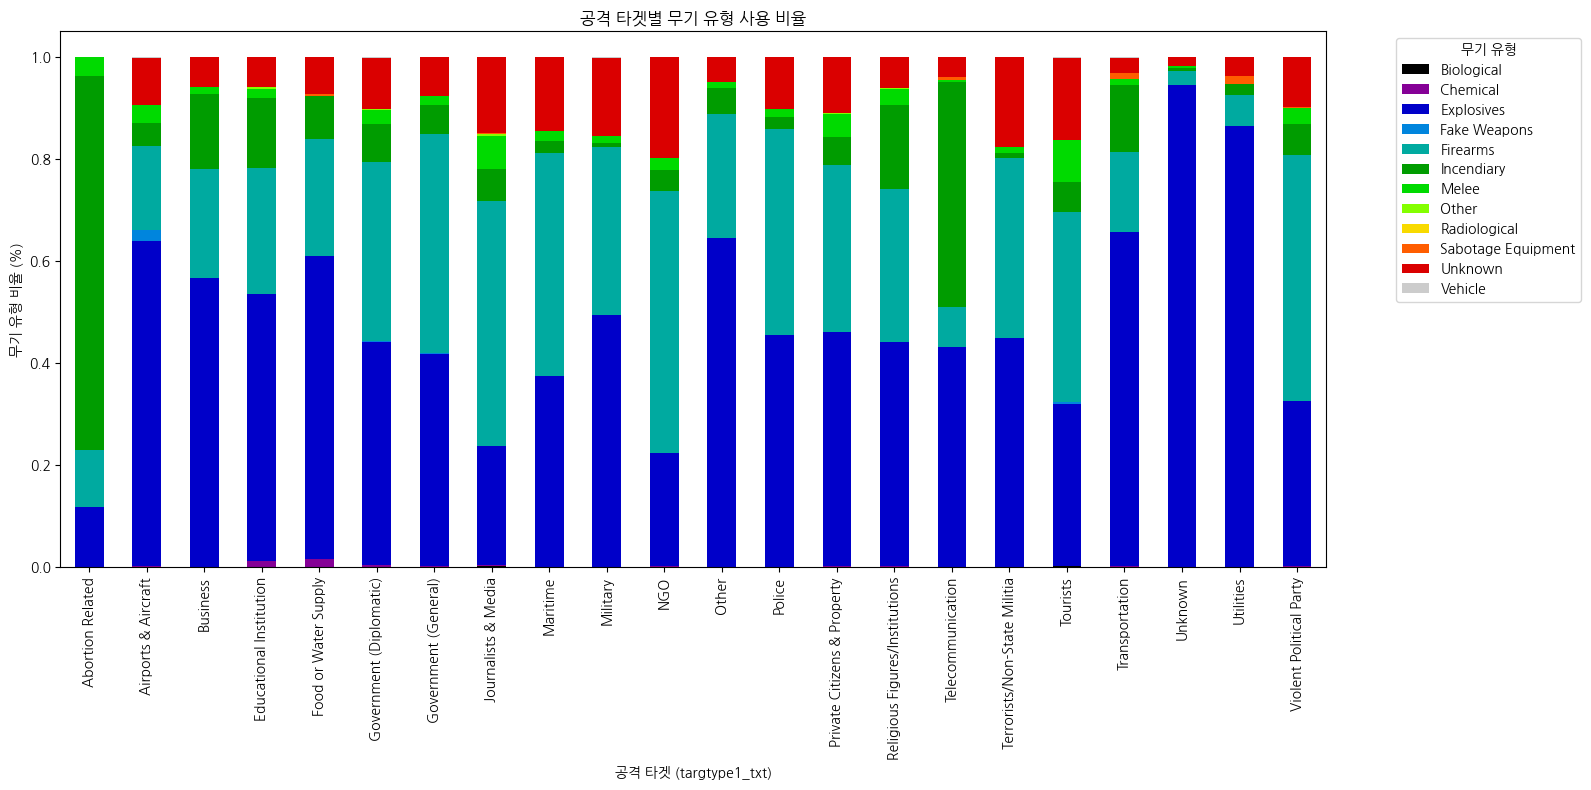

In [19]:
# ÍµêÏ∞®Ìëú: ÌÉÄÍ≤ü √ó Î¨¥Í∏∞
ct_target_weapon = pd.crosstab(df['targtype1_txt'], df['weaptype1_txt'])

# ÎπÑÏú® Í≥ÑÏÇ∞ (Ìñâ Í∏∞Ï§Ä)
ct_target_weapon_ratio = ct_target_weapon.div(ct_target_weapon.sum(axis=1), axis=0)

# ÏãúÍ∞ÅÌôî
ct_target_weapon_ratio.plot(
    kind='bar',
    stacked=True,
    figsize=(16, 8),
    colormap='nipy_spectral'
)

plt.title("Í≥µÍ≤© ÌÉÄÍ≤üÎ≥Ñ Î¨¥Í∏∞ Ïú†Ìòï ÏÇ¨Ïö© ÎπÑÏú®")
plt.xlabel("Í≥µÍ≤© ÌÉÄÍ≤ü (targtype1_txt)")
plt.ylabel("Î¨¥Í∏∞ Ïú†Ìòï ÎπÑÏú® (%)")
plt.legend(title="Î¨¥Í∏∞ Ïú†Ìòï", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### ÎààÏóê ÎùÑÎäî 3Í∞úÏùò Î¨¥Í∏∞Ïú†Ìòï Ï†ïÎ¶¨ - Í∞ÄÏÑ§2 ÏãúÍ∞ÅÌôî Ìï¥ÏÑù

- Ìè≠Î∞úÎ¨º

    Ï†Ñ ÌÉÄÍ≤üÏóêÏÑú ÎëêÎ£®ÎëêÎ£® ÏÇ¨Ïö©ÎêòÎäî Í∞ÄÏû• ÌùîÌïú Î¨¥Í∏∞ Ïú†Ìòï
    - ÌäπÌûà Í≥µÍ≥µÏãúÏÑ§, ÍµêÌÜµÏàòÎã®, Í≥µÌï≠ Îì±ÏóêÏÑú ÏïïÎèÑÏ†Å ÎÜíÏùÄ ÎπÑÏú®ÏùÑ Ï∞®ÏßÄ

    ‚û°Ô∏è Ïù∏ÌîÑÎùº ÌååÍ¥¥ / ÎåÄÏ§ëÎì§Ïóê Í≥µÌè¨Ïã¨, Ï∂©Í≤© Ìö®Í≥ºÎ•º ÎÖ∏Î¶∞ Î™©Ï†ÅÏù¥ Ïª§Î≥¥ÏûÑ

- Ï¥ùÍ∏∞Î•ò
    
    Ìè≠Î∞úÎ¨º Î™ªÏßÄ ÏïäÍ≤å Î™®Îì† ÎåÄÏÉÅÏóê ÎëêÎ£®ÎëêÎ£® ÏÇ¨Ïö©ÎêòÎäî Î¨¥Í∏∞ Ïú†Ìòï
    - Ï†ïÎ∂Ä, Ïñ∏Î°†ÏÇ¨, ÏÇ¨ÌöåÏö¥Îèô/Ïù∏Í∂å Îã®Ï≤¥, Ï†ïÏπòÏ†Å Í≤ΩÏüÅ ÏÑ∏Î†• Îì±Îì±..
    
    ‚û°Ô∏è Îã®Ïàú ÎØºÍ∞ÑÏù∏ ÎøêÎßå ÏïÑÎãàÎùº Ï†ïÏπòÏÇ¨ÌöåÏ†Å ÌÉÄÍ≤üÏóê Ï£ºÎ°ú ÏÇ¨Ïö©Ìï®ÏùÑÏèò„Öì Î©îÏãúÏßÄÎ•º Ï†ÑÎã¨ÌïòÍ±∞ÎÇò, Í∑∏ ÌÉÄÍ≤üÏùÑ Ï†úÍ±∞ÌïòÍ∏∞ ÏúÑÌïú ÏàòÎã®ÏúºÎ°ú ÏÇ¨Ïö©ÎêúÎìØ Ìï®.

- Î∞©Ìôî
    
    ÌäπÌûà ÎÇôÌÉúÍ¥ÄÎ†® ÏãúÏÑ§Ïù¥ÎÇò ÌÜµÏã† Ïù∏ÌîÑÎùºÎ•º ÎåÄÏÉÅÏúºÎ°ú ÎßéÏù¥ ÎÇòÌÉÄÎÇú ÌÖåÎü¨ Ïú†Ìòï
    - ÎÇôÌÉúÏôÄ Í¥ÄÎ†®Îêú ÏãúÏÑ§Ïùò Í≤ΩÏö∞ÏóêÎäî Î∂àÏùÑ ÏßàÎü¨ ÏãúÏÑ§ÏùÑ ÏÇ¨Ïö©ÌïòÏßÄ Î™ªÌïòÎèÑÎ°ù, Î∂àÏóê ÏïΩÌïú ÌÜµÏã†Ïû•ÎπÑÎì§Ïù¥ Î™®Ïó¨ÏûàÎäî ÌÜµÏã†Ïù∏ÌîÑÎùº Í∞ôÏùÄ Í≤ΩÏö∞ÏóêÎèÑ, Í∏∞Îä•ÏùÑ ÎßàÎπÑÏãúÌÇ§Í∏∞ ÏúÑÌï¥ÏÑú ÏÇ¨Ïö©ÎêúÍ≤ÉÏúºÎ°ú Î≥¥ÏûÑ

    ‚û°Ô∏è Î©îÏãúÏßÄ Ï†ÑÎã¨ Î∞è Í∏∞Îä• ÎßàÎπÑ Î™©Ï†ÅÏùò ÌÖåÎü¨Ïóê ÎßéÏù¥ ÏÇ¨Ïö©ÎêòÎäî ÎìØÌï®

#### Ï¥ùÍ∏∞Î•ò

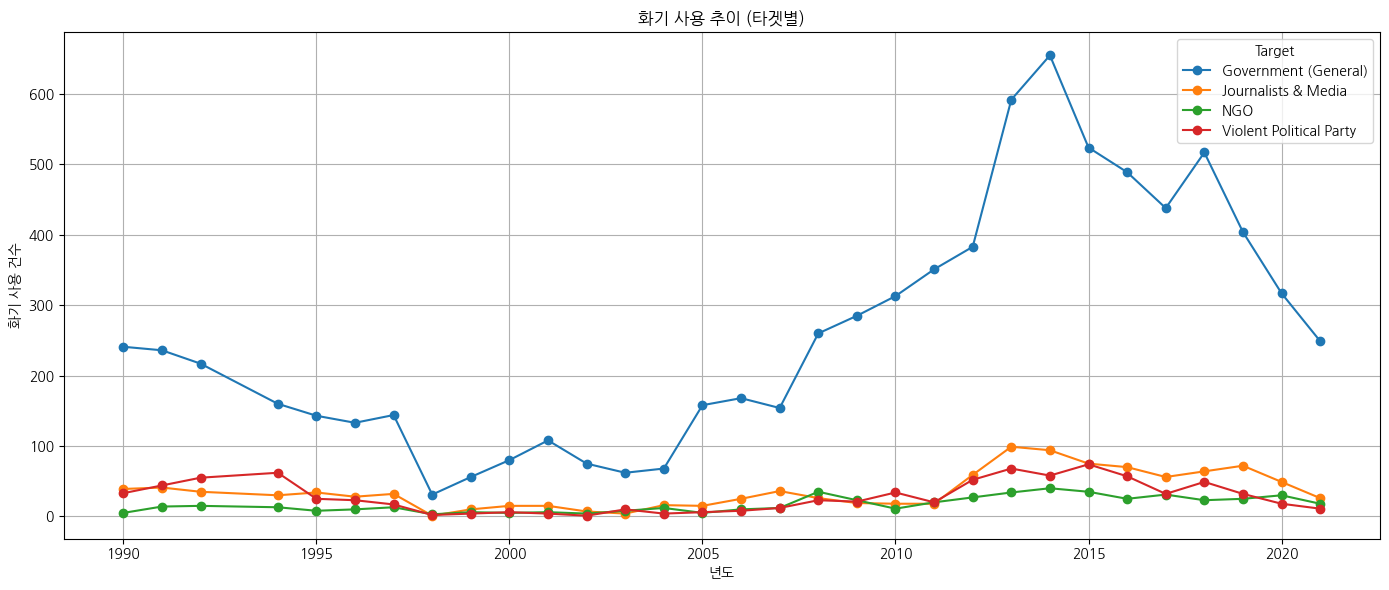

In [20]:
import matplotlib.pyplot as plt

# 1. Î∂ÑÏÑù ÎåÄÏÉÅ ÌÉÄÍ≤ü Î™©Î°ù
focus_targets = [
    'Government (General)',
    'Journalists & Media',
    'NGO',
    'Violent Political Party'
]

# 2. Firearms ÏÇ¨Ïö© Í±¥ÏàòÎßå ÌïÑÌÑ∞ÎßÅ
firearms_df = df[df['weaptype1_txt'] == 'Firearms']

# 3. ÌÉÄÍ≤ü √ó Ïó∞ÎèÑÎ≥Ñ Í±¥Ïàò Í≥ÑÏÇ∞
firearms_yearly = firearms_df[firearms_df['targtype1_txt'].isin(focus_targets)] \
    .groupby(['iyear', 'targtype1_txt'])['eventid'].count().unstack().fillna(0)

# 4. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 6))
for target in firearms_yearly.columns:
    plt.plot(firearms_yearly.index, firearms_yearly[target], label=target, marker='o')

plt.title("ÌôîÍ∏∞ ÏÇ¨Ïö© Ï∂îÏù¥ (ÌÉÄÍ≤üÎ≥Ñ)")
plt.xlabel("ÎÖÑÎèÑ")
plt.ylabel("ÌôîÍ∏∞ ÏÇ¨Ïö© Í±¥Ïàò")
plt.legend(title="Target")
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
# 1. Ï°∞Í±¥ ÌïÑÌÑ∞ÎßÅ
mask = (
    (df['iyear'].between(2010, 2015)) &
    (df['weaptype1_txt'] == 'Firearms') &
    (df['targtype1_txt'] == 'Government (General)')
)

filtered = df[mask]

# 2. Ï£ºÏöî ÌäπÏßï ÏöîÏïΩ Ï∂úÎ†•
print(f"üîç Ï¥ù ÏÇ¨Í±¥ Ïàò: {len(filtered)}")

# 3. ÌÖåÎü¨ Î∞úÏÉù Íµ≠Í∞Ä ÏÉÅÏúÑ 10Í∞ú
print("\nüìç Ï†ïÎ∂Ä ÎåÄÏÉÅ Ï¥ùÍ∏∞ÌÖåÎü¨ Î∞úÏÉù Íµ≠Í∞Ä Top 10:")
print(filtered['country_txt'].value_counts().head(10))

# 4. ÌÉÄÍ≤ü Íµ≠Ï†Å ÏÉÅÏúÑ 10Í∞ú
print("\nüß≠ ÌÉÄÍ≤ü Íµ≠Ï†Å Top 10:")
print(filtered['natlty1_txt'].value_counts().head(10))


üîç Ï¥ù ÏÇ¨Í±¥ Ïàò: 2818

üìç Ï†ïÎ∂Ä ÎåÄÏÉÅ Ï¥ùÍ∏∞ÌÖåÎü¨ Î∞úÏÉù Íµ≠Í∞Ä Top 10:
country_txt
Iraq           428
Philippines    420
Pakistan       362
Afghanistan    357
India          232
Yemen          179
Nigeria        171
Somalia        139
Thailand       129
Libya           98
Name: count, dtype: int64

üß≠ ÌÉÄÍ≤ü Íµ≠Ï†Å Top 10:
natlty1_txt
Iraq           421
Philippines    420
Afghanistan    358
Pakistan       356
India          232
Yemen          178
Nigeria        171
Somalia        136
Thailand       129
Libya           99
Name: count, dtype: int64


ÎåÄÎ∂ÄÎ∂Ñ Î∂ÑÏüÅÏù¥ Ïû¶ÏïòÎçò Íµ≠Í∞ÄÏóêÏÑú ÏßëÏ§ëÏ†ÅÏúºÎ°ú ÎÇòÌÉÄÎÇòÍ≥† ÏûàÍ≥†, Ïù¥Î•º ÌÜµÌï¥ FIREARMSÎäî Î∞òÏ†ïÎ∂Ä ÏÑ∏Î†•Ïù¥ÎÇò ÌÖåÎü¨Í∑∏Î£πÏù¥ Íµ≠Í∞ÄÍ∏∞Í¥Ä, ÏûêÍµ≠ Ï†ïÎ∂ÄÎ•º ÌëúÏ†ÅÏúºÎ°ú Ìï¥ÏÑú Ï†úÍ±∞ÌïòÎ†§Îäî Î™©Ï†ÅÏùò ÌÖåÎü¨Ïóê ÎßéÏù¥ ÏÇ¨Ïö©ÎêúÎã§Í≥† Ï∂îÏ∏°Ìï¥Î≥º Ïàò ÏûàÎã§.

#### Î∞©Ìôî

In [22]:
# Incendiary Î¨¥Í∏∞ ÏÇ¨Ïö© ÌÖåÎü¨Îßå Ï∂îÏ∂ú
df_incendiary = df[df['weaptype1_txt'] == 'Incendiary']

print(f"üî• Incendiary ÌÖåÎü¨ Ï¥ù Í±¥Ïàò: {len(df_incendiary)}")
print('-' * 40)
print("üéØ ÌÉÄÍ≤ü ÎåÄÏÉÅ Top 10:")
print(df_incendiary['targtype1_txt'].value_counts().head(10))


üî• Incendiary ÌÖåÎü¨ Ï¥ù Í±¥Ïàò: 9518
----------------------------------------
üéØ ÌÉÄÍ≤ü ÎåÄÏÉÅ Top 10:
targtype1_txt
Private Citizens & Property       2446
Business                          2130
Government (General)              1037
Religious Figures/Institutions     736
Transportation                     673
Police                             531
Educational Institution            516
Telecommunication                  409
Military                           219
Government (Diplomatic)            171
Name: count, dtype: int64


In [23]:
print("üåç ÌÖåÎü¨ Î∞úÏÉù Íµ≠Í∞Ä Top 10:")
print(df_incendiary['country_txt'].value_counts().head(10))


üåç ÌÖåÎü¨ Î∞úÏÉù Íµ≠Í∞Ä Top 10:
country_txt
India             1069
United Kingdom     682
United States      518
Germany            475
Philippines        380
Pakistan           355
Afghanistan        352
Greece             331
Colombia           299
Nigeria            296
Name: count, dtype: int64


In [24]:
# 1. Ï°∞Í±¥ ÌïÑÌÑ∞ÎßÅ
target_list = ['Abortion Related', 'Telecommunication']
# df_infra = df[
#     (df['weaptype1_txt'] == 'Incendiary') &  #
#     (df['targtype1_txt'].isin(target_list))
# ]

# 2. ÌÉÄÍ≤üÎ≥Ñ ÏßëÍ≥Ñ
summary = df.groupby('targtype1_txt').agg({
    'eventid': 'count',
    'nkill': 'mean',
    'nwound': 'mean'
}).rename(columns={
    'eventid': 'Attack Count',
    'nkill': 'Avg Killed',
    'nwound': 'Avg Wounded'
}).round(2)

# 3. Í≤∞Í≥º Ï∂úÎ†•
import pandas as pd
import IPython.display as disp

disp.display(summary)


Attack Count  Avg Killed  Avg Wounded
targtype1_txt                                                        
Abortion Related                         161        0.06         0.24
Airports & Aircraft                      734        2.05         2.19
Business                               14548        1.49         3.36
Educational Institution                 3772        1.05         2.78
Food or Water Supply                     236        1.31         1.14
Government (Diplomatic)                 2294        1.36         4.52
Government (General)                   18622        1.49         2.30
Journalists & Media                     2351        0.68         0.85
Maritime                                 291        2.73         2.28
Military                               28256        3.79         3.13
NGO                                     1025        1.26         1.18
Other                                    180        1.84         3.17
Police                                 24270        2.49         3.02
Private Citizens & Property            44920        3.30         4.19
Religious Figures/Institutions          4480        3.13         5.54
Telecommunication                        927        0.14         0.38
Terrorists/Non-State Militia            3473        3.33         3.06
Tourists                                 356        2.08         3.61
Transportation                          5127        2.20         7.00
Unknown                                 6387        0.69         0.60
Utilities                               3481        0.43         0.40
Violent Political Party                 1794        1.84         2.84

### Í∞ÄÏÑ§ 2 ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ†ï

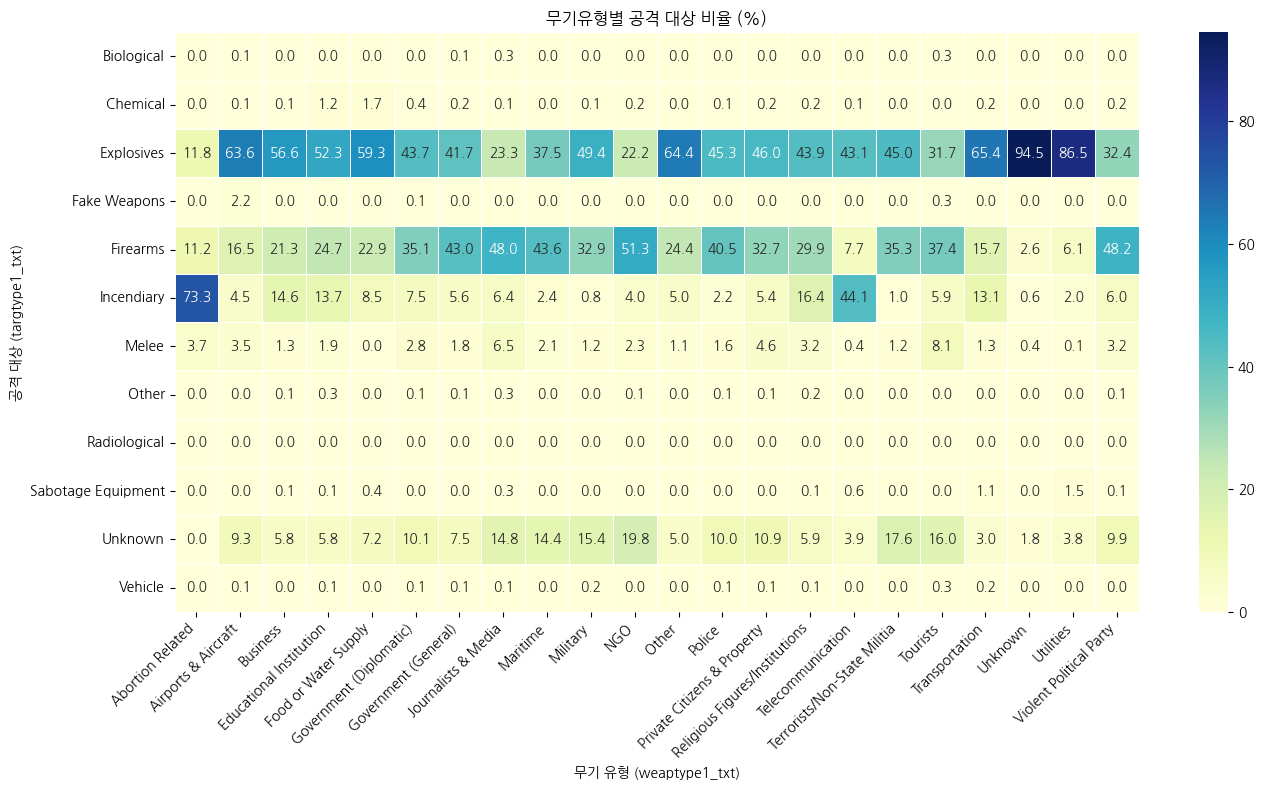

In [25]:
# ÍµêÏ∞®Ìëú + ÎπÑÏú® Í≥ÑÏÇ∞
weapon_target_ratio = ct_target_weapon.div(ct_target_weapon.sum(axis=1), axis=0) * 100

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.heatmap(weapon_target_ratio.T, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title("Î¨¥Í∏∞Ïú†ÌòïÎ≥Ñ Í≥µÍ≤© ÎåÄÏÉÅ ÎπÑÏú® (%)")
plt.xlabel("Î¨¥Í∏∞ Ïú†Ìòï (weaptype1_txt)")
plt.ylabel("Í≥µÍ≤© ÎåÄÏÉÅ (targtype1_txt)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [26]:
# 4. Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï
stat, p, dof, expected = chi2_contingency(ct_target_weapon)

print(f"Chi-squared ÌÜµÍ≥ÑÎüâ: {stat:.2f}")
print(f"p-value: {p:.5f}")
print(f"ÏûêÏú†ÎèÑ: {dof}")

if p < 0.05:
    print("‚úÖ Í≥µÍ≤© ÌÉÄÍ≤üÍ≥º Î¨¥Í∏∞ Ïú†Ìòï Í∞Ñ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Í¥ÄÍ≥Ñ ÏûàÏùå")
else:
    print("‚ùå Ïú†ÏùòÎØ∏Ìïú Í¥ÄÍ≥Ñ ÏóÜÏùå (Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù)")

Chi-squared ÌÜµÍ≥ÑÎüâ: 28844.56
p-value: 0.00000
ÏûêÏú†ÎèÑ: 231
‚úÖ Í≥µÍ≤© ÌÉÄÍ≤üÍ≥º Î¨¥Í∏∞ Ïú†Ìòï Í∞Ñ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Í¥ÄÍ≥Ñ ÏûàÏùå


In [27]:
df[df['weaptype1_txt'] == 'Radiological']

eventid  iyear  imonth  iday country_txt region_txt provstate  \
29443  200006060012   2000       6     6       Japan  East Asia     Tokyo   
29456  200006070008   2000       6     7       Japan  East Asia     Tokyo   
29469  200006080014   2000       6     8       Japan  East Asia     Tokyo   

        latitude   longitude   city  success  attacktype1_txt  \
29443  35.689125  139.747742  Tokyo        0  Unarmed Assault   
29456  35.689125  139.747742  Tokyo        0  Unarmed Assault   
29469  35.689125  139.747742  Tokyo        0  Unarmed Assault   

              targtype1_txt weaptype1_txt  nkill  nwound natlty1_txt    gname  \
29443  Government (General)  Radiological    0.0       0       Japan  Unknown   
29456  Government (General)  Radiological    0.0       0       Japan  Unknown   
29469  Government (General)  Radiological    0.0       0       Japan  Unknown   

       decade  
29443    2000  
29456    2000  
29469    2000

- ÏõêÎ≥∏ ÌôïÏù∏Í≤∞Í≥º ÏÑ∏Î∂Ä ÌÉÄÍπÉÏù¥ Î™®Îëê Îã¨ÎùºÏÑú Í∞ôÏùÄ ÎÇ†Ïóê ÏùºÏñ¥ÎÇú Îã§Î•∏ Ïû•ÏÜåÏóêÏÑúÏùò ÌÖåÎü¨ÏûÑ

- Ïù∏ÌÑ∞ÎÑ∑ ÏÑúÏπ≠ Í≤∞Í≥º Ïù¥Î•º Îã§Î£¨ Í∏∞ÏÇ¨ÎÇò Í≤∞Í≥ºÎäî Ï∞æÏßÄ Î™ªÌï®


### Í≤∞Î°†: Í∞ÄÏÑ§2
Îëê Î≥ÄÏàòÍ∞ÑÏùò Í¥ÄÍ≥ÑÎäî Ïú†ÏùòÎØ∏Ìï®!!
Ïó¨Îü¨ Ìï¥ÏÑùÎì§Ïù¥ Í∞ÄÎä•Ìï¥Î≥¥ÏûÑ

## Í∞ÄÏÑ§ 3. ÏßÄÏó≠ÎßàÎã§ ÏÇ¨Ïö©ÎêòÎäî ÌÖåÎü¨ Î¨¥Í∏∞ Ïú†ÌòïÏù¥ Îã§Î•º Í≤ÉÏù¥Îã§

- ÎØ∏Íµ≠ÏóêÏÑúÎäî Ï¥ùÍ∏∞ ÌÖåÎü¨Í∞Ä ÎßéÏùÑ Í≤É Í∞ôÍ≥†,
- Ï§ëÎèôÏßÄÏó≠ÏóêÏÑúÎäî Ìè≠Î∞úÎ¨ºÏù¥ ÎßéÏùÑ Í≤É Í∞ôÎã§

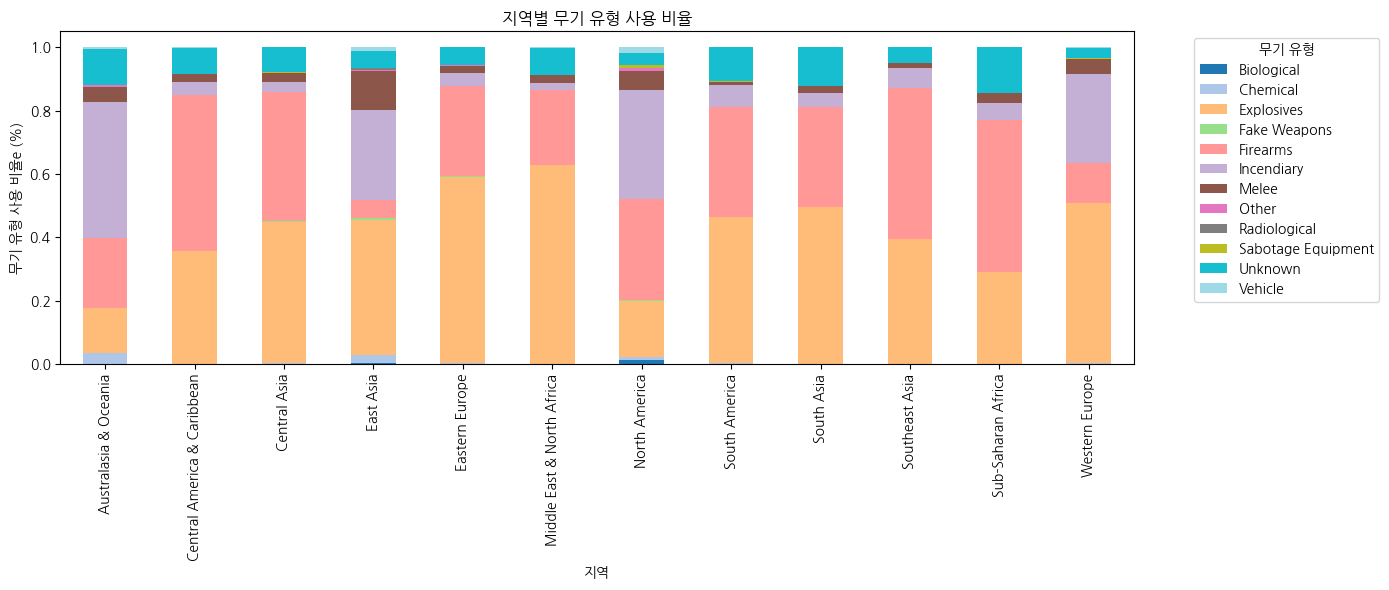

In [28]:
import matplotlib.pyplot as plt

# ÍµêÏ∞®Ìëú ÎßåÎì§Í∏∞
ct_region_weapon = df.groupby(['region_txt', 'weaptype1_txt']).size().unstack(fill_value=0)

# ÎπÑÏú® Î≥ÄÌôò (Ìñâ Í∏∞Ï§Ä)
ct_region_weapon_ratio = ct_region_weapon.div(ct_region_weapon.sum(axis=1), axis=0)

# Ïä§ÌÉù Î∞îÏ∞®Ìä∏
ct_region_weapon_ratio.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
plt.title("ÏßÄÏó≠Î≥Ñ Î¨¥Í∏∞ Ïú†Ìòï ÏÇ¨Ïö© ÎπÑÏú®")
plt.xlabel("ÏßÄÏó≠")
plt.ylabel("Î¨¥Í∏∞ Ïú†Ìòï ÏÇ¨Ïö© ÎπÑÏú®e (%)")
plt.legend(title="Î¨¥Í∏∞ Ïú†Ìòï", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Í∞ÄÏÑ§3 - ÏãúÍ∞ÅÌôîÌï¥ÏÑù
 Ï†Ñ ÏÑ∏Í≥ÑÏ†ÅÏúºÎ°ú ÎßéÏù¥ ÏÇ¨Ïö©ÎêòÎäî Î¨¥Í∏∞ Ïú†ÌòïÏùÄ Ìè≠Î∞úÎ¨º, Ï¥ùÍ∏∞Î•ò, Î∞©ÌôîÏù∏ÎìØÌïòÎã§, Í±∞Í∏∞Ïóê + Í∑ºÏ†ë..Í≥µÍ≤©...?

- Ìò∏Ï£º & Ïò§ÏÑ∏ÏïÑÎãàÎùºÏóêÏÑúÎäî Ìè≠Î∞úÎ¨º, Ï¥ùÍ∏∞Î•òÎ≥¥Îã§ Î∞©ÌôîÌÖåÎü¨ Ïú†ÌòïÏùò ÎπÑÏú®Ïù¥ Îçî ÎÜíÏùÄÍ≤å Ïã†Í∏∞Ìï®
    - Ïù∏Î™Ö ÏÇ¥ÏÉÅÎ≥¥Îã§Îäî Î™©Ï†ÅÏùÑ Ïù¥Î£®Í∏∞ ÏúÑÌïú ÌòπÏùÄ Î©îÏÑ∏ÏßÄÎ•º Ï†ÑÎã¨ÌïòÍ∏∞ ÏúÑÌïú ÌÖåÎü¨Í∞Ä ÎßéÏù¥ ÏùºÏñ¥ÎÇòÎäîÎìØ,,, ÌèâÌôîÎ°úÏö¥ Í±∏ÍπåÎÇò...?

- ÎØ∏ÎåÄÎ•ôÏù¥ÎÇò, ÎèôÏÑú ÏïÑÏãúÏïÑ?(southeast asia), ÎÇ®ÏïÑÌîÑÎ¶¨Ïπ¥Îäî Ï¥ùÍ∏∞ ÏÇ¨Ïö© ÎπÑÏ§ëÏù¥ Ìè≠Î∞úÎ¨ºÎ≥¥Îã§ ÎÜíÏùå

- Ìè≠Î∞úÎ¨ºÏùÄ Ï§ëÎèô&Î∂ÅÏïÑÌîÑÎ¶¨Ïπ¥ ÏßÄÏó≠ÏóêÏÑú Ïì∞Ïù¥Îäî ÎπÑÏú®Ïù¥ Ï†ÑÏ≤¥ÏóêÏÑú Í∞ÄÏû• ÎÜíÏùå
    - Ï†ÑÏüÅ/ÎÇ¥Ï†Ñ/Î∂ÑÏüÅÏù¥ ÏûêÏ£º ÏùºÏñ¥ÎÇòÎäî Í≥≥ÏóêÏÑúÎäî Ìè≠ÌÉÑÏù¥ Ï†ÑÎûµÏ†ÅÏúºÎ°ú Îçî Ïú†Î¶¨ÌïòÍ∏∞ ÎïåÎ¨∏Ïù∏ÎìØÌï®

### Í∞ÄÏÑ§3 ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ¶ù

**Î¨¥Í∏∞Îì§Ïù¥ Ïñ¥Îäê ÏßÄÏó≠ÏóêÏÑú Ï£ºÎ°ú Ïì∞Ïù¥ÎäîÏßÄ**

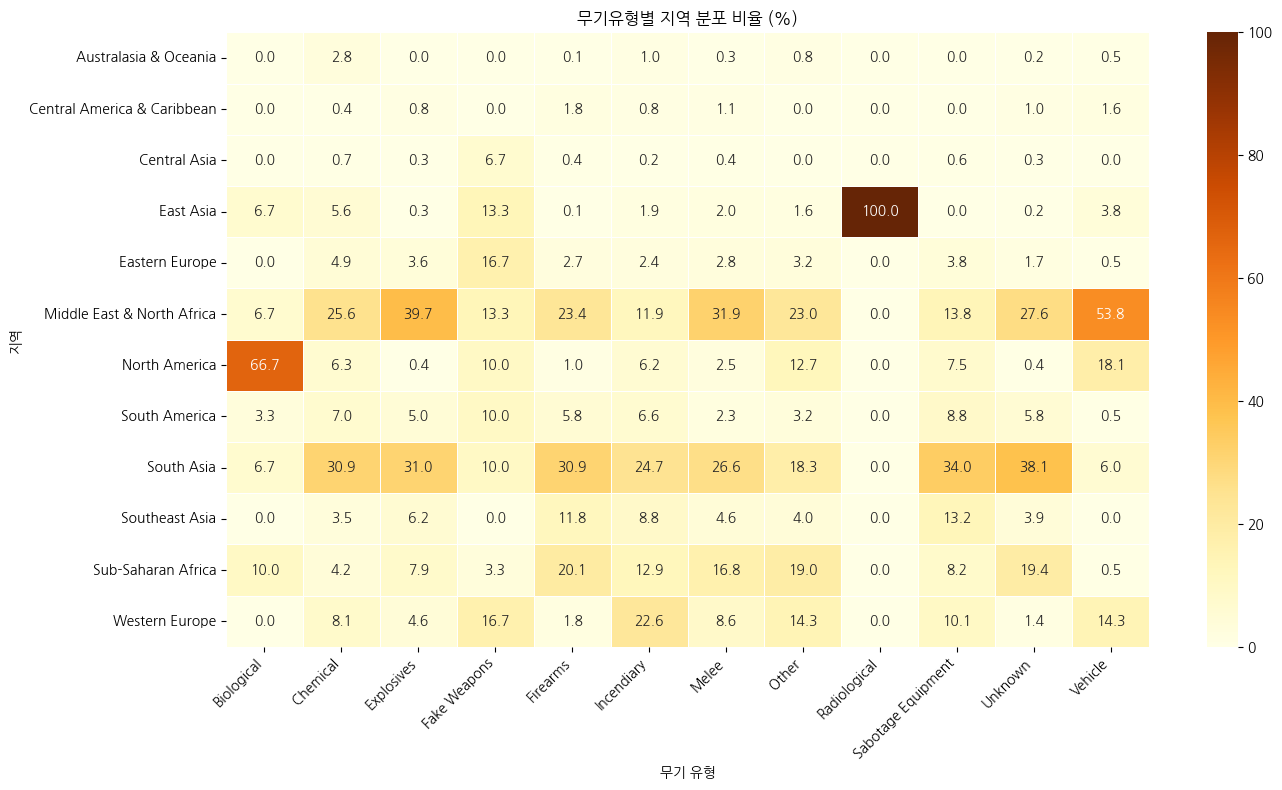

In [29]:
# ÌïÑÏöîÌïú Ïª¨Îüº Ï∂îÏ∂ú Î∞è Í≤∞Ï∏° Ï†úÍ±∞
df_region_weapon = df[['weaptype1_txt', 'region_txt']]

# Î¨¥Í∏∞Ïú†Ìòï vs ÏßÄÏó≠ ÍµêÏ∞®Ìëú (Í±¥Ïàò)
weapon_region_crosstab = pd.crosstab(df_region_weapon['weaptype1_txt'], df_region_weapon['region_txt'])

# ÎπÑÏú®(%)Î°ú Ï†ïÍ∑úÌôî
weapon_region_ratio = weapon_region_crosstab.div(weapon_region_crosstab.sum(axis=1), axis=0) * 100

# Heatmap ÏãúÍ∞ÅÌôî
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.heatmap(weapon_region_ratio.T, annot=True, fmt=".1f", cmap="YlOrBr", linewidths=0.5)
plt.title("Î¨¥Í∏∞Ïú†ÌòïÎ≥Ñ ÏßÄÏó≠ Î∂ÑÌè¨ ÎπÑÏú® (%)")
plt.xlabel("Î¨¥Í∏∞ Ïú†Ìòï")
plt.ylabel("ÏßÄÏó≠")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Í∞Å ÏßÄÏó≠ÏóêÏÑú Ïñ¥Îñ§ Î¨¥Í∏∞Ïú†ÌòïÏúºÎ°ú Ï£ºÎ°ú ÌÖåÎü¨Í∞Ä ÏùºÏñ¥ÎÇòÎäîÏßÄ**

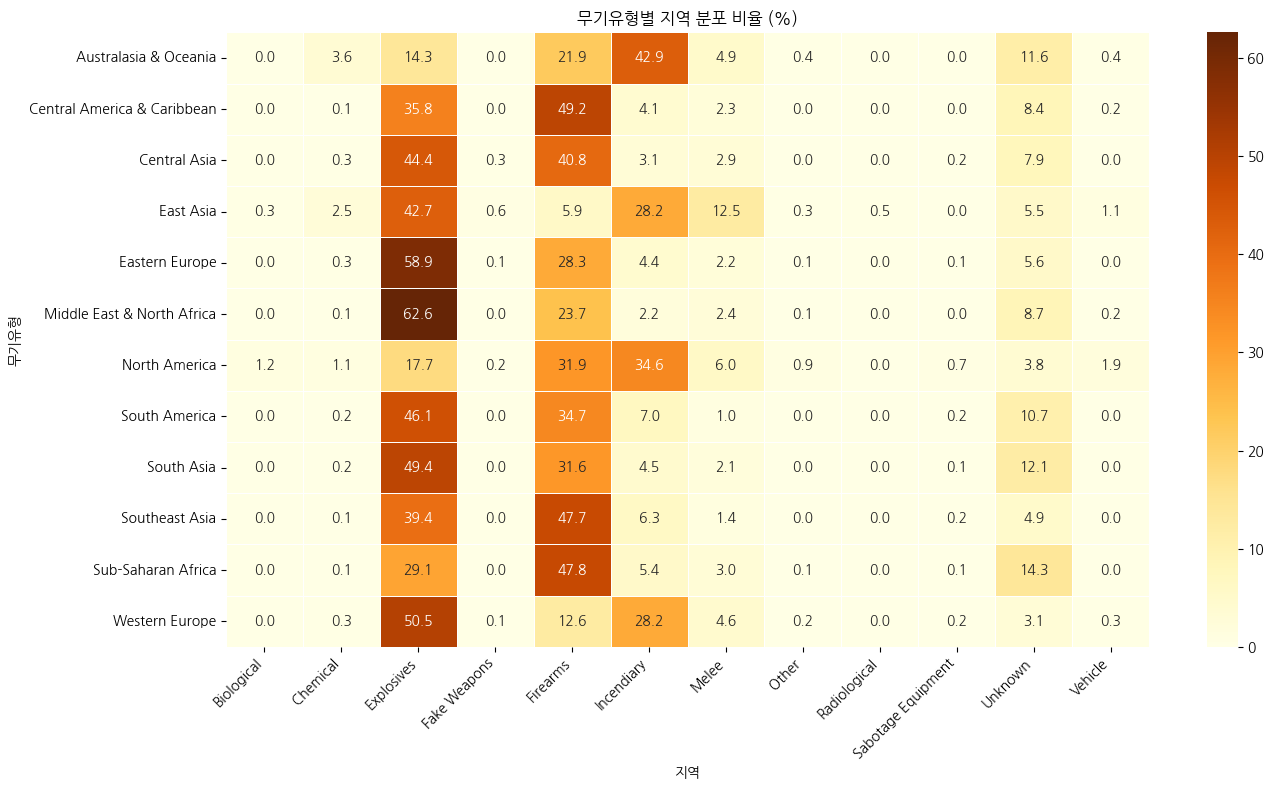

In [30]:
# 1. ÍµêÏ∞®Ìëú ÏÉùÏÑ± (Ìñâ: region, Ïó¥: weapon type)
ct_region_weapon = pd.crosstab(df['region_txt'], df['weaptype1_txt'])

# ÎπÑÏú®(%)Î°ú Ï†ïÍ∑úÌôî
weapon_region_ratio = ct_region_weapon.div(ct_region_weapon.sum(axis=1), axis=0) * 100

# Heatmap ÏãúÍ∞ÅÌôî
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.heatmap(weapon_region_ratio, annot=True, fmt=".1f", cmap="YlOrBr", linewidths=0.5)
plt.title("Î¨¥Í∏∞Ïú†ÌòïÎ≥Ñ ÏßÄÏó≠ Î∂ÑÌè¨ ÎπÑÏú® (%)")
plt.xlabel("ÏßÄÏó≠")
plt.ylabel("Î¨¥Í∏∞Ïú†Ìòï")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [31]:
# Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(ct_region_weapon)

print(f"Chi2 Statistic: {chi2:.2f}")
print(f"p-value: {p:.5f}")
print(f"Degrees of Freedom: {dof}")

if p < 0.05:
    print("üìå Ïú†ÏùòÎØ∏Ìïú Í¥ÄÍ≥Ñ ÏûàÏùå: ÏßÄÏó≠Ïóê Îî∞Îùº ÏÇ¨Ïö©Îêú Î¨¥Í∏∞ Ïú†ÌòïÏù¥ Îã§Î¶Ñ")
else:
    print("üìå Ïú†ÏùòÎØ∏Ìïú Í¥ÄÍ≥Ñ ÏóÜÏùå: ÏßÄÏó≠Í≥º Î¨¥Í∏∞ Ïú†Ìòï Í∞Ñ Í¥ÄÎ†® ÏóÜÏùå")

Chi2 Statistic: 27799.34
p-value: 0.00000
Degrees of Freedom: 121
üìå Ïú†ÏùòÎØ∏Ìïú Í¥ÄÍ≥Ñ ÏûàÏùå: ÏßÄÏó≠Ïóê Îî∞Îùº ÏÇ¨Ïö©Îêú Î¨¥Í∏∞ Ïú†ÌòïÏù¥ Îã§Î¶Ñ


**Î¨¥Í∏∞Ïú†ÌòïÍ≥º ÌÉÄÍ≤ü Ï°∞Ìï©Ïùò ÏßÄÏó≠Î≥Ñ Î≥ÄÌôî ÏñëÏÉÅ**

In [32]:
df['weapon_target_combo'] = df['weaptype1_txt'] + ' ‚Üí ' + df['targtype1_txt']

# Ï†ÑÏ≤¥ Ï°∞Ìï©Î≥Ñ count
combo_top = df['weapon_target_combo'].value_counts().head(20).index.tolist()

# Top 20 Ï°∞Ìï©Îßå ÌïÑÌÑ∞ÎßÅ
df_top_combo = df[df['weapon_target_combo'].isin(combo_top)]

# ÍµêÏ∞®Ìëú (ÏßÄÏó≠ √ó Ï°∞Ìï©)
combo_ct_top = pd.crosstab(df_top_combo['region_txt'], df_top_combo['weapon_target_combo'])

# ÎπÑÏú® Ï†ïÍ∑úÌôî
combo_ratio_top = combo_ct_top.div(combo_ct_top.sum(axis=1), axis=0)


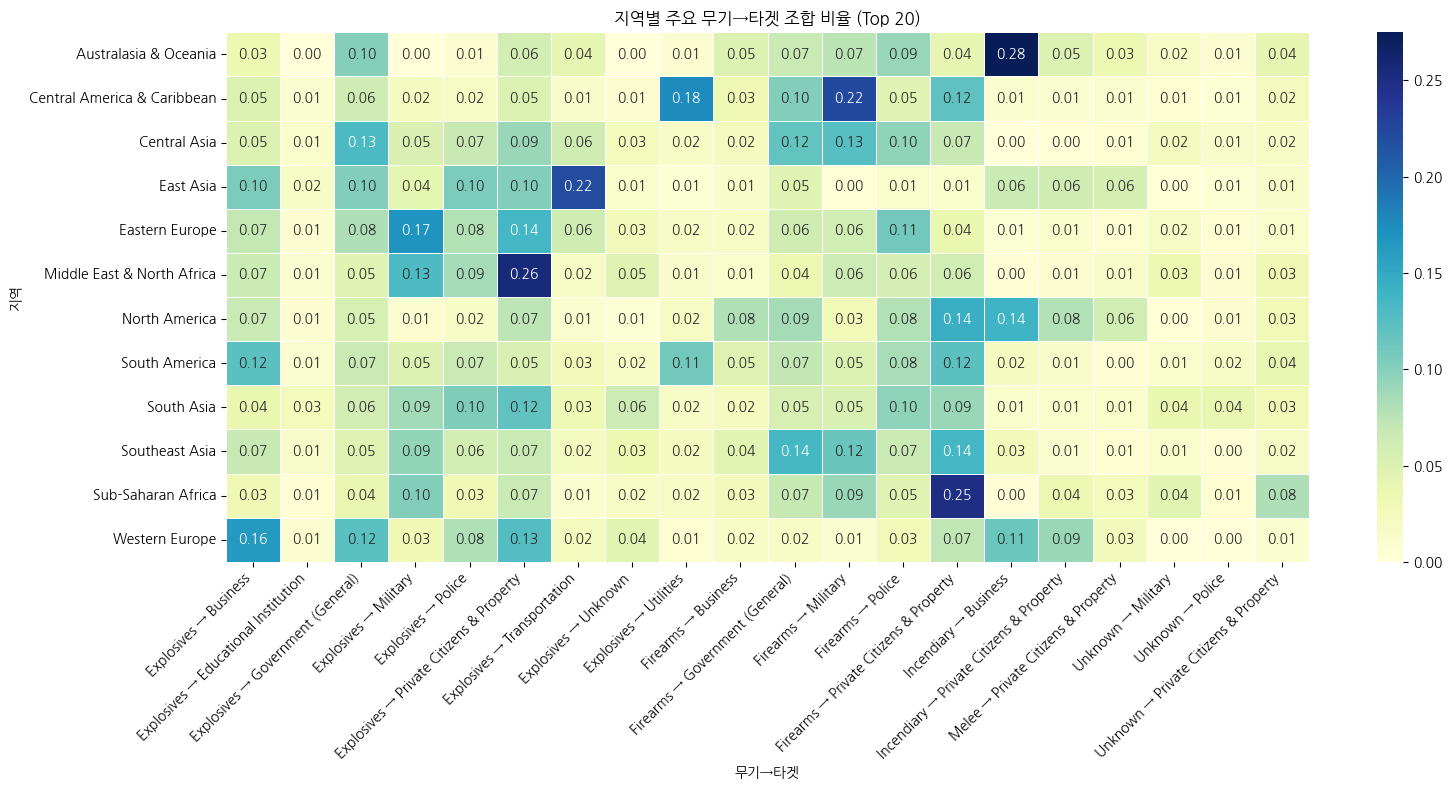

In [33]:
plt.figure(figsize=(16, 8))
sns.heatmap(combo_ratio_top, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=0.5)
plt.title("ÏßÄÏó≠Î≥Ñ Ï£ºÏöî Î¨¥Í∏∞‚ÜíÌÉÄÍ≤ü Ï°∞Ìï© ÎπÑÏú® (Top 20)")
plt.xlabel("Î¨¥Í∏∞‚ÜíÌÉÄÍ≤ü")
plt.ylabel("ÏßÄÏó≠")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Í≤∞Î°†- Í∞ÄÏÑ§3
ÏßÄÏó≠Ïóê Îî∞Îùº ÏÇ¨Ïö©Îêú Î¨¥Í∏∞Ïú†ÌòïÏù¥ Îã¨ÎùºÏßêÏùÑ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú ÌôïÏù∏!!

#### Í≤∞Î°†: 1-3 -- Ïù¥Ï†ÑÍ≥º Îã¨ÎùºÏßê!!!
- Ï§ëÎèôÏßÄÏó≠ÏóêÏÑúÎäî Ï†ïÎßê Îã§ÏñëÌïú Ïú†ÌòïÏùò Î¨¥Í∏∞Í∞Ä Í≥®Í≥†Î£® ÏùºÏñ¥ÎÇòÍ≥†, Ìè≠Î∞úÎ¨ºÏù¥ 1ÏúÑÎùºÍ≥† ÏÉùÍ∞ÅÌñàÏóàÎçò Í≤ÉÍ≥º Îã§Î•¥Í≤å vehicleÏù¥ 1ÏúÑÏòÄÏùå.
- south asiaÏóêÏÑúÎäî sabotageÍ∞Ä 1ÏúÑÏóøÏùå

Ïù¥Í±∞ Ïù¥Ï†Ñ Í≤∞Î°†Ïù∏Îç∞ ÌòúÏùÄÏñ∏ÎãàÎûë Í∞íÏù¥ Í∞ôÍ≤å ÎÇòÏôîÎçò Í≤É Í∞ôÏùÄÎç∞, ÏßÄÍ∏àÌï¥Î≥¥Íπå Îã§Î•¥ÎÑ§Ïöî?!

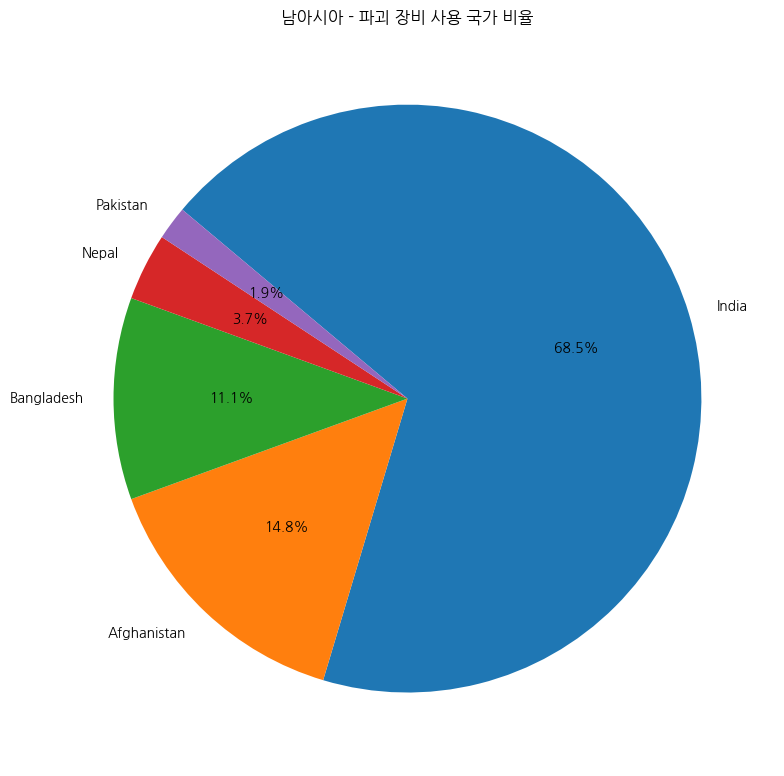

In [34]:
# Ï°∞Í±¥ ÌïÑÌÑ∞ÎßÅ
filtered = df[(df['weaptype1_txt'] == 'Sabotage Equipment') & (df['region_txt'] == 'South Asia')]

# Íµ≠Í∞ÄÎ≥Ñ ÎπÑÏú® Í≥ÑÏÇ∞
country_counts = filtered['country_txt'].value_counts()
country_ratio = (country_counts / country_counts.sum()) * 100

# ÌååÏù¥Ï∞®Ìä∏ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 8))
plt.pie(country_ratio, labels=country_ratio.index, autopct='%1.1f%%', startangle=140, counterclock=False)
plt.title("ÎÇ®ÏïÑÏãúÏïÑ - ÌååÍ¥¥ Ïû•ÎπÑ ÏÇ¨Ïö© Íµ≠Í∞Ä ÎπÑÏú®")
plt.tight_layout()
plt.show()

In [35]:
filtered

eventid  iyear  imonth  iday  country_txt  region_txt  \
692     199003190007   1990       3    19   Bangladesh  South Asia   
29298   200005080002   2000       5     8        India  South Asia   
34693   200307150003   2003       7    15        India  South Asia   
34694   200307150004   2003       7    15        India  South Asia   
44883   200803130008   2008       3    13  Afghanistan  South Asia   
46262   200806090014   2008       6     9        India  South Asia   
50809   200905110036   2009       5    11        India  South Asia   
51027   200905280014   2009       5    28        India  South Asia   
51056   200905290023   2009       5    29        India  South Asia   
51859   200907230013   2009       7    23        India  South Asia   
52869   200910120019   2009      10    12        India  South Asia   
52906   200910130020   2009      10    13        India  South Asia   
55115   201004190018   2010       4    19        India  South Asia   
57495   201010060003   2010      10     6        India  South Asia   
58700   201101060005   2011       1     6        Nepal  South Asia   
59450   201103010025   2011       3     1        India  South Asia   
59451   201103010026   2011       3     1        India  South Asia   
60098   201104160005   2011       4    16        India  South Asia   
60394   201105060020   2011       5     6        India  South Asia   
60395   201105060021   2011       5     6        India  South Asia   
61309   201107110006   2011       7    11        India  South Asia   
61551   201108010004   2011       8     1        India  South Asia   
61552   201108010005   2011       8     1        India  South Asia   
65456   201203200040   2012       3    20     Pakistan  South Asia   
76489   201305260036   2013       5    26        India  South Asia   
90836   201405140080   2014       5    14        India  South Asia   
101617  201501080080   2015       1     8   Bangladesh  South Asia   
101723  201501100097   2015       1    10   Bangladesh  South Asia   
102469  201501250076   2015       1    25   Bangladesh  South Asia   
102489  201501260035   2015       1    26        India  South Asia   
102493  201501260039   2015       1    25        India  South Asia   
102896  201502020097   2015       2     2   Bangladesh  South Asia   
103476  201502130078   2015       2    13   Bangladesh  South Asia   
103766  201502190068   2015       2    19        India  South Asia   
106966  201505090064   2015       5     8        India  South Asia   
117558  201601310061   2016       1    31  Afghanistan  South Asia   
117644  201602020057   2016       2     2  Afghanistan  South Asia   
125581  201608180052   2016       8    18        India  South Asia   
131103  201701220043   2017       1    22        India  South Asia   
131157  201701240029   2017       1    24        India  South Asia   
131644  201702080036   2017       2     8        India  South Asia   
132878  201703170022   2017       3    17        India  South Asia   
144563  201804130025   2018       4    13        India  South Asia   
148024  201808080022   2018       8     8        India  South Asia   
148519  201808290020   2018       8    29  Afghanistan  South Asia   
153158  201903050032   2019       3     5        Nepal  South Asia   
154789  201905060028   2019       5     6        India  South Asia   
156191  201906260028   2019       6    23  Afghanistan  South Asia   
158061  201909150020   2019       9    15  Afghanistan  South Asia   
158855  201910240004   2019      10    24        India  South Asia   
162747  202004250003   2020       4    25  Afghanistan  South Asia   
167098  202010210011   2020      10    21  Afghanistan  South Asia   
168687  202101060023   2021       1     6        India  South Asia   
171978  202104240001   2021       4    23        India  South Asia   

                provstate   latitude  longitude                     city  \
692            Chittagong  22.633539  91.797394                 Nazirhat   
29298     

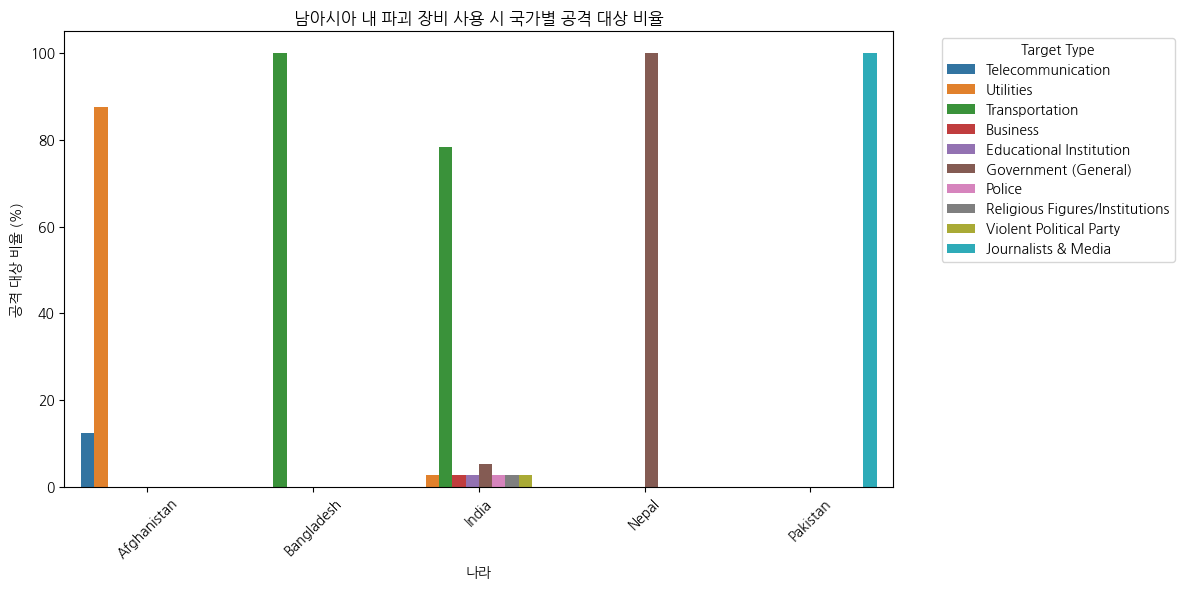

In [36]:
# Ï°∞Í±¥ ÌïÑÌÑ∞ÎßÅ
filtered = df[
    (df['weaptype1_txt'] == 'Sabotage Equipment') &
    (df['region_txt'] == 'South Asia')
]

# Íµ≠Í∞ÄÎ≥Ñ Í≥µÍ≤© ÎåÄÏÉÅ ÎπÑÏú® Í≥ÑÏÇ∞
target_counts = filtered.groupby(['country_txt', 'targtype1_txt']).size().reset_index(name='count')
target_counts['total'] = target_counts.groupby('country_txt')['count'].transform('sum')
target_counts['ratio'] = (target_counts['count'] / target_counts['total']) * 100

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
sns.barplot(data=target_counts, x='country_txt', y='ratio', hue='targtype1_txt')
plt.title("ÎÇ®ÏïÑÏãúÏïÑ ÎÇ¥ ÌååÍ¥¥ Ïû•ÎπÑ ÏÇ¨Ïö© Ïãú Íµ≠Í∞ÄÎ≥Ñ Í≥µÍ≤© ÎåÄÏÉÅ ÎπÑÏú®")
plt.ylabel("Í≥µÍ≤© ÎåÄÏÉÅ ÎπÑÏú® (%)")
plt.xlabel("ÎÇòÎùº")
plt.xticks(rotation=45)
plt.legend(title='Target Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Í∞ÄÏÑ§ 4. ÌÖåÎü¨Î•º ÏùºÏúºÌÇ§Í≥†Ïûê ÌïòÎäî Ïõî/ÏöîÏùºÏóê Îî∞ÎùºÏÑú Î¨¥Í∏∞Ïú†ÌòïÏùÑ Îã§Î•¥Í≤å ÏÑ†ÌÉùÌï† Í≤ÉÏù¥Îã§.

- Í≥µÍ≤©Ïùò Ìö®Í≥ºÎ•º Í∑πÎåÄÌôîÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî ÏöîÏùºÍ≥º ÏõîÏùÑ Í≥†Î†§Ìï¥ÏÑú Î¨¥Í∏∞ Ïú†ÌòïÏùÑ ÏÑ†ÌÉùÌï† Í≤É Í∞ôÎã§!
    - Ïòà: ÏÇ¨ÎûåÎì§Ïù¥ Ï∂úÍ∑ºÌïòÎäî ÏöîÏùºÍ∞ôÏùÄ Í≤ΩÏö∞ÏóêÎäî ÎåÄÎüâ ÏÇ¥ÏÉÅ Î™©Ï†Å >> Ìè≠Î∞úÎ¨º
     ÌòπÏùÄ ÌÜµÏã†Í∏∞Îä• / ÏãúÏÑ§ ÎßàÎπÑÎ•º Î™©Ï†ÅÏúºÎ°ú Î∞©Ìôî


### ÏõîÎ≥Ñ

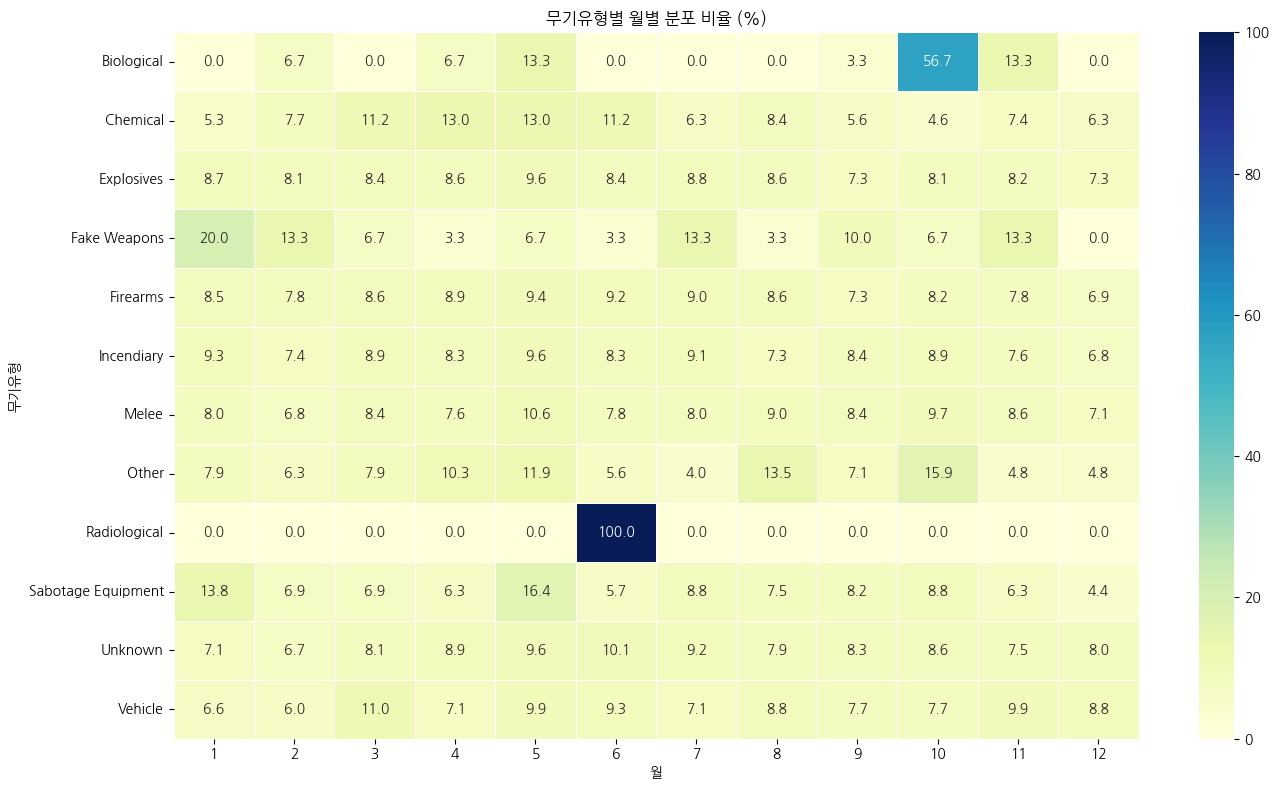

In [37]:
# Ïú†Ìö®Ìïú Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
df_month = df[(df['imonth'] > 0) & (~df['weaptype1_txt'].isnull())]

# ÍµêÏ∞®Ìëú: Î¨¥Í∏∞Ïú†Ìòï vs Ïõî
month_crosstab = pd.crosstab(df_month['weaptype1_txt'], df_month['imonth'])
month_ratio = month_crosstab.div(month_crosstab.sum(axis=1), axis=0) * 100

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))

sns.heatmap(month_ratio, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title("Î¨¥Í∏∞Ïú†ÌòïÎ≥Ñ ÏõîÎ≥Ñ Î∂ÑÌè¨ ÎπÑÏú® (%)")
plt.xlabel("Ïõî")
plt.ylabel("Î¨¥Í∏∞Ïú†Ìòï")
plt.tight_layout()
plt.show()

Îçî ÏÇ¥Ìé¥Î≥ºÍ≤É

-  Ìï¥Îãπ ÏõîÏóê Ï†ïÏπòÏùºÏ†ï/Ï¢ÖÍµêÌñâÏÇ¨/ÏÇ¨ÎûåÎì§Ïù¥ ÎßéÏù¥ Î™®Ïù¥Îäî ÌñâÏÇ¨Í∞ôÏùÄ Í≤ÉÎì§Ïù¥ ÎßéÏù¥ ÏòàÏ†ïÏù¥ÎêòÏñ¥ÏûàÎäîÏßÄ

- ÎÇ†Ïî®ÎÇò ÌôòÍ≤ΩÏ†Å ÏöîÏùºÏóê Îî∞Îùº Ï†ÑÎûµÏù¥ Îã¨ÎùºÏßÄÎäîÏßÄ?

In [38]:
from scipy.stats import chi2_contingency
import pandas as pd

# ÍµêÏ∞®Ìëú ÏÉùÏÑ±
contingency = pd.crosstab(df['weaptype1_txt'], df['imonth'])

# Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï
chi2, p, dof, expected = chi2_contingency(contingency)

# Í≤∞Í≥º Ï∂úÎ†•
print(f"Chi2 Statistic: {chi2:.2f}")
print(f"p-value: {p:.5f}")
print(f"Degrees of Freedom: {dof}")


Chi2 Statistic: 534.69
p-value: 0.00000
Degrees of Freedom: 121


### ÏöîÏùºÎ≥Ñ
- Î≥¥ÌÜµ Ï£ºÎßêÏóê ÍµêÌöåÎÇò ÏÑ±ÎãπÏùÑ Í∞ÄÎãàÍπå Ï£ºÎßêÏóê ÌÖåÎü¨Í∞Ä ÎßéÏù¥ ÏùºÏñ¥ÎÇòÏßÄ ÏïäÏùÑÍπå?
- Í∑ºÎç∞ Îòê Ìè≠Î∞úÎ¨º Í∞ôÏùÄ Í≤ΩÏö∞ÎÑ§Îäî Î¨¥ÏûëÏúÑ Îã§ÏàòÎ•º ÎÖ∏Î¶¨ÎãàÍπå ÏïÑÎ¨¥ÎïåÎÇò ÏùºÏñ¥ÎÇ† Í≤É Í∞ôÍ∏∞ÎèÑ?

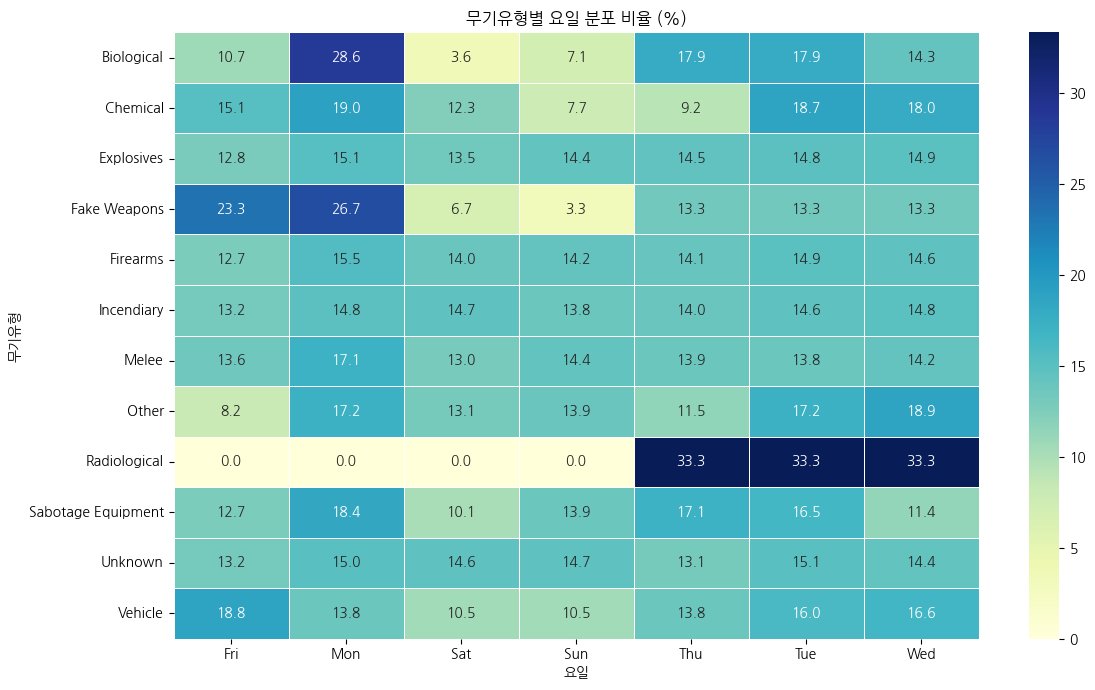

In [39]:
# ÎÇ†Ïßú Ï°∞Ìï©Ïö© ÏûÑÏãú Ïª¨ÎüºÎ™ÖÏúºÎ°ú Î∞îÍæ∏Í∏∞
df['year'] = df['iyear']
df['month'] = df['imonth']
df['day'] = df['iday']

# Í≤∞Ï∏° Ï†úÍ±∞
df = df[(df['year'] > 0) & (df['month'] > 0) & (df['day'] > 0)]

# ÎÇ†Ïßú Î≥ÄÌôò
df['date'] = pd.to_datetime(df[['year', 'month', 'day']], errors='coerce')

# ÏöîÏùº Ï∂îÏ∂ú (0=Ïõî ~ 6=Ïùº)
df['weekday'] = df['date'].dt.dayofweek

# ÏöîÏùº Ïù¥Î¶Ñ Îß§Ìïë
weekday_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['weekday'] = df['weekday'].map(weekday_map)

# ÍµêÏ∞®Ìëú Î∞è ÎπÑÏú® Í≥ÑÏÇ∞
df_weekday = df[~df['weekday'].isnull() & ~df['weaptype1_txt'].isnull()]
weekday_crosstab = pd.crosstab(df_weekday['weaptype1_txt'], df_weekday['weekday'])
weekday_ratio = weekday_crosstab.div(weekday_crosstab.sum(axis=1), axis=0) * 100

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 7))
sns.heatmap(weekday_ratio, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title("Î¨¥Í∏∞Ïú†ÌòïÎ≥Ñ ÏöîÏùº Î∂ÑÌè¨ ÎπÑÏú® (%)")
plt.xlabel("ÏöîÏùº")
plt.ylabel("Î¨¥Í∏∞Ïú†Ìòï")
plt.tight_layout()
plt.show()

In [40]:
from scipy.stats import chi2_contingency
import pandas as pd

# ÍµêÏ∞®Ìëú ÏÉùÏÑ±
contingency = pd.crosstab(df['weaptype1_txt'], df['weekday'])
# Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï
chi2, p, dof, expected = chi2_contingency(contingency)

# Í≤∞Í≥º Ï∂úÎ†•
print(f"Chi2 Statistic: {chi2:.2f}")
print(f"p-value: {p:.5f}")
print(f"Degrees of Freedom: {dof}")


Chi2 Statistic: 133.41
p-value: 0.00000
Degrees of Freedom: 66


++++ ÏöîÏùº/Ïõî/Í≥ÑÏ†àÎ≥ÑÎ°ú Í≥µÍ≤©Î∞õÎäî ÎåÄÏÉÅÏù¥ Îã¨ÎùºÏßàÍπå?

# Íµ≠Í∞ÄÎ≥Ñ Î∂ÑÏÑù - ÏòÅÍµ≠

In [41]:
import pandas as pd

# Íµ≠Í∞ÄÎ≥Ñ Ï†ÑÏ≤¥ ÌÖåÎü¨ Î∞úÏÉù Í±¥Ïàò Ïπ¥Ïö¥Ìä∏
country_counts = df['country_txt'].value_counts()

# 1000Í±¥ Ïù¥ÏÉÅÏùò ÌÖåÎü¨Í∞Ä Î∞úÏÉùÌïú Íµ≠Í∞Ä Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±
countries_over_1000 = country_counts[country_counts >= 1000].index.tolist()

# Ìï¥Îãπ Íµ≠Í∞Ä Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
df_filtered = df[df['country_txt'].isin(countries_over_1000)]

# Íµ≠Í∞ÄÎ≥ÑÎ°ú ÌÖåÎü¨ ÏÑ±Í≥µÎ•† Í≥ÑÏÇ∞
success_rate = df_filtered.groupby('country_txt')['success'].mean() * 100

# ÏÑ±Í≥µÎ•† ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
# success_rate_sorted = success_rate.sort_values(ascending=False).reset_index()

# Í≤∞Í≥º Ï∂úÎ†•
# print(success_rate_sorted.rename(columns={'country_txt': 'Íµ≠Í∞Ä', 'success': 'ÌÖåÎü¨ ÏÑ±Í≥µÎ•†(%)'}))

success_rate_sorted = success_rate.sort_values(ascending=True).reset_index()
print(success_rate_sorted.rename(columns={'country_txt': 'Íµ≠Í∞Ä', 'success': 'ÌÖåÎü¨ ÏÑ±Í≥µÎ•†(%)'}))

                                  Íµ≠Í∞Ä  ÌÖåÎü¨ ÏÑ±Í≥µÎ•†(%)
0                     United Kingdom  70.450949
1                              Nepal  75.751503
2                             Israel  75.785024
3           West Bank and Gaza Strip  76.501534
4                              Yemen  81.910870
5                              Egypt  82.184137
6                      United States  82.200358
7                             Russia  82.506763
8                              India  83.283204
9                        Philippines  83.867860
10                           Lebanon  85.188431
11                          Pakistan  87.139423
12                       Afghanistan  87.152185
13                             Libya  87.937579
14                           Ukraine  89.120370
15                              Iraq  89.760049
16                           Somalia  90.141376
17                            France  90.605590
18                            Turkey  91.022790
19                        

___

# Î®∏Ïã†Îü¨Îãù Ï†Ñ Íµ≠Í∞ÄÎ≥Ñ ÏÑ±Í≥µ ÏóêÏ∏° ÏÑ±Îä•ÎèÑ ÌôïÏù∏ - ÏòÅÍµ≠

ÏÑ†ÌÉùÌïú Ïù¥Ïú†
- ÌÖåÎü¨ ÏÑ±Í≥µÎ•†Ïù¥ Í∞ÄÏû• ÎÇÆÏùÄ ÎÇòÎùº(ÌÖåÎü¨ 1000Í±¥ Ïù¥ÏÉÅÏù∏ Íµ≠Í∞Ä Ï§ë)

In [42]:
# # ÎÇòÎùº Ïù¥Î¶Ñ ÌïÑÌÑ∞ÎßÅ
# uk_df = df[df['country_txt'] == 'United Kingdom']

# # success ÌèâÍ∑† (ÏÑ±Í≥µÎ•†)
# uk_success_rate = uk_df['success'].mean()

# print(f"ÏòÅÍµ≠ ÌÖåÎü¨ ÏÑ±Í≥µÎ•†: {uk_success_rate:.2%}")

In [43]:
uk_df=pd.read_excel("/content/drive/MyDrive/LIKELION_·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®/finalproject/uk_df(·Ñí·Ö°·Ü´·ÑÄ·Ö≥·ÜØ).xlsx")
uk_df.head()

Unnamed: 0       eventid  iyear  imonth  iday country_txt region_txt  \
0          11  199001020004   1990       1     2          ÏòÅÍµ≠        ÏÑúÏú†ÎüΩ   
1          21  199001030005   1990       1     3          ÏòÅÍµ≠        ÏÑúÏú†ÎüΩ   
2          46  199001060010   1990       1     6          ÏòÅÍµ≠        ÏÑúÏú†ÎüΩ   
3          79  199001090006   1990       1     9          ÏòÅÍµ≠        ÏÑúÏú†ÎüΩ   
4          80  199001090007   1990       1     9          ÏòÅÍµ≠        ÏÑúÏú†ÎüΩ   

  provstate   latitude  longitude  ... natlty1_txt  \
0     Î∂ÅÏïÑÏùºÎûúÎìú  54.607712   -5.95621  ...       Î∂ÅÏïÑÏùºÎûúÎìú   
1     Î∂ÅÏïÑÏùºÎûúÎìú  54.755402  -6.606029  ...       Î∂ÅÏïÑÏùºÎûúÎìú   
2     Î∂ÅÏïÑÏùºÎûúÎìú  54.463367  -6.328597  ...       Î∂ÅÏïÑÏùºÎûúÎìú   
3     Î∂ÅÏïÑÏùºÎûúÎìú  54.706718  -7.592867  ...       Î∂ÅÏïÑÏùºÎûúÎìú   
4     Î∂ÅÏïÑÏùºÎûúÎìú  54.706718  -7.592867  ...       Î∂ÅÏïÑÏùºÎûúÎìú   

                         gname decade weapon_target_combo  year  month  day  \
0  Irish Republican Army (IRA)   1990           Ìè≠Î∞úÎ¨º ‚Üí ÏÇ¨ÏóÖÏ≤¥  1990      1    2   
1  Irish Republican Army (IRA)   1990            Ìè≠Î∞úÎ¨º ‚Üí Íµ∞ÎåÄ  1990      1    3   
2        Protestant extremists   1990       ÌôîÍ∏∞ ‚Üí ÎØºÍ∞ÑÏù∏ Î∞è Ïû¨ÏÇ∞  1990      1    6   
3  Irish Republican Army (IRA)   1990             ÌôîÍ∏∞ ‚Üí Íµ∞ÎåÄ  1990      1    9   
4  Irish Republican Army (IRA)   1990         Ïïå Ïàò ÏóÜÏùå ‚Üí Í≤ΩÏ∞∞  1990      1    9   

        date weekday  month_name  
0 1990-01-02     ÌôîÏöîÏùº          1Ïõî  
1 1990-01-03     ÏàòÏöîÏùº          1Ïõî  
2 1990-01-06     ÌÜ†ÏöîÏùº          1Ïõî  
3 1990-01-09     ÌôîÏöîÏùº          1Ïõî  
4 1990-01-09     ÌôîÏöîÏùº          1Ïõî  

[5 rows x 27 columns]

## Í∞ÄÏÑ§Í≤ÄÏ¶ù
- EDAÎã®Í≥Ñ, Ï¶â Ï†ÑÍµ≠Ï†ÅÏù∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Ïú†ÏùòÎØ∏ÌñàÎçò Î≥ÄÏàòÎì§Ïù¥ ÏòÅÍµ≠Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎèÑ Ïú†ÏùòÎØ∏Ìïú Î≥ÄÏàòÎì§Ïù∏ÏßÄ ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï®

        ÌÖåÎü¨Ïùò ÏÑ±Í≥µÎ•†ÏùÄ ÏöîÏùºÍ≥º ÏõîÏóê Îî∞Îùº Îã¨ÎùºÏßàÍ≤ÉÏù¥Îã§.
        Î¨¥Í∏∞Ïú†ÌòïÎ≥ÑÏóê Îî∞Îùº Îã¨ÎùºÏßà Í≤ÉÏù¥Îã§.
        Í≥µÍ≤© Ïú†ÌòïÎ≤åÎ°ú Îã¨ÎùºÏßàÍ≤ÉÏù¥Îã§
        Í≥µÍ≤© ÌÉÄÍ≤üÎ≥ÑÎ°ú Îã¨ÎùºÏßà Í≤ÉÏù¥Îã§
        provstateÏóê Îî∞Îùº Îã¨ÎùºÏßàÍ≤ÉÏù¥Îã§.

### **ÏõîÏóê Îî∞Îùº ÏÑ±Í≥µÎ•†Ïù¥ Îã¨ÎùºÏßà Í≤ÉÏù¥Îã§**

In [44]:
uk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2528 non-null   int64         
 1   eventid              2528 non-null   int64         
 2   iyear                2528 non-null   int64         
 3   imonth               2528 non-null   int64         
 4   iday                 2528 non-null   int64         
 5   country_txt          2528 non-null   object        
 6   region_txt           2528 non-null   object        
 7   provstate            2528 non-null   object        
 8   latitude             2528 non-null   object        
 9   longitude            2528 non-null   object        
 10  city                 2528 non-null   object        
 11  success              2528 non-null   int64         
 12  attacktype1_txt      2528 non-null   object        
 13  targtype1_txt        2528 non-nul

<ipython-input-45-e15095a7fd7c>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=uk_df, x='month_name', y='success', estimator='mean', order=month_order, ci=None)


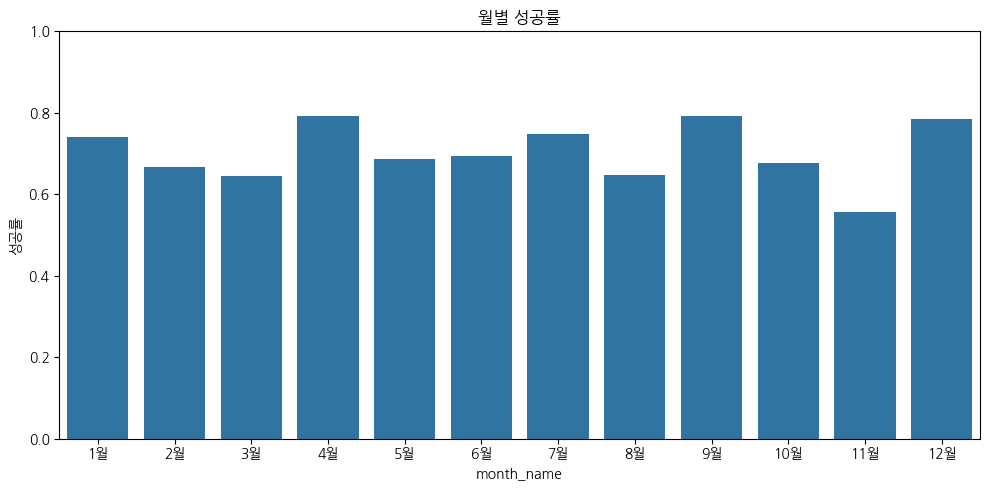

In [45]:
month_order = ['1Ïõî', '2Ïõî', '3Ïõî', '4Ïõî', '5Ïõî', '6Ïõî',
               '7Ïõî', '8Ïõî', '9Ïõî', '10Ïõî', '11Ïõî', '12Ïõî']

uk_df['month_name'] = uk_df['imonth'].map({
    1: '1Ïõî', 2: '2Ïõî', 3: '3Ïõî', 4: '4Ïõî',
    5: '5Ïõî', 6: '6Ïõî', 7: '7Ïõî', 8: '8Ïõî',
    9: '9Ïõî', 10: '10Ïõî', 11: '11Ïõî', 12: '12Ïõî'
})

plt.figure(figsize=(10, 5))
sns.barplot(data=uk_df, x='month_name', y='success', estimator='mean', order=month_order, ci=None)
plt.title('ÏõîÎ≥Ñ ÏÑ±Í≥µÎ•†')
plt.ylabel('ÏÑ±Í≥µÎ•†')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [46]:
import scipy.stats as stats
import pandas as pd

# ÍµêÏ∞®Ìëú ÏÉùÏÑ±
table = pd.crosstab(uk_df['month'], uk_df['success'])

# Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï
chi2, p, dof, expected = stats.chi2_contingency(table)

print(f"Chi-squared: {chi2:.2f}, p-value: {p:.4f}")


Chi-squared: 55.13, p-value: 0.0000


### **ÏöîÏùºÏóê Îî∞Îùº ÏÑ±Í≥µÎ•†Ïù¥ Îã¨ÎùºÏßà Í≤ÉÏù¥Îã§**

In [47]:
import scipy.stats as stats
import pandas as pd

# ÍµêÏ∞®Ìëú ÏÉùÏÑ±
table = pd.crosstab(uk_df['weekday'], uk_df['success'])

# Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï
chi2, p, dof, expected = stats.chi2_contingency(table)

print(f"Chi-squared: {chi2:.2f}, p-value: {p:.4f}")


Chi-squared: 19.39, p-value: 0.0035


In [48]:
table

success    0    1
weekday          
Í∏àÏöîÏùº      126  261
Î™©ÏöîÏùº      142  265
ÏàòÏöîÏùº      112  268
ÏõîÏöîÏùº      111  243
ÏùºÏöîÏùº       81  271
ÌÜ†ÏöîÏùº       77  241
ÌôîÏöîÏùº       98  232

['ÌôîÏöîÏùº' 'ÏàòÏöîÏùº' 'ÌÜ†ÏöîÏùº' 'Î™©ÏöîÏùº' 'ÏõîÏöîÏùº' 'ÏùºÏöîÏùº' 'Í∏àÏöîÏùº']
weekday
Î™©ÏöîÏùº    407
Í∏àÏöîÏùº    387
ÏàòÏöîÏùº    380
ÏõîÏöîÏùº    354
ÏùºÏöîÏùº    352
ÌôîÏöîÏùº    330
ÌÜ†ÏöîÏùº    318
Name: count, dtype: int64


<ipython-input-49-cd0bc73cb532>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_rates.index, y=weekday_rates.values, palette='crest')


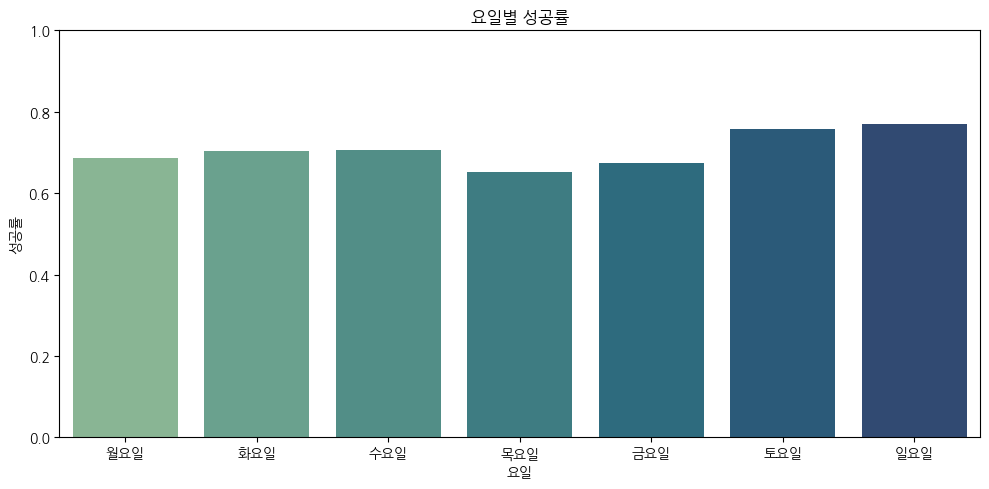

In [49]:
# üìå 1. ÏöîÏùº Í∞í ÌôïÏù∏
print(uk_df['weekday'].unique())
print(uk_df['weekday'].value_counts(dropna=False))

# üìå 2. ÏöîÏùº Î≤îÏ£º Ï†ïÎ†¨ + ÎÇ¥Î¶ºÏ∞®Ïàú Í∑∏ÎûòÌîÑ
weekday_order = ['ÏõîÏöîÏùº', 'ÌôîÏöîÏùº', 'ÏàòÏöîÏùº', 'Î™©ÏöîÏùº', 'Í∏àÏöîÏùº', 'ÌÜ†ÏöîÏùº', 'ÏùºÏöîÏùº']

weekday_rates = uk_df.groupby('weekday')['success'].mean().reindex(weekday_order)

plt.figure(figsize=(10, 5))
sns.barplot(x=weekday_rates.index, y=weekday_rates.values, palette='crest')
plt.title('ÏöîÏùºÎ≥Ñ ÏÑ±Í≥µÎ•†')
plt.ylim(0, 1)
plt.xlabel('ÏöîÏùº')
plt.ylabel('ÏÑ±Í≥µÎ•†')
plt.tight_layout()
plt.show()


### **Î¨¥Í∏∞Ïú†ÌòïÏóê Îî∞Îùº ÏÑ±Í≥µÎ•†Ïù¥ Îã¨ÎùºÏßà Í≤ÉÏù¥Îã§**

<ipython-input-50-4e79da2d4029>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weapon_rates.values, y=weapon_rates.index, palette='viridis')


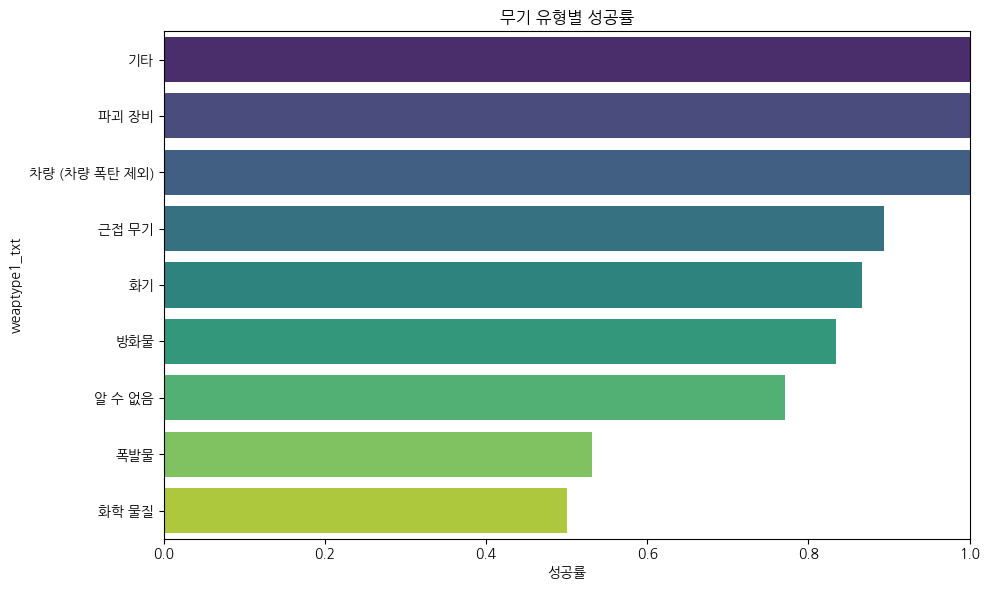

In [50]:
weapon_rates = uk_df.groupby('weaptype1_txt')['success'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=weapon_rates.values, y=weapon_rates.index, palette='viridis')
plt.title('Î¨¥Í∏∞ Ïú†ÌòïÎ≥Ñ ÏÑ±Í≥µÎ•†')
plt.xlabel('ÏÑ±Í≥µÎ•†')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


In [51]:
import scipy.stats as stats

# ÍµêÏ∞®Ìëú ÏÉùÏÑ±
table = pd.crosstab(uk_df['weaptype1_txt'], uk_df['success'])

# Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï
chi2, p, dof, expected = stats.chi2_contingency(table)

print(f"Chi-squared: {chi2:.2f}, p-value: {p:.4f}")


Chi-squared: 311.69, p-value: 0.0000


### **Í≥µÍ≤©Ïú†ÌòïÏóê Îî∞Îùº ÏÑ±Í≥µÎ•†Ïù¥ Îã¨ÎùºÏßà Í≤ÉÏù¥Îã§**

<ipython-input-52-e077df622582>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weapon_rates.values, y=weapon_rates.index, palette='viridis')


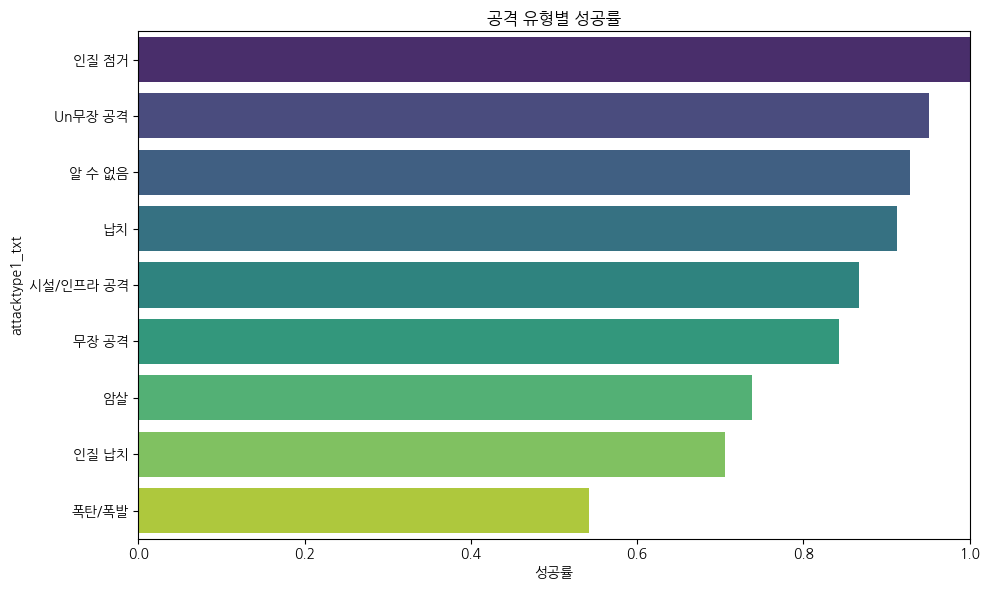

In [52]:
weapon_rates = uk_df.groupby('attacktype1_txt')['success'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=weapon_rates.values, y=weapon_rates.index, palette='viridis')
plt.title('Í≥µÍ≤© Ïú†ÌòïÎ≥Ñ ÏÑ±Í≥µÎ•†')
plt.xlabel('ÏÑ±Í≥µÎ•†')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


In [53]:
# ÍµêÏ∞®Ìëú ÏÉùÏÑ±
table = pd.crosstab(uk_df['attacktype1_txt'], uk_df['success'])

# Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï
chi2, p, dof, expected = stats.chi2_contingency(table)

print(f"Chi-squared: {chi2:.2f}, p-value: {p:.4f}")


Chi-squared: 275.07, p-value: 0.0000


### **ÌÉÄÍ≤üÎåÄÏÉÅÏóê Îî∞Îùº ÏÑ±Í≥µÎ•†Ïù¥ Îã¨ÎùºÏßà Í≤ÉÏù¥Îã§**

<ipython-input-54-c1bb76586234>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_rates.values, y=target_rates.index, palette='cubehelix')


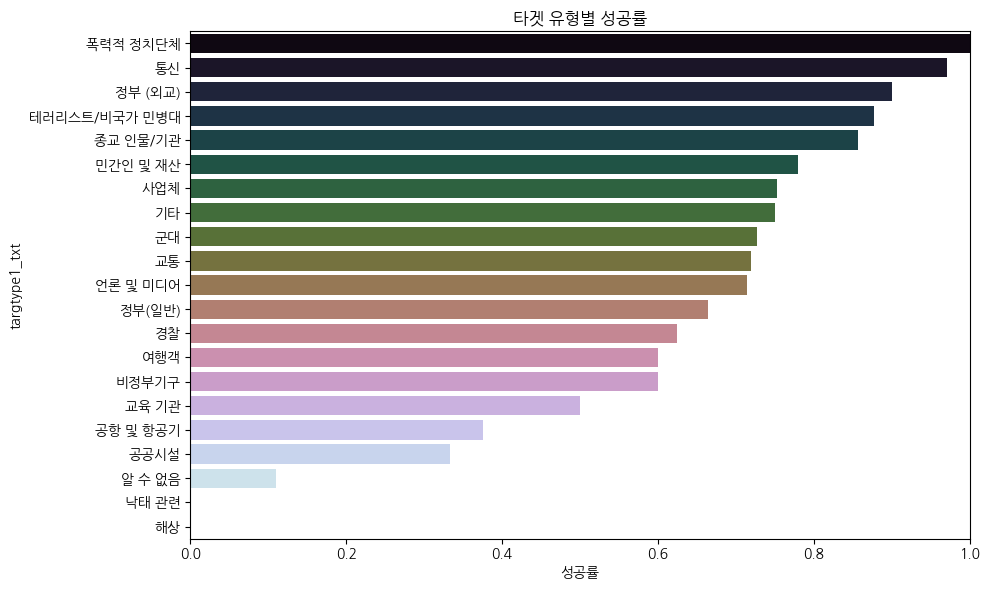

In [54]:
target_rates = uk_df.groupby('targtype1_txt')['success'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=target_rates.values, y=target_rates.index, palette='cubehelix')
plt.title('ÌÉÄÍ≤ü Ïú†ÌòïÎ≥Ñ ÏÑ±Í≥µÎ•†')
plt.xlabel('ÏÑ±Í≥µÎ•†')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


In [55]:
# ÍµêÏ∞®Ìëú ÏÉùÏÑ±
table = pd.crosstab(uk_df['targtype1_txt'], uk_df['success'])

# Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï
chi2, p, dof, expected = stats.chi2_contingency(table)

print(f"Chi-squared: {chi2:.2f}, p-value: {p:.4f}")


Chi-squared: 329.56, p-value: 0.0000


### **ÏßÄÏó≠Ïóê Îî∞Îùº ÏÑ±Í≥µÎ•†Ïù¥ Îã¨ÎùºÏßà Í≤ÉÏù¥Îã§**

<ipython-input-56-6967b3c635fd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prov_rates.values, y=prov_rates.index, palette='coolwarm')


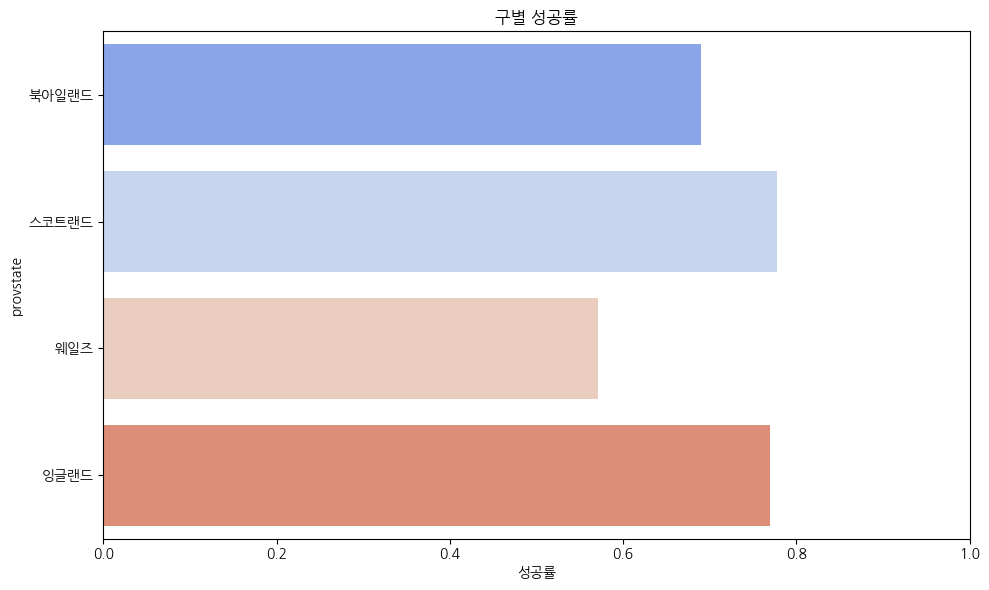

In [56]:
prov_rates = uk_df.groupby('provstate')['success'].mean()
# top_provs = prov_rates[uk_df['provstate'].value_counts() >= 30].sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=prov_rates.values, y=prov_rates.index, palette='coolwarm')
plt.title('Íµ¨Î≥Ñ ÏÑ±Í≥µÎ•†')
plt.xlabel('ÏÑ±Í≥µÎ•†')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

In [57]:
# ÍµêÏ∞®Ìëú ÏÉùÏÑ±
table = pd.crosstab(uk_df['provstate'], uk_df['success'])

# Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï
chi2, p, dof, expected = stats.chi2_contingency(table)

print(f"Chi-squared: {chi2:.2f}, p-value: {p:.4f}")


Chi-squared: 12.72, p-value: 0.0053


## Î™®Îç∏ÎßÅ-Î≥ÄÏàò ÏÑ†ÌÉù

In [58]:
success_counts = uk_df['success'].value_counts()
# ÎπÑÏú® Í≥ÑÏÇ∞
success_ratio = success_counts[1] / success_counts[0]
success_counts, round(success_ratio, 2)

#results: 2.38:1 ÎπÑÏú®ÏùÄ Î∂àÍ∑†ÌòïÏúºÎ°ú Î≥¥ÏßÄ ÏïäÏùå

(success
 1    1781
 0     747
 Name: count, dtype: int64,
 np.float64(2.38))

In [59]:
uk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2528 non-null   int64         
 1   eventid              2528 non-null   int64         
 2   iyear                2528 non-null   int64         
 3   imonth               2528 non-null   int64         
 4   iday                 2528 non-null   int64         
 5   country_txt          2528 non-null   object        
 6   region_txt           2528 non-null   object        
 7   provstate            2528 non-null   object        
 8   latitude             2528 non-null   object        
 9   longitude            2528 non-null   object        
 10  city                 2528 non-null   object        
 11  success              2528 non-null   int64         
 12  attacktype1_txt      2528 non-null   object        
 13  targtype1_txt        2528 non-nul

In [60]:
#Î≥ÄÏàòÏÑ†ÌÉù
features = [
    'weekday',           # ÏöîÏùº
    'month_name',        # Ïõî Ïù¥Î¶Ñ (ÎòêÎäî imonth)
    'attacktype1_txt',   # Í≥µÍ≤© Ïú†Ìòï
    'targtype1_txt',     # ÌÉÄÍ≤ü Ïú†Ìòï
    'weaptype1_txt',     # Î¨¥Í∏∞ Ïú†Ìòï
    'provstate'          # ÏßÄÏó≠
]

In [61]:
uk_df[['provstate', 'success']].groupby(['provstate'], as_index=False).mean().sort_values(by='success', ascending=False)

provstate   success
1     Ïä§ÏΩîÌä∏ÎûúÎìú  0.777778
3      ÏûâÍ∏ÄÎûúÎìú  0.770241
0     Î∂ÅÏïÑÏùºÎûúÎìú  0.689638
2       Ïõ®ÏùºÏ¶à  0.571429

In [62]:
# Ïòà: ÌïÑÏöîÌïú Ïª¨ÎüºÎßå ÎÇ®Í∏¥ ÏÉà DataFrame ÎßåÎì§Í∏∞
keep_cols = [
    'weekday', 'month', 'attacktype1_txt',
    'targtype1_txt', 'weaptype1_txt',
    'provstate', 'success'
]

uk_model = uk_df.copy()
uk_model = uk_df[keep_cols]


In [63]:
uk_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   weekday          2528 non-null   object
 1   month            2528 non-null   int64 
 2   attacktype1_txt  2528 non-null   object
 3   targtype1_txt    2528 non-null   object
 4   weaptype1_txt    2528 non-null   object
 5   provstate        2528 non-null   object
 6   success          2528 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 138.4+ KB


# Î™®Îç∏ÎßÅ

**ÏßÄÎèÑÌïôÏäµ Î∂ÑÎ•ò Î™®Îç∏**
- Ïä§ÏºÄÏùºÎßÅÏù¥ ÌïÑÏöîÏóÜÎäî Î™®Îç∏: Ìä∏Î¶¨Í≥ÑÏó¥Î™®Îç∏
- Ïä§ÌÇ§ÏùºÎßÅÏù¥ ÌïÑÏöîÌïú Î™®Îç∏: Í±∞Î¶¨Í∏∞Î∞òÏùò Î∂ÑÎ•òÎ™®Îç∏

**ÏÑ±Îä• ÌèâÍ∞Ä ÏßÄÌëú**
- Í∏çÏ†ï ÌÅ¥ÎûòÏä§ ÎÜìÏπòÎ©¥ ÏïàÎê® -> recall
- ÏûòÎ™ªÎêú Í∏çÏ†ï ÏòàÏ∏° ÏúÑÌóòÏú®Ïù¥ ÎÇÆÏïÑÏïºÌï®(ÏûêÏõê/ÏòàÏÇ∞ ÎÇ≠ÎπÑ Î∞©ÏßÄ Î™©Ï†Å) -> precision
- ÎëòÏùò Ï°∞Ìôî -> F1 score

## Ï†ïÍ∑úÏÑ±ÌôïÏù∏

In [65]:
encoded_data_onehot = pd.get_dummies(uk_model)

from sklearn.preprocessing import LabelEncoder

# Î≥µÏÇ¨Î≥∏ ÎßåÎì§Í∏∞
encoded_data_label = uk_model.copy()

# Î¨∏ÏûêÏó¥(Î≤îÏ£ºÌòï) Ïª¨ÎüºÎì§Îßå ÎùºÎ≤® Ïù∏ÏΩîÎî©
label_encoders = {}
for col in encoded_data_label.select_dtypes(include='object').columns:
    le = LabelEncoder()
    encoded_data_label[col] = le.fit_transform(encoded_data_label[col].astype(str))
    label_encoders[col] = le  # ÎÇòÏ§ëÏóê inverse_transformÌï† Îïå Ïì∞Í∏∞ ÏúÑÌï®


In [66]:
# Ïä§ÏºÄÏùºÎßÅÏù¥ ÌïÑÏöîÌïú Î™®Îç∏Îì§Ïù¥ ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê, Ïñ¥Îñ§ Ïä§ÏºÄÏùºÎßÅÏùÑ ÏÇ¨Ïö©Ìï¥ÏïºÌï†ÏßÄ ÌôïÏù∏Ìï¥Î¥êÏïºÌï®
from scipy.stats import shapiro
numeric_cols = encoded_data_label.select_dtypes(include='number').columns

for col in numeric_cols:
    stat, p = shapiro(encoded_data_label[col])
    print(f"{col}: p-value = {p:.4f} ‚Üí {'Ï†ïÍ∑úÏÑ± ÏûàÏùå' if p > 0.05 else 'Ï†ïÍ∑úÏÑ± ÏóÜÏùå'}")


weekday: p-value = 0.0000 ‚Üí Ï†ïÍ∑úÏÑ± ÏóÜÏùå
month: p-value = 0.0000 ‚Üí Ï†ïÍ∑úÏÑ± ÏóÜÏùå
attacktype1_txt: p-value = 0.0000 ‚Üí Ï†ïÍ∑úÏÑ± ÏóÜÏùå
targtype1_txt: p-value = 0.0000 ‚Üí Ï†ïÍ∑úÏÑ± ÏóÜÏùå
weaptype1_txt: p-value = 0.0000 ‚Üí Ï†ïÍ∑úÏÑ± ÏóÜÏùå
provstate: p-value = 0.0000 ‚Üí Ï†ïÍ∑úÏÑ± ÏóÜÏùå
success: p-value = 0.0000 ‚Üí Ï†ïÍ∑úÏÑ± ÏóÜÏùå


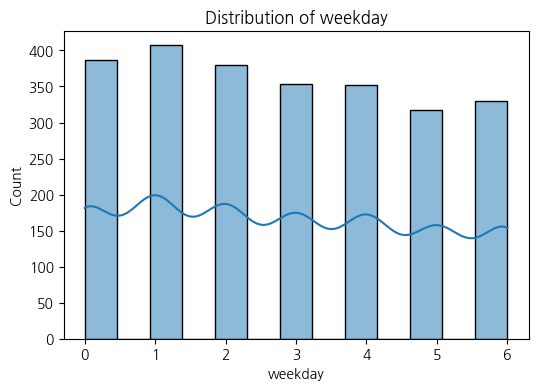

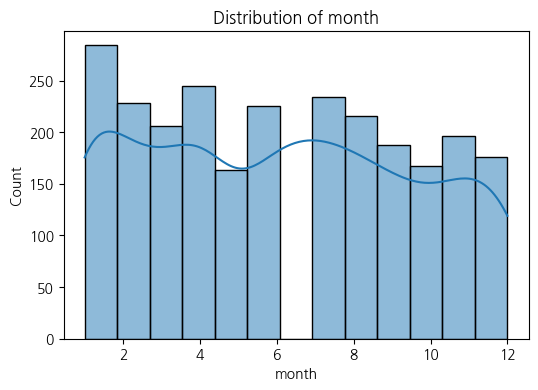

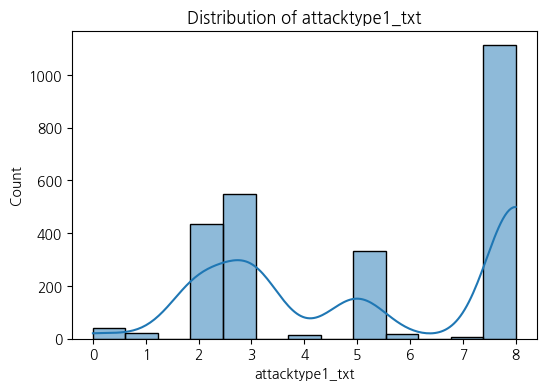

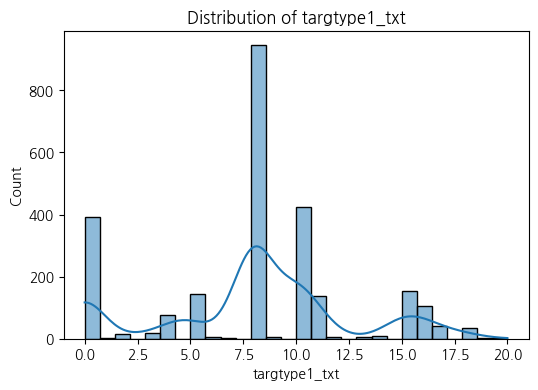

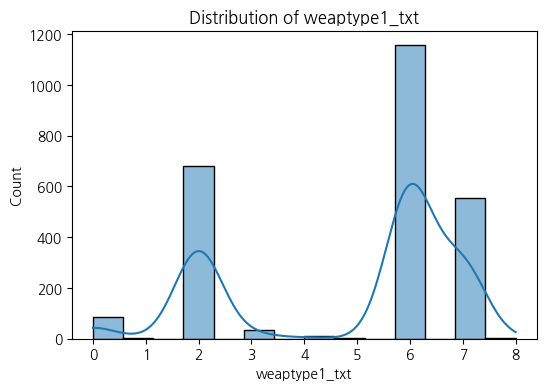

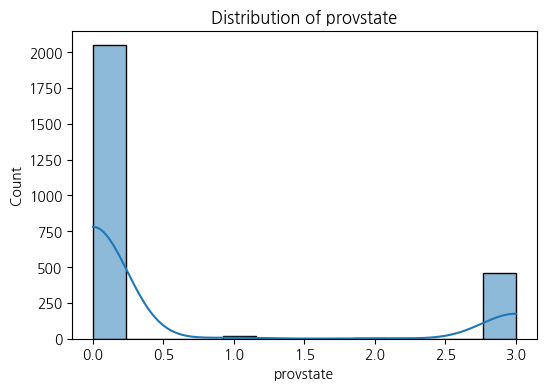

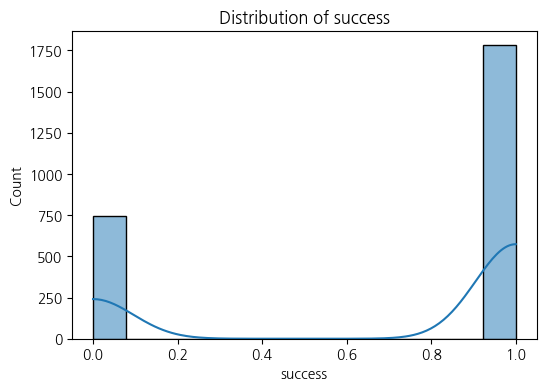

In [67]:
# ÏàòÏπòÌòï Î≥ÄÏàòÏùò Î∂ÑÌè¨ Í∑∏ÎûòÌîÑ
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(encoded_data_label[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [68]:
# ÏõêÌï´Ïù∏ÏΩîÎî©
from scipy.stats import shapiro
numeric_cols = encoded_data_onehot.select_dtypes(include='number').columns

for col in numeric_cols:
    stat, p = shapiro(encoded_data_onehot[col])
    print(f"{col}: p-value = {p:.4f} ‚Üí {'Ï†ïÍ∑úÏÑ± ÏûàÏùå' if p > 0.05 else 'Ï†ïÍ∑úÏÑ± ÏóÜÏùå'}")


month: p-value = 0.0000 ‚Üí Ï†ïÍ∑úÏÑ± ÏóÜÏùå
success: p-value = 0.0000 ‚Üí Ï†ïÍ∑úÏÑ± ÏóÜÏùå


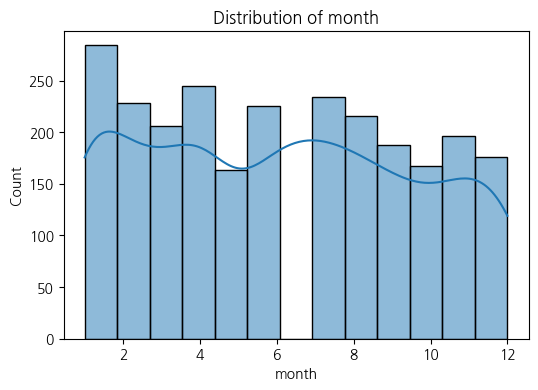

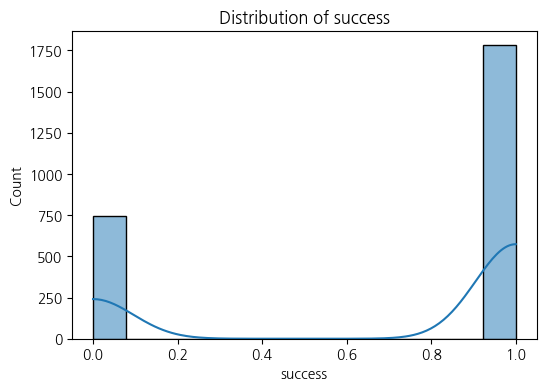

In [69]:
# ÏàòÏπòÌòï Î≥ÄÏàòÏùò Î∂ÑÌè¨ Í∑∏ÎûòÌîÑ
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(encoded_data_onehot[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

ÏÇ¨Ïã§ Î≤îÏ£ºÌòïÎ≥ÄÏàòÎì§ÏùÑ Ïà´ÏûêÎ°ú Ïù∏ÏΩîÎî©ÌïúÍ≤ÉÎì§Ïù¥Îùº Ï†ïÍ∑úÏÑ±Ïù¥ ÏûàÏùÑÏàòÍ∞Ä ÏóÜÏùå -> minmax

## Î™®Îç∏ÎßÅ - ÏõêÌï´Ïù∏ÏΩîÎî©&ÎùºÎ≤®Ïù∏ÏΩîÎî©

In [70]:
encoded_data_onehot.columns

Index(['month', 'success', 'weekday_Í∏àÏöîÏùº', 'weekday_Î™©ÏöîÏùº', 'weekday_ÏàòÏöîÏùº',
       'weekday_ÏõîÏöîÏùº', 'weekday_ÏùºÏöîÏùº', 'weekday_ÌÜ†ÏöîÏùº', 'weekday_ÌôîÏöîÏùº',
       'attacktype1_txt_UnÎ¨¥Ïû• Í≥µÍ≤©', 'attacktype1_txt_ÎÇ©Ïπò',
       'attacktype1_txt_Î¨¥Ïû• Í≥µÍ≤©', 'attacktype1_txt_ÏãúÏÑ§/Ïù∏ÌîÑÎùº Í≥µÍ≤©',
       'attacktype1_txt_Ïïå Ïàò ÏóÜÏùå', 'attacktype1_txt_ÏïîÏÇ¥', 'attacktype1_txt_Ïù∏Ïßà ÎÇ©Ïπò',
       'attacktype1_txt_Ïù∏Ïßà Ï†êÍ±∞', 'attacktype1_txt_Ìè≠ÌÉÑ/Ìè≠Î∞ú', 'targtype1_txt_Í≤ΩÏ∞∞',
       'targtype1_txt_Í≥µÍ≥µÏãúÏÑ§', 'targtype1_txt_Í≥µÌï≠ Î∞è Ìï≠Í≥µÍ∏∞', 'targtype1_txt_ÍµêÏú° Í∏∞Í¥Ä',
       'targtype1_txt_ÍµêÌÜµ', 'targtype1_txt_Íµ∞ÎåÄ', 'targtype1_txt_Í∏∞ÌÉÄ',
       'targtype1_txt_ÎÇôÌÉú Í¥ÄÎ†®', 'targtype1_txt_ÎØºÍ∞ÑÏù∏ Î∞è Ïû¨ÏÇ∞', 'targtype1_txt_ÎπÑÏ†ïÎ∂ÄÍ∏∞Íµ¨',
       'targtype1_txt_ÏÇ¨ÏóÖÏ≤¥', 'targtype1_txt_Ïïå Ïàò ÏóÜÏùå', 'targtype1_txt_Ïñ∏Î°† Î∞è ÎØ∏ÎîîÏñ¥',
       'targtype1_txt_Ïó¨ÌñâÍ∞ù', 'targtype1_txt_Ï†ïÎ∂Ä (Ïô∏Íµê)', 'targt

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

results_tree = []
features=['weekday', 'month', 'attacktype1_txt',
    'targtype1_txt', 'weaptype1_txt', 'provstate']

for encoding_name, data in [('Label Encoding', encoded_data_label), ('One-hot Encoding', encoded_data_onehot)]:

    if encoding_name == 'Label Encoding':
        X = data[features]
    else:
        X = data  # One-hotÏùÄ Ï†ÑÏ≤¥ ÏÇ¨Ïö©

    y = uk_df['success']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        results_tree.append({
            'Encoding': encoding_name,
            'Model': model_name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, zero_division=0),
            'Recall': recall_score(y_test, y_pred, zero_division=0),
            'F1 Score': f1_score(y_test, y_pred, zero_division=0)
        })

df_tree_results = pd.DataFrame(results_tree)


In [72]:
uk_model.columns

Index(['weekday', 'month', 'attacktype1_txt', 'targtype1_txt', 'weaptype1_txt',
       'provstate', 'success'],
      dtype='object')

In [73]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

results_scaled = []
features=['weekday', 'month', 'attacktype1_txt',
    'targtype1_txt', 'weaptype1_txt', 'provstate']

for encoding_name, data in [('Label Encoding', encoded_data_label), ('One-hot Encoding', encoded_data_onehot)]:

    if encoding_name == 'Label Encoding':
        X = data[features]
    else:
        X = data  # One-hotÏùÄ Ï†ÑÏ≤¥ ÏÇ¨Ïö©

    y = uk_df['success']

    # ‚úÖ MinMax Ïä§ÏºÄÏùºÎßÅ
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'SVM': SVC(),
        'MLP (Neural Net)': MLPClassifier(max_iter=500)
    }

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        results_scaled.append({
            'Encoding': encoding_name,
            'Model': model_name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, zero_division=0),
            'Recall': recall_score(y_test, y_pred, zero_division=0),
            'F1 Score': f1_score(y_test, y_pred, zero_division=0)
        })

df_not_tree_results = pd.DataFrame(results_scaled)


In [74]:
final_results = pd.concat([df_tree_results, df_not_tree_results]).sort_values(by='F1 Score', ascending=False)
print(final_results)


           Encoding                Model  Accuracy  Precision    Recall  \
3  One-hot Encoding        Random Forest  1.000000   1.000000  1.000000   
2  One-hot Encoding        Decision Tree  1.000000   1.000000  1.000000   
4  One-hot Encoding  Logistic Regression  1.000000   1.000000  1.000000   
6  One-hot Encoding                  SVM  1.000000   1.000000  1.000000   
7  One-hot Encoding     MLP (Neural Net)  0.998024   0.997175  1.000000   
5  One-hot Encoding  K-Nearest Neighbors  0.952569   0.943396  0.991501   
3    Label Encoding     MLP (Neural Net)  0.731225   0.744921  0.934844   
1    Label Encoding        Random Forest  0.747036   0.790698  0.866856   
2    Label Encoding                  SVM  0.719368   0.734967  0.934844   
1    Label Encoding  K-Nearest Neighbors  0.735178   0.780051  0.864023   
0    Label Encoding  Logistic Regression  0.701581   0.713983  0.954674   
0    Label Encoding        Decision Tree  0.695652   0.798799  0.753541   

   F1 Score  
3  1.00000



---



## Î™®Îç∏ÎßÅ - provstateÎßå ÌÉÄÍ≤üÏù∏ÏΩîÎî©

In [75]:
# ÏõêÎ≥∏ÏóêÏÑú ÏãúÏûë
uk_model = uk_df[[
    'weekday', 'month_name', 'attacktype1_txt',
    'targtype1_txt', 'weaptype1_txt', 'provstate'
]].copy()

# targetÏùÄ Îî∞Î°ú Ï†ÄÏû•
y = uk_df['success']

# üëâ provstateÎßå Îî∞Î°ú Ï†ÄÏû•
provstate_series = uk_model['provstate'].copy()

# ‚úÖ ÎùºÎ≤® Ïù∏ÏΩîÎî©
from sklearn.preprocessing import LabelEncoder

encoded_data_label = uk_model.drop(columns=['provstate']).copy()
label_encoders = {}
for col in encoded_data_label.columns:
    le = LabelEncoder()
    encoded_data_label[col] = le.fit_transform(encoded_data_label[col].astype(str))
    label_encoders[col] = le

# ‚úÖ ÏõêÌï´ Ïù∏ÏΩîÎî©
encoded_data_onehot = pd.get_dummies(uk_model.drop(columns=['provstate'])).astype(int)
#Ìä∏Î¶¨ Í∏∞Î∞ò
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Î™®Îç∏ Í≤∞Í≥º Ï†ÄÏû•Ïö©
results_tree = []

for encoding_name, data in [('Label Encoding', encoded_data_label), ('One-hot Encoding', encoded_data_onehot)]:

    # provstate Îã§Ïãú Î∂ôÏù¥Í∏∞
    data = data.copy()
    data['provstate'] = provstate_series.values

    # split
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

    # ‚úÖ ÌÉÄÍ≤ü Ïù∏ÏΩîÎî©
    prov_mean = pd.concat([X_train['provstate'], y_train], axis=1).groupby('provstate')['success'].mean()
    X_train['provstate_enc'] = X_train['provstate'].map(prov_mean)
    X_test['provstate_enc'] = X_test['provstate'].map(prov_mean)

    # drop original provstate
    X_train.drop('provstate', axis=1, inplace=True)
    X_test.drop('provstate', axis=1, inplace=True)

    # ‚úÖ Ìä∏Î¶¨ Í≥ÑÏó¥ Î™®Îç∏ ÌïôÏäµ
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier

    models = {
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        results_tree.append({
            'Encoding': encoding_name,
            'Model': model_name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, zero_division=0),
            'Recall': recall_score(y_test, y_pred, zero_division=0),
            'F1 Score': f1_score(y_test, y_pred, zero_division=0)
        })

df_tree_results = pd.DataFrame(results_tree).sort_values(by='F1 Score', ascending=False)
print(df_tree_results)

           Encoding          Model  Accuracy  Precision    Recall  F1 Score
1    Label Encoding  Random Forest  0.743083   0.789610  0.861190  0.823848
3  One-hot Encoding  Random Forest  0.739130   0.784062  0.864023  0.822102
2  One-hot Encoding  Decision Tree  0.707510   0.802360  0.770538  0.786127
0    Label Encoding  Decision Tree  0.697628   0.812500  0.736544  0.772660


In [76]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

results_scaled = []

for encoding_name, data in [('Label Encoding', encoded_data_label), ('One-hot Encoding', encoded_data_onehot)]:

    # üîÅ provstate Îã§Ïãú Î∂ôÏù¥Í∏∞
    data = data.copy()
    data['provstate'] = provstate_series.values

    # split
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

    # ‚úÖ ÌÉÄÍ≤ü Ïù∏ÏΩîÎî©
    prov_mean = pd.concat([X_train['provstate'], y_train], axis=1).groupby('provstate')['success'].mean()
    X_train['provstate_enc'] = X_train['provstate'].map(prov_mean)
    X_test['provstate_enc'] = X_test['provstate'].map(prov_mean)
    X_train.drop('provstate', axis=1, inplace=True)
    X_test.drop('provstate', axis=1, inplace=True)

    # ‚úÖ MinMax Ïä§ÏºÄÏùºÎßÅ
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # ‚úÖ ÎπÑÌä∏Î¶¨ Î™®Îç∏ ÌïôÏäµ
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'SVM': SVC(),
        'MLP (Neural Net)': MLPClassifier(max_iter=500)
    }

    for model_name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        results_scaled.append({
            'Encoding': encoding_name,
            'Model': model_name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, zero_division=0),
            'Recall': recall_score(y_test, y_pred, zero_division=0),
            'F1 Score': f1_score(y_test, y_pred, zero_division=0)
        })

df_scaled_results = pd.DataFrame(results_scaled).sort_values(by='F1 Score', ascending=False)
print(df_scaled_results)


           Encoding                Model  Accuracy  Precision    Recall  \
6  One-hot Encoding                  SVM  0.766798   0.759382  0.974504   
4  One-hot Encoding  Logistic Regression  0.754941   0.763218  0.940510   
7  One-hot Encoding     MLP (Neural Net)  0.756917   0.796392  0.875354   
5  One-hot Encoding  K-Nearest Neighbors  0.752964   0.789340  0.881020   
3    Label Encoding     MLP (Neural Net)  0.719368   0.727862  0.954674   
1    Label Encoding  K-Nearest Neighbors  0.741107   0.784615  0.866856   
2    Label Encoding                  SVM  0.729249   0.755924  0.903683   
0    Label Encoding  Logistic Regression  0.695652   0.710359  0.951841   

   F1 Score  
6  0.853598  
4  0.842640  
7  0.834008  
5  0.832664  
3  0.825980  
1  0.823688  
2  0.823226  
0  0.813559  


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [77]:
final_results = pd.concat([df_tree_results, df_scaled_results])
final_results_sorted = final_results.sort_values(by='F1 Score', ascending=False)
print("provstateÎßå ÌÉÄÍ≤üÏù∏ÏΩîÎî©")
print("*"*60)
print(final_results_sorted)


provstateÎßå ÌÉÄÍ≤üÏù∏ÏΩîÎî©
************************************************************
           Encoding                Model  Accuracy  Precision    Recall  \
6  One-hot Encoding                  SVM  0.766798   0.759382  0.974504   
4  One-hot Encoding  Logistic Regression  0.754941   0.763218  0.940510   
7  One-hot Encoding     MLP (Neural Net)  0.756917   0.796392  0.875354   
5  One-hot Encoding  K-Nearest Neighbors  0.752964   0.789340  0.881020   
3    Label Encoding     MLP (Neural Net)  0.719368   0.727862  0.954674   
1    Label Encoding        Random Forest  0.743083   0.789610  0.861190   
1    Label Encoding  K-Nearest Neighbors  0.741107   0.784615  0.866856   
2    Label Encoding                  SVM  0.729249   0.755924  0.903683   
3  One-hot Encoding        Random Forest  0.739130   0.784062  0.864023   
0    Label Encoding  Logistic Regression  0.695652   0.710359  0.951841   
2  One-hot Encoding        Decision Tree  0.707510   0.802360  0.770538   
0    Label

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


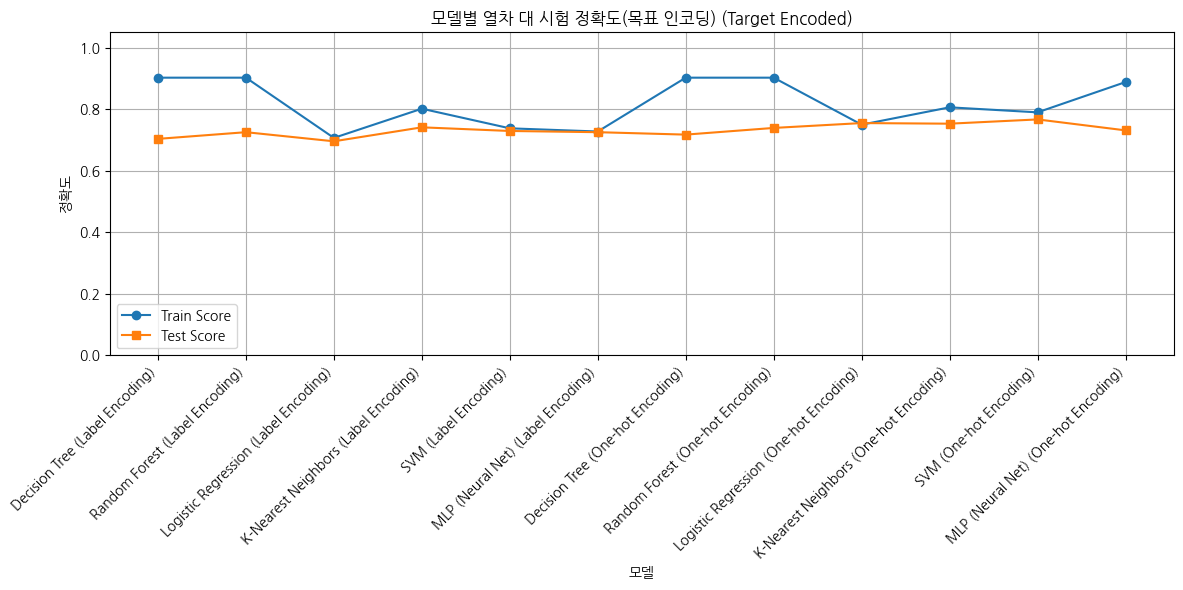

In [78]:
import matplotlib.pyplot as plt

train_scores = []
test_scores = []
model_names = []

for encoding_name, data in [('Label Encoding', encoded_data_label), ('One-hot Encoding', encoded_data_onehot)]:

    data = data.copy()
    data['provstate'] = provstate_series.values
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

    prov_mean = pd.concat([X_train['provstate'], y_train], axis=1).groupby('provstate')['success'].mean()
    X_train['provstate_enc'] = X_train['provstate'].map(prov_mean)
    X_test['provstate_enc'] = X_test['provstate'].map(prov_mean)
    X_train.drop('provstate', axis=1, inplace=True)
    X_test.drop('provstate', axis=1, inplace=True)

    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    models = {
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'SVM': SVC(),
        'MLP (Neural Net)': MLPClassifier(max_iter=500)
    }

    for model_name, model in models.items():
        model.fit(X_train_scaled, y_train)
        train_score = model.score(X_train_scaled, y_train)
        test_score = model.score(X_test_scaled, y_test)

        model_names.append(f"{model_name} ({encoding_name})")
        train_scores.append(train_score)
        test_scores.append(test_score)

# üîΩ ÏãúÍ∞ÅÌôî: Í∫æÏùÄÏÑ† Í∑∏ÎûòÌîÑ
plt.figure(figsize=(12, 6))
plt.plot(model_names, train_scores, marker='o', label='Train Score')
plt.plot(model_names, test_scores, marker='s', label='Test Score')
plt.title("Î™®Îç∏Î≥Ñ Ïó¥Ï∞® ÎåÄ ÏãúÌóò Ï†ïÌôïÎèÑ(Î™©Ìëú Ïù∏ÏΩîÎî©) (Target Encoded)")
plt.xlabel("Î™®Îç∏")
plt.ylabel("Ï†ïÌôïÎèÑ")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Î™®Îç∏ÎßÅ - Î≤îÏ£ºÌòï Î≥ÄÏàò Î™®Îëê ÌÉÄÍ≤üÏù∏ÏΩîÎî©

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

# Ïã§ÌóòÌï† Î≥ÄÏàò Î™©Î°ù
target_encoding_candidates = ['attacktype1_txt',
    'targtype1_txt', 'weaptype1_txt', 'provstate']

results = []

for te_var in target_encoding_candidates:
    # base Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    X = uk_model.copy()
    y = uk_df['success']

    # ‚úÖ ÌÉÄÍ≤ü Ïù∏ÏΩîÎî© Ï†ÅÏö© Ï†Ñ, ÎÇòÎ®∏ÏßÄÎäî ÎùºÎ≤®Ïù∏ÏΩîÎî© Ï≤òÎ¶¨
    encoded = X.drop(columns=[te_var]).copy()
    le = LabelEncoder()
    for col in encoded.columns:
        encoded[col] = le.fit_transform(encoded[col].astype(str))

    # üîÅ target Ïù∏ÏΩîÎî© ÎåÄÏÉÅ Î≥ÄÏàòÎßå Í∑∏ÎåÄÎ°ú Ï∂îÍ∞Ä
    encoded[te_var] = X[te_var].copy()

    # split
    X_train, X_test, y_train, y_test = train_test_split(encoded, y, test_size=0.2, random_state=42)

    # ‚úÖ ÌÉÄÍ≤ü Ïù∏ÏΩîÎî© Ï†ÅÏö©
    mean_map = pd.concat([X_train[te_var], y_train], axis=1).groupby(te_var)['success'].mean()
    X_train[te_var + '_enc'] = X_train[te_var].map(mean_map)
    X_test[te_var + '_enc'] = X_test[te_var].map(mean_map)
    X_train.drop(columns=[te_var], inplace=True)
    X_test.drop(columns=[te_var], inplace=True)

    # ‚úÖ MinMax Scaling
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Î™®Îç∏ ÌïôÏäµ
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Í≤∞Í≥º Ï†ÄÏû•
    results.append({
        'Encoded Variable': te_var,
        'F1 Score': f1_score(y_test, y_pred, zero_division=0)
    })

# Í≤∞Í≥º Ï∂úÎ†•
df_var_f1 = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print(df_var_f1)


  Encoded Variable  F1 Score
1    targtype1_txt  0.839752
3        provstate  0.813559
0  attacktype1_txt  0.805933
2    weaptype1_txt  0.802516


In [80]:
# Î≤îÏ£ºÌòï Î≥ÄÏàò Î™®Îëê ÌÉÄÍ≤üÏù∏ÏΩîÎî© + Ìä∏Î¶¨Í≥ÑÏó¥
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

results_tree = []

# Ïù∏ÏΩîÎî© ÎåÄÏÉÅ Î≥ÄÏàò
target_encode_cols = ['attacktype1_txt', 'targtype1_txt', 'weaptype1_txt', 'provstate']
ordinal_encode_cols = ['weekday', 'month_name']

X = uk_model[target_encode_cols + ordinal_encode_cols].copy()
y = uk_df['success']

# ordinal ÎùºÎ≤® Ïù∏ÏΩîÎî©
for col in ordinal_encode_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ÌÉÄÍ≤ü Ïù∏ÏΩîÎî©
for col in target_encode_cols:
    mean_map = pd.concat([X_train[col], y_train], axis=1).groupby(col)['success'].mean()
    X_train[col + '_enc'] = X_train[col].map(mean_map)
    X_test[col + '_enc'] = X_test[col].map(mean_map)

X_train.drop(columns=target_encode_cols, inplace=True)
X_test.drop(columns=target_encode_cols, inplace=True)

# Ìä∏Î¶¨ Î™®Îç∏
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results_tree.append({
        'Model': model_name,
        'Encoding': 'Mixed Encoding',
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, zero_division=0)
    })

df_tree_mixed = pd.DataFrame(results_tree)
df_tree_mixed



Model        Encoding  Accuracy  Precision    Recall  F1 Score
0  Decision Tree  Mixed Encoding  0.689723   0.788235  0.759207  0.773449
1  Random Forest  Mixed Encoding  0.743083   0.789610  0.861190  0.823848

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

results_nontree = []

# Îã§Ïãú ÎèôÏùºÌïú Ïù∏ÏΩîÎî©
X = uk_model[target_encode_cols + ordinal_encode_cols].copy()
y = uk_df['success']

for col in ordinal_encode_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for col in target_encode_cols:
    mean_map = pd.concat([X_train[col], y_train], axis=1).groupby(col)['success'].mean()
    X_train[col + '_enc'] = X_train[col].map(mean_map)
    X_test[col + '_enc'] = X_test[col].map(mean_map)

X_train.drop(columns=target_encode_cols, inplace=True)
X_test.drop(columns=target_encode_cols, inplace=True)

# ‚úÖ Ïä§ÏºÄÏùºÎßÅ
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ÎπÑÌä∏Î¶¨ Î™®Îç∏Îì§
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC(),
    'MLP (Neural Net)': MLPClassifier(max_iter=500)
}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    results_nontree.append({
        'Model': model_name,
        'Encoding': 'Mixed Encoding',
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, zero_division=0)
    })

df_nontree_mixed = pd.DataFrame(results_nontree)
df_nontree_mixed

Model        Encoding  Accuracy  Precision    Recall  \
0  Logistic Regression  Mixed Encoding  0.743083   0.748330  0.951841   
1  K-Nearest Neighbors  Mixed Encoding  0.750988   0.785894  0.883853   
2                  SVM  Mixed Encoding  0.749012   0.742489  0.980170   
3     MLP (Neural Net)  Mixed Encoding  0.737154   0.748869  0.937677   

   F1 Score  
0  0.837905  
1  0.832000  
2  0.844933  
3  0.832704

In [82]:
final_mixed_results = pd.concat([df_tree_mixed, df_nontree_mixed])
final_mixed_sorted = final_mixed_results.sort_values(by='F1 Score', ascending=False)
print("Î≤îÏ£ºÌòï Î™®Îëê ÌÉÄÍ≤üÏù∏ÏΩîÎî©ÌñàÏùÑ Îïå")
print("*"*60)
print(final_mixed_sorted)

Î≤îÏ£ºÌòï Î™®Îëê ÌÉÄÍ≤üÏù∏ÏΩîÎî©ÌñàÏùÑ Îïå
************************************************************
                 Model        Encoding  Accuracy  Precision    Recall  \
2                  SVM  Mixed Encoding  0.749012   0.742489  0.980170   
0  Logistic Regression  Mixed Encoding  0.743083   0.748330  0.951841   
3     MLP (Neural Net)  Mixed Encoding  0.737154   0.748869  0.937677   
1  K-Nearest Neighbors  Mixed Encoding  0.750988   0.785894  0.883853   
1        Random Forest  Mixed Encoding  0.743083   0.789610  0.861190   
0        Decision Tree  Mixed Encoding  0.689723   0.788235  0.759207   

   F1 Score  
2  0.844933  
0  0.837905  
3  0.832704  
1  0.832000  
1  0.823848  
0  0.773449  


## Î™®Îç∏ÎßÅ - f1 score ÏÉÅÏúÑ2Í∞úÎßå ÌÉÄÍ≤üÏù∏ÏΩîÎî©(hybrid)


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Î≥ÄÏàò Ï†ïÏùò
target_encoding_vars = ['targtype1_txt', 'weaptype1_txt']
onehot_encoding_vars = ['attacktype1_txt', 'provstate']
label_encoding_vars = ['weekday', 'month_name']

# Î≥µÏÇ¨Î≥∏
X = uk_model[target_encoding_vars + onehot_encoding_vars + label_encoding_vars].copy()
y = uk_df['success']

# ‚úÖ ÎùºÎ≤® Ïù∏ÏΩîÎî©
from sklearn.preprocessing import LabelEncoder
for col in label_encoding_vars:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# ‚úÖ ÏõêÌï´ Ïù∏ÏΩîÎî©
X = pd.get_dummies(X, columns=onehot_encoding_vars)

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ‚úÖ ÌÉÄÍ≤ü Ïù∏ÏΩîÎî©
for col in target_encoding_vars:
    target_map = pd.concat([X_train[col], y_train], axis=1).groupby(col)['success'].mean()
    X_train[col + '_enc'] = X_train[col].map(target_map)
    X_test[col + '_enc'] = X_test[col].map(target_map)
    X_train.drop(columns=[col], inplace=True)
    X_test.drop(columns=[col], inplace=True)

# Î™®Îç∏ ÌõàÎ†®
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

results_tree = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results_tree.append({
        'Model': name,
        'Encoding': 'Hybrid',
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, zero_division=0)
    })

df_tree_hybrid = pd.DataFrame(results_tree)
df_tree_hybrid


Model Encoding  Accuracy  Precision    Recall  F1 Score
0  Decision Tree   Hybrid  0.685771   0.793939  0.742210  0.767204
1  Random Forest   Hybrid  0.739130   0.787013  0.858357  0.821138

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

X = uk_model[target_encoding_vars + onehot_encoding_vars + label_encoding_vars].copy()
y = uk_df['success']

for col in label_encoding_vars:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

X = pd.get_dummies(X, columns=onehot_encoding_vars)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for col in target_encoding_vars:
    target_map = pd.concat([X_train[col], y_train], axis=1).groupby(col)['success'].mean()
    X_train[col + '_enc'] = X_train[col].map(target_map)
    X_test[col + '_enc'] = X_test[col].map(target_map)
    X_train.drop(columns=[col], inplace=True)
    X_test.drop(columns=[col], inplace=True)

# Ïä§ÏºÄÏùºÎßÅ
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ÎπÑÌä∏Î¶¨ Í∏∞Î∞ò Î™®Îç∏
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC(),
    'MLP (Neural Net)': MLPClassifier(max_iter=500)
}

results_nontree = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    results_nontree.append({
        'Model': name,
        'Encoding': 'Hybrid',
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, zero_division=0)
    })

df_nontree_hybrid = pd.DataFrame(results_nontree)
df_nontree_hybrid

Model Encoding  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression   Hybrid  0.752964   0.755605  0.954674  0.843554
1  K-Nearest Neighbors   Hybrid  0.756917   0.796392  0.875354  0.834008
2                  SVM   Hybrid  0.758893   0.746269  0.991501  0.851582
3     MLP (Neural Net)   Hybrid  0.741107   0.768116  0.900850  0.829205

In [85]:
final_hybrid_results = pd.concat([df_tree_hybrid, df_nontree_hybrid])
final_hybrid_sorted = final_hybrid_results.sort_values(by='F1 Score', ascending=False)
print("Î™®Îì† Ïù∏ÏΩîÎî© Ï¢ÖÎ•ò Îã§ ÏÑûÏóàÏùÑÎïå")
print("*"*60)
print(final_hybrid_sorted)

Î™®Îì† Ïù∏ÏΩîÎî© Ï¢ÖÎ•ò Îã§ ÏÑûÏóàÏùÑÎïå
************************************************************
                 Model Encoding  Accuracy  Precision    Recall  F1 Score
2                  SVM   Hybrid  0.758893   0.746269  0.991501  0.851582
0  Logistic Regression   Hybrid  0.752964   0.755605  0.954674  0.843554
1  K-Nearest Neighbors   Hybrid  0.756917   0.796392  0.875354  0.834008
3     MLP (Neural Net)   Hybrid  0.741107   0.768116  0.900850  0.829205
1        Random Forest   Hybrid  0.739130   0.787013  0.858357  0.821138
0        Decision Tree   Hybrid  0.685771   0.793939  0.742210  0.767204


## ‚úÖÏµúÏ¢Ö Î™®Îç∏ ÏÑ†ÌÉù

provstateÎßå ÌÉÄÍ≤üÏù∏ÏΩîÎî© + onehot Ïù∏ÏΩîÎî©Ïùò SVM, Í∑∏ Îã§ÏùåÏùÄ logreg




# SVM ÌäúÎãù

In [86]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report
import pandas as pd

# ‚úÖ Ïù∏ÏΩîÎî©Îêú Îç∞Ïù¥ÌÑ∞ ÏÑ†ÌÉù: Ïó¨Í∏∞ÏÑúÎäî label or onehot Ï§ë ÌïòÎÇò ÏÑ†ÌÉù
data = encoded_data_onehot.copy()  # ÎòêÎäî

# ‚úÖ provstate Î∂ôÏù¥Í∏∞
data['provstate'] = provstate_series.values
y = uk_df['success']

# ‚úÖ train/test Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

# ‚úÖ provstateÎßå ÌÉÄÍ≤ü Ïù∏ÏΩîÎî©
prov_mean = pd.concat([X_train['provstate'], y_train], axis=1).groupby('provstate')['success'].mean()
X_train['provstate_enc'] = X_train['provstate'].map(prov_mean)
X_test['provstate_enc'] = X_test['provstate'].map(prov_mean)

# ÏõêÎûò provstate Ï†úÍ±∞
X_train.drop('provstate', axis=1, inplace=True)
X_test.drop('provstate', axis=1, inplace=True)

# ‚úÖ MinMaxScaler Ï†ÅÏö©
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ‚úÖ SVM + GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

# ‚úÖ Í≤∞Í≥º ÌôïÏù∏
print("üìå Best Parameters:", grid.best_params_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print("‚úÖ Test F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
üìå Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
‚úÖ Test F1 Score: 0.8535980148883374
              precision    recall  f1-score   support

           0       0.83      0.29      0.43       153
           1       0.76      0.97      0.85       353

    accuracy                           0.77       506
   macro avg       0.79      0.63      0.64       506
weighted avg       0.78      0.77      0.72       506



‚ö†Ô∏è Ïã§Ìå®Í∞êÏßÄÎä•Î†•Ïù¥ ÎÑàÎ¨¥ ÎÇÆÏùÄÎìØ

In [87]:
# svm + Í∞ÄÏ§ëÏπò Ï†ÅÏö©ÌïôÏäµ
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# ‚úÖ class_weight='balanced' Ï†ÅÏö©
balanced_svm = SVC(C=1, kernel='rbf', gamma='scale', class_weight='balanced')
balanced_svm.fit(X_train_scaled, y_train)

# ‚úÖ ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred_balanced = balanced_svm.predict(X_test_scaled)

print("‚úÖ [Balanced SVM] Test F1 Score:", f1_score(y_test, y_pred_balanced))
print(classification_report(y_test, y_pred_balanced))


‚úÖ [Balanced SVM] Test F1 Score: 0.781010719754977
              precision    recall  f1-score   support

           0       0.52      0.71      0.60       153
           1       0.85      0.72      0.78       353

    accuracy                           0.72       506
   macro avg       0.69      0.71      0.69       506
weighted avg       0.75      0.72      0.73       506



‚úÖ Ïù¥Î†áÍ≤å ÌïòÎ©¥ f1 scoreÍ∞Ä ÎÑàÎ¨¥ ÎÇÆÏïÑÏßê.

‚úÖ Ïö∞Î¶¨ Î™©Ï†ÅÏùÑ ÏÉùÍ∞ÅÌï¥Î¥§ÏùÑ Îïå, Ïã§Ìå®Î•º Ïû°Îäî Í≤ÉÏùÄ ÌÅ¨Í≤å Ï§ëÏöîÌïòÏßÄ ÏïäÏùÑ Í≤É Í∞ôÏùå, ÏÑ±Í≥µÏù∏Îç∞ Ïã§Ìå®ÎùºÍ≥† ÏòàÏ∏°Ìï¥ÏÑú ÏúÑÌóòÌïú ÌÖåÎü¨Ïùò ÏÑ±Í≥µÏùÑ ÎÜìÏπòÎäîÍ≤ÉÏù¥ Ï†ïÎßê ÏúÑÌóòÌïú Í≤É!!

‚úÖ Îî∞ÎùºÏÑú, ÏÑ±Í≥µÏùÑ Ïûò Ïû°Îäî, weight_balancedÍ∞Ä ÏóÜÎäî Í∏∞Î≥∏ SVM Î™®Îç∏ÏùÑ ÏµúÏö∞ÏÑ†ÏúºÎ°ú Í∞ÄÏßÄÍ≥† Í∞ê

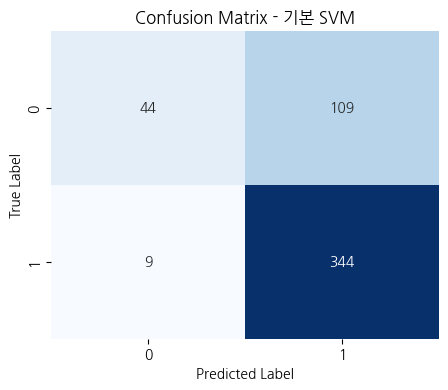

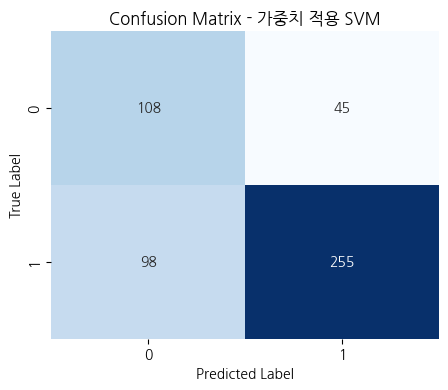

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# ‚úÖ Í∏∞Î≥∏ SVM ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî
y_pred_default = best_model.predict(X_test_scaled)
plot_conf_matrix(y_test, y_pred_default, title="Confusion Matrix - Í∏∞Î≥∏ SVM")

# ‚úÖ Balanced SVM ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plot_conf_matrix(y_test, y_pred_balanced, title="Confusion Matrix - Í∞ÄÏ§ëÏπò Ï†ÅÏö© SVM")


- [0,0]	Ïã§Ï†ú Ïã§Ìå®(0)Ïù¥Í≥† Ïã§Ìå®ÎùºÍ≥† ÏòàÏ∏°Ìï® ‚Üí True Negative
- [0,1]	Ïã§Ï†ú Ïã§Ìå®Ïù∏Îç∞ ÏÑ±Í≥µÏúºÎ°ú ÏòàÏ∏°Ìï® ‚Üí False Positive
- [1,0]	Ïã§Ï†ú ÏÑ±Í≥µÏù∏Îç∞ Ïã§Ìå®Î°ú ÏòàÏ∏°Ìï® ‚Üí False Negative (ÏúÑÌóò!!)
- [1,1]	Ïã§Ï†ú ÏÑ±Í≥µÏù¥Í≥† ÏÑ±Í≥µÏúºÎ°ú ÏòàÏ∏°Ìï® ‚Üí True Positive

Í∏∞Î≥∏ SVMÎ™®Îç∏Ïù¥ FNÏù¥ Îçî ÎÇÆÍ≥†, TPÍ∞Ä Îçî ÎÜíÏùå
Ïã§Ï†úÎ°úÎäî Ïã§Ìå®Ìï† ÏÇ¨Í±¥ÎèÑ ÏÑ±Í≥µÏúºÎ°ú ÏòàÏ∏°ÌïòÎäî ÌöüÏàòÎèÑ ÍΩ§ÎÇò ÎÜíÏïòÏßÄÎßå ÌòπÏãú Î™®Î•º ÏÉÅÌô©Ïóê  ÎåÄÎπÑÌïòÎäîÍ±∞ÎãàÍπå Ïù¥Í±¥ Ïò§Ï¢ã ÏïÑÎãêÍπå?!? (Ïù∏Î†•ÎÇ≠ÎπÑ, ÏòàÏÇ∞ ÎÇ≠ÎπÑ Í∞ôÏùÄÍ±¥ ÏûàÏùÑ Ïàò ÏûàÍ≤†ÏßÄÎßå)

‚û°Ô∏è Í∏∞Î≥∏ SVM Ï±ÑÌÉù!!

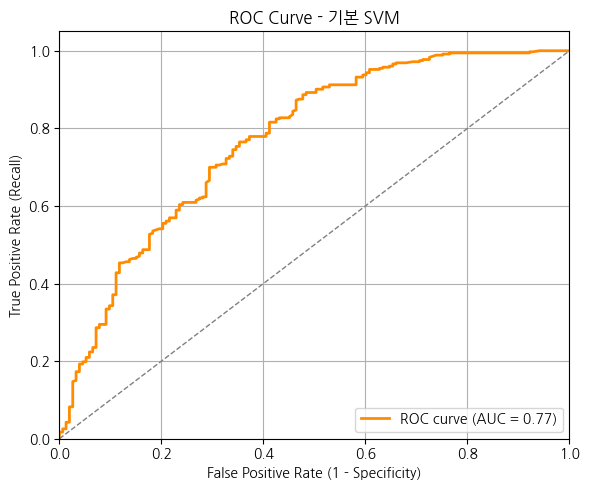

In [89]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ‚úÖ predict_probaÍ∞Ä ÏóÜÏñ¥ÏÑú decision_function ÏÇ¨Ïö© (SVM ÌäπÏßï!)
y_scores = best_model.decision_function(X_test_scaled)

# ‚úÖ ROC Curve Í≥ÑÏÇ∞
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# ‚úÖ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # ÎûúÎç§ Î∂ÑÎ•ò Í∏∞Ï§ÄÏÑ†
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Í∏∞Î≥∏ SVM')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


‚úÖ [VotingClassifier] F1 Score: 0.8538461538461538
              precision    recall  f1-score   support

           0       0.75      0.39      0.51       153
           1       0.78      0.94      0.85       353

    accuracy                           0.77       506
   macro avg       0.76      0.66      0.68       506
weighted avg       0.77      0.77      0.75       506



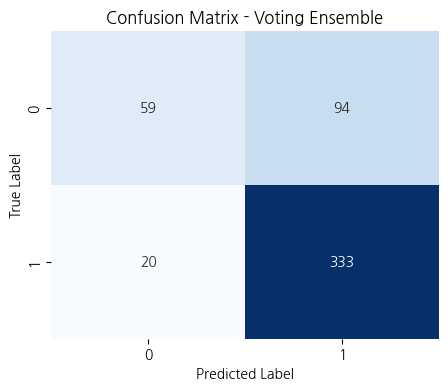

In [90]:
# ÏïôÏÉÅÎ∏î
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# ‚úÖ ÏïôÏÉÅÎ∏î Íµ¨ÏÑ± (ÌôïÎ•† Í∏∞Î∞ò soft voting)
ensemble = VotingClassifier(
    estimators=[
        ('svc', SVC(C=1, gamma='scale', kernel='rbf', probability=True)),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('lr', LogisticRegression(max_iter=1000, random_state=42))
    ],
    voting='soft',  # ÌôïÎ•† ÌèâÍ∑† Í∏∞Î∞ò
    n_jobs=-1
)

# ÌïôÏäµ
ensemble.fit(X_train_scaled, y_train)

# ÏòàÏ∏°
y_pred_ensemble = ensemble.predict(X_test_scaled)

# ÏÑ±Îä• ÌèâÍ∞Ä
print("‚úÖ [VotingClassifier] F1 Score:", f1_score(y_test, y_pred_ensemble))
print(classification_report(y_test, y_pred_ensemble))

# ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
plot_conf_matrix(y_test, y_pred_ensemble, title="Confusion Matrix - Voting Ensemble")


‚úÖ [StackingClassifier] F1 Score: 0.8534704370179949
              precision    recall  f1-score   support

           0       0.74      0.39      0.51       153
           1       0.78      0.94      0.85       353

    accuracy                           0.77       506
   macro avg       0.76      0.67      0.68       506
weighted avg       0.77      0.77      0.75       506



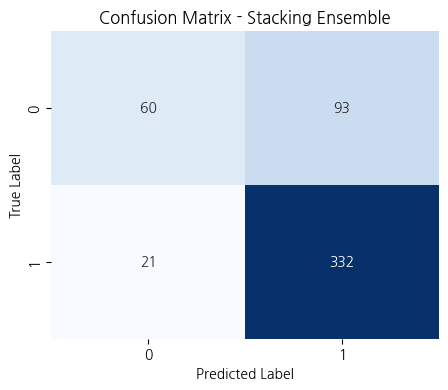

In [91]:
#FP,FNÎëòÎã§ ÎÇÆÏ∂îÍ≥† Ïã∂ÏùÄÎéÖ---> stacking
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# ‚úÖ Í∞úÎ≥Ñ Î™®Îç∏Îì§ (ÌôïÎ•† Ï∂úÎ†• Í∞ÄÎä•ÌïòÎèÑÎ°ù ÏÑ§Ï†ï)
base_estimators = [
    ('svc', SVC(C=1, kernel='rbf', gamma='scale', probability=True)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]

# ‚úÖ ÏµúÏ¢Ö Î©îÌÉÄ Î™®Îç∏: Logistic Regression
final_estimator = LogisticRegression(max_iter=1000, random_state=42)

# ‚úÖ Ïä§ÌÉúÌÇπ ÏïôÏÉÅÎ∏î Íµ¨ÏÑ±
stack_model = StackingClassifier(
    estimators=base_estimators,
    final_estimator=final_estimator,
    cv=5,
    n_jobs=-1,
    passthrough=False  # TrueÎ°ú Î∞îÍæ∏Î©¥ ÏõêÎ≥∏ featureÎèÑ Í∞ôÏù¥ ÏÇ¨Ïö©
)

# ‚úÖ ÌïôÏäµ
stack_model.fit(X_train_scaled, y_train)

# ‚úÖ ÏòàÏ∏°
y_pred_stack = stack_model.predict(X_test_scaled)

# ‚úÖ ÌèâÍ∞Ä
print("‚úÖ [StackingClassifier] F1 Score:", f1_score(y_test, y_pred_stack))
print(classification_report(y_test, y_pred_stack))

# ‚úÖ Confusion Matrix
plot_conf_matrix(y_test, y_pred_stack, title="Confusion Matrix - Stacking Ensemble")


#### stackingÏùÑ ÏÑ†ÌÉùÌïú Ïù¥Ïú†

 FPÎèÑ ÎÇÆÏ∂îÍ≥†, FNÎèÑ Ï§ÑÏùº Ïàò ÏûàÎäî "Í∞ÄÏû• Ìö®Ïú®Ï†Å Ï°∞Ìï©"ÏùÑ Ï∞æÍ≥† Ïã∂Ïùå

 Í∑∏ÎûòÏÑú Í∏∞Î≥∏ Î™®Îç∏Îì§Ïùò Í∞ïÏ†êÏùÑ Í∞ÄÏ†∏Í∞ÄÎ©¥ÏÑú Ïó¨Îü¨ Î™®Îç∏ Í≤∞Í≥ºÎ•º Îòê Îã§Î•∏ Î™®Îç∏Î°ú ÌïôÏäµÌï¥ ÏµúÏ†ÅÌôîÌï† Ïàò ÏûàÎäî StackingÎ∞©Î≤ï ÏÑ†ÌÉù

‚Üí ÏµúÏ¢Ö Î©îÌÉÄ Î™®Îç∏Ïù¥ Ïù¥Í±∏ ‚ÄúÏñ¥Îñ® ÎïåÎäî A, Ïñ¥Îñ® ÎïåÎäî B‚ÄùÏ≤òÎüº ÌïôÏäµ Í∏∞Î∞ò ÌåêÎã® Í∞ÄÎä•Ìï®


## Î™®Îç∏ Í∞Ñ ÌïµÏã¨ ÏßÄÌëú ÎπÑÍµê



| Î™®Îç∏                 | FP (0‚Üí1) | FN (1‚Üí0) | F1 Score (class 1) | Recall (class 1) |
|----------------------|----------|----------|---------------------|------------------|
| **Default SVM**       | 103      | **10**   | 0.86                | **0.97**         |
| Voting ÏïôÏÉÅÎ∏î        | 95       | 20       | 0.85                | 0.94             |
| **Stacking ÏïôÏÉÅÎ∏î** | 94       | 19       | **0.86**            | 0.95             |


# Î™®Îç∏ÎßÅ Í≤∞Í≥º Ìï¥ÏÑù

In [92]:
!pip install shap

## SHAP

PermutationExplainer explainer: 507it [15:12,  1.80s/it]
<ipython-input-93-a02f64816bd7>:11: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns)


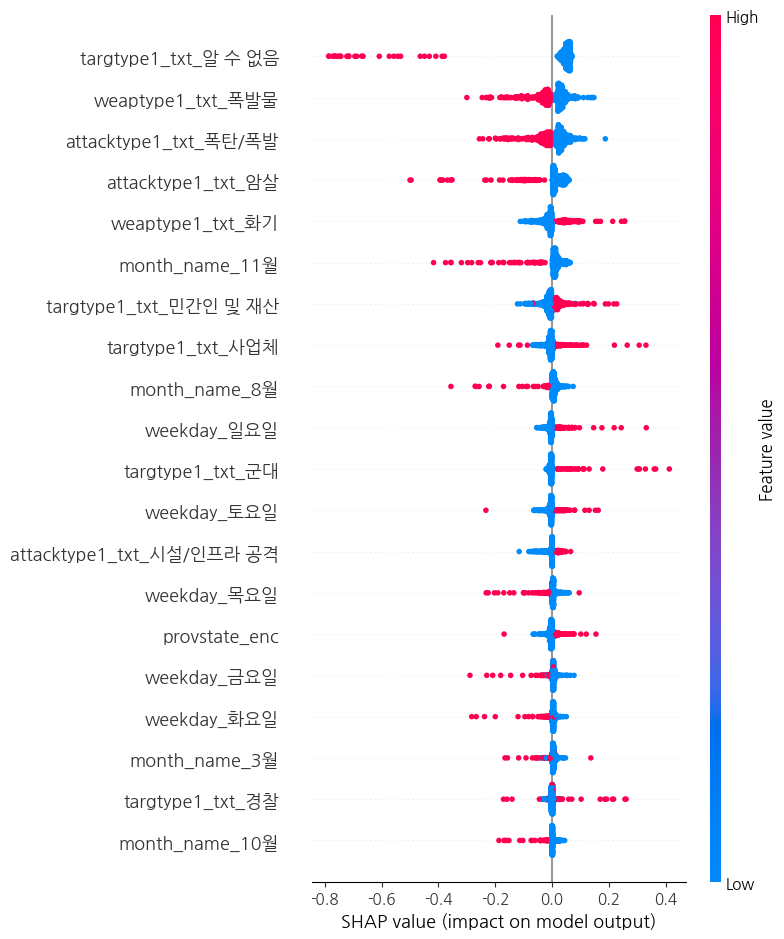

In [93]:
import shap
import pandas as pd

# Step 1. TreeExplainer ÎåÄÏã† KernelExplainer ÏÇ¨Ïö© (Î™®Îì† Î™®Îç∏ Ìò∏Ìôò)
explainer = shap.Explainer(stack_model.predict, X_test_scaled)

# Step 2. SHAP Í∞í Í≥ÑÏÇ∞
shap_values = explainer(X_test_scaled)

# Step 3. ÏöîÏïΩ ÏãúÍ∞ÅÌôî
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns)


XÏ∂ï: Ïò§Î•∏Ï™Ω: ÌÖåÎü¨ ÏÑ±Í≥µÏóê ÏòÅÌñ•ÏùÑ Ï£ºÎäî ÏöîÏù∏

ÏÉâÍπî: ÏûÖÎ†•Í∞íÏù¥ ÌÅ¨Î©¥ Î∂âÏùå

ÏÉÅÎã®Ïóê ÏûàÎäî Î≥ÄÏàòÍ∞Ä Ï§ëÏöîÌïú Î≥ÄÏàò

# SHAP Ìï¥ÏÑù
SHAP Í≤∞Í≥ºÌï¥ÏÑùÏùÑ ÌÜµÌï¥ ÌÖåÎü¨ ÎåÄÏùë Ï†ÑÎûµ ÏàòÎ¶Ω Ïãú Ïñ¥Îñ§ Ï°∞Í±¥ÏóêÏÑú ÌÖåÎü¨Í∞Ä ÏÑ±Í≥µÌïòÍ±∞ÎÇò Ï¢åÏ†àÌïòÍ∏∞ Ïâ¨Ïö¥ÏßÄÏóê ÎåÄÌïú Ïù∏ÏÇ¨Ïù¥Ìä∏Î•º ÏñªÏùÑ Ïàò ÏûàÏóàÎã§.

SVMÏùÑ ÌôúÏö©Ìïú ÏòÅÍµ≠ ÌÖåÎü¨ ÏÑ±Í≥µ Ïó¨Î∂Ä ÏòàÏ∏° Î™®Îç∏ÏóêÏÑúÎäî <U>Í≥µÍ≤© ÎåÄÏÉÅ Ïú†Ìòï, Í≥µÍ≤©/Î¨¥Í∏∞ ÏàòÎ≤ï, ÏãúÍ∞ÑÏ†Å ÏöîÏù∏, ÏßÄÏó≠ Î≥ÄÏàò</U> Îì±Ïù¥ ÏòàÏ∏°Ïóê ÌïµÏã¨Ï†ÅÏù∏ Ïó≠Ìï†ÏùÑ ÌïòÍ≥† ÏûàÏùåÏùÑ ÌôïÏù∏ÌñàÎã§.




(ÎäêÎÇÄÏ†êüå±)

Î≤îÏ£ºÌòï Î≥ÄÏàò Ïù∏ÏΩîÎî© Í∏∞Î≤ï ÏÑ†ÌÉùÏù¥ Ïù¥Îü¨Ìïú Í≤∞Í≥º Ìï¥ÏÑùÏóê Ï§ëÏöîÌïòÎ©∞, Ïõê-Ìï´ Ïù∏ÏΩîÎî©ÏùÑ ÌÜµÌï¥ Í∞úÎ≥Ñ Î≤îÏ£ºÏùò ÏòÅÌñ•Î†•ÏùÑ Î™ÖÌôïÌûà ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÎã§


## Ïã§Ìå®ÏôÄ Í∞ïÌïòÍ≤å Ïó∞Í≤∞Îêú Î≥ÄÏàòÎì§

1. ÌÉÄÍπÉ Ïú†ÌòïÏù¥ 'Ïïå Ïàò ÏóÜÏùå'Ïù∏ Í≤ΩÏö∞

    ÌÉÄÍπÉÏù¥ Î™ÖÌôïÌïòÏßÄ ÏïäÍ±∞ÎÇò Í≥ÑÌöçÏù¥ ÎØ∏Ìù°Ìïú Í≤ΩÏö∞, Ïã§Ìñâ Îã®Í≥ÑÏóêÏÑú Ï†ÄÏßÄÎêòÍ±∞ÎÇò ÏõêÌïòÎäîÎåÄÎ°ú Ïã§ÌñâÎêòÏßÄ ÏïäÏïÑ Î™©Ï†ÅÏùÑ Ïù¥Î£®ÏßÄ Î™ªÌï¥ Ïã§Ìå®ÎùºÍ≥† ÌåêÎã®Ìï† Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùÄÎìØ ÌïòÎã§.

2. Î¨¥Í∏∞ Ïú†ÌòïÏúºÎ°ú Ìè≠Î∞úÎ¨ºÏù¥ ÏÇ¨Ïö©Îêú Í≤ΩÏö∞,

    ÏòàÏÉÅÍ≥º Îã¨Î¶¨ ÏÑ±Í≥µÎ≥¥Îã§Îäî Ïã§Ìå®ÏôÄ Îçî Í∞ïÌïòÍ≤å Ïó∞Í≤∞ÎêòÏñ¥ ÏûàÏóàÎã§. Ïù¥Îäî ÏòÅÍµ≠ ÎÇ¥ Ìè≠Î∞úÎ¨ºÏóê ÎåÄÌïú ÏÇ¨Ï†Ñ ÌÉêÏßÄ Î∞è ÎåÄÏùë Ï≤¥Í≥ÑÍ∞Ä Ïûò Í∞ñÏ∂∞Ï†∏ ÏûàÏùåÏùÑ ÏãúÏÇ¨ÌïòÎ©∞, Ìè≠Î∞úÎ¨º Í≥µÍ≤©Ïù¥ ÏûêÏ£º Î∞úÏÉùÌïòÏßÄÎßå Í∑∏ÎßåÌÅº ÏûêÏ£º Ï†ÄÏßÄÎêòÏóàÏùåÏùÑ ÏùòÎØ∏Ìï† Ïàò ÏûàÎã§.

3. Í≥µÍ≤© Î∞©ÏãùÏù¥ Ìè≠ÌÉÑ/Ìè≠Î∞úÏù¥Í±∞ÎÇò ÏïîÏÇ¥Ïù∏ Í≤ΩÏö∞,

    Ïã§Ìå® Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÎã§. Îëê Î∞©Ïãù Î™®Îëê Í≥†ÏúÑÌóò ÌëúÏ†ÅÏùÑ Í≤®ÎÉ•ÌïòÍ±∞ÎÇò ÎåÄÏ§ëÏ†Å Ïû•ÏÜåÎ•º ÎåÄÏÉÅÏúºÎ°ú ÌïòÏßÄÎßå, Ïã§Ìñâ ÎÇúÏù¥ÎèÑÎÇò Î≥¥Ïïà Ï≤¥Í≥ÑÎ°ú Ïù∏Ìï¥ ÏÑ±Í≥µÎ•†Ïù¥ ÎÇÆÍ≤å ÎÇòÌÉÄÎÇú Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.

4. 11ÏõîÏóê Î∞úÏÉùÌïú ÌÖåÎü¨Îäî Î™®Îç∏ÏÉÅ Ïã§Ìå®Î•†Ïù¥ ÎÜíÎã§.

## ÏÑ±Í≥µÍ≥º Í∞ïÌïòÍ≤å Ïó∞Í≤∞Îêú Î≥ÄÏàòÎì§

1. Î¨¥Í∏∞ Ïú†ÌòïÏù¥ ÌôîÍ∏∞Ïùº Í≤ΩÏö∞,

    Î™®Îç∏ÏùÄ ÌÖåÎü¨Ïùò ÏÑ±Í≥µÎ•†ÏùÑ ÎÜíÏù¥Îäî ÏöîÏÜåÎ°ú ÌåêÎã®ÌñàÎã§.ÏùÄÎ∞ÄÏÑ±Í≥º Í∏∞ÎèôÏÑ±Ïù¥ ÎÜíÏïÑ Ìè≠Î∞úÎ¨ºÎ≥¥Îã§ ÌÉêÏßÄÍ∞Ä Ïñ¥Î†§Ïö∞Î©∞, Ïù∏Î™Ö ÌîºÌï¥Î°ú Ïù¥Ïñ¥Ïßà Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅ¨Í∏∞ ÎïåÎ¨∏Ïóê ÌÖåÎü¨Ïùò Î™©Ï†Å Îã¨ÏÑ±Î•†Ïù¥ ÎÜíÏùÄ Í≤ÉÏúºÎ°ú Ìï¥ÏÑùÌï¥Î≥∏Îã§.

2. ÌÉÄÍπÉÏù¥ ÎØºÍ∞ÑÏù∏ ÎòêÎäî ÏÇ¨ÏóÖÏ≤¥Ïù∏ Í≤ΩÏö∞,
    
    Ï¶â **ÏÜåÌîÑÌä∏ ÌÉÄÍπÉ**ÏùºÏàòÎ°ù ÌÖåÎü¨Ïùò ÏÑ±Í≥µ ÌôïÎ•†Ïù¥ ÎÜíÏùÄ Í≤ΩÌñ•ÏùÑ Î≥¥ÏòÄÎã§. Ïù¥Îäî Î≥¥ÏïàÏù¥ ÌóàÏà†ÌïòÍ±∞ÎÇò Í∞úÎ∞©Îêú Í≥µÍ∞ÑÏóêÏÑú Ïù¥Î£®Ïñ¥ÏßÑ ÌÖåÎü¨Í∞Ä Ïã§Ìñâ ÏÑ±Í≥µÏúºÎ°ú Ïù¥Ïñ¥ÏßÄÎäî Í≤ΩÏö∞Í∞Ä ÎßéÏùåÏùÑ ÏùòÎØ∏ÌïúÎã§.

3. 8ÏõîÏóê Î∞úÏÉùÌïú ÌÖåÎü¨Îäî ÏÑ±Í≥µÍ≥º Ïó∞Í¥ÄÎêòÏñ¥ ÏûàÏóàÎã§.
    
    Ïó¨Î¶ÑÏ≤† Í¥ÄÍ¥ë Ïù∏Ìåå Ï¶ùÍ∞Ä, ÏïºÏô∏ÌñâÏÇ¨ Îì±ÏúºÎ°ú Ïù∏Ìï¥ Î≥¥ÏïàÏù¥ ÎäêÏä®Ìïú ÏãúÍ∏∞Î•º ÎÖ∏Î¶∞ Í≥µÍ≤©Ïù¥ ÏÑ±Í≥µÌñàÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÎã§.

4. ÏöîÏùº Î≥ÄÏàòÏóêÏÑúÎèÑ ÌÜ†ÏöîÏùºÍ≥º ÏùºÏöîÏùºÏù¥ ÏÑ±Í≥µÍ≥º Ïú†ÏùòÎØ∏Ìïú Í¥ÄÎ†®ÏÑ±ÏùÑ Î≥¥ÏòÄÎã§.

    Ï£ºÎßêÏùÄ ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏÇ¨ÎûåÎì§Ïùò ÌôúÎèôÎüâÏù¥ ÎßéÍ≥†, Í≥µÍ≥µÏû•ÏÜåÍ∞Ä ÌòºÏû°Ìï¥ÏßÄÎØÄÎ°ú ÌÖåÎü¨ Ïã§ÌñâÏù¥ Ïö©Ïù¥Ìï¥ÏßÄÎäî ÌôòÍ≤ΩÏù¥ ÌòïÏÑ±ÎêòÏÑúÎùºÍ≥† ÏÉùÍ∞ÅÎêúÎã§.

5. ÌÉÄÍπÉÏù¥ Íµ∞ÎåÄÏù∏ Í≤ΩÏö∞ÏóêÎèÑ ÏÑ±Í≥µÎ•†Ïù¥ ÎÜíÍ≤å ÎÇòÌÉÄÎÇ¨Îã§.
    
    ÏùºÎ∞òÏ†ÅÏù∏ ÏòàÏ∏°Í≥ºÎäî Îã§ÏÜå Îã§Î•∏ Í≤∞Í≥ºÏù¥Îã§. Íµ∞ Í¥ÄÎ†® ÏãúÏÑ§ Ï§ë Í≤ΩÍ≥ÑÍ∞Ä Ï∑®ÏïΩÌïú Ïô∏Î∂Ä Ïù¥Îèô Í≤ΩÎ°úÎÇò Î≥¥Í∏â ÎùºÏù∏ ÌòπÏùÄ ÏÇ¨Í∞ÅÏßÄÎåÄÎì±ÏóêÏÑú Í≥µÍ≤©Ïù¥ Ïù¥Î£®Ïñ¥ÏßÑ Í∞ÄÎä•ÏÑ±ÏùÑ Ï∂îÏ∏°Ìï¥Î≥º Ïàò ÏûàÎã§.

#ÏµúÏ¢Ö Ïù∏ÏÇ¨Ïù¥Ìä∏

ÏòÅÍµ≠Ï†ïÎ∂ÄÏùò 2025ÎÖÑ ÏãúÌñâ ÏòàÏ†ïÏù∏ Terrorism (Protection of Premises) Act (Martyn‚Äôs Law)ÏùÑ ÌÜµÌï¥ ÌÖåÎü¨Ïóê Ï∑®ÏïΩÌïú Ïû•ÏÜå(ÌäπÌûà ÎåÄÍ∑úÎ™® ÌñâÏÇ¨Ïû•, Îã§Ï§ëÏù¥Ïö©ÏãúÏÑ§)Ïùò Î≥¥Ïïà ÏàòÏ§ÄÏùÑ ÎÜíÏù¥Í≥† Ï°∞ÏßÅÏùò Ï§ÄÎπÑÏÑ±ÏùÑ Í∞ïÌôîÌï† Í≥ÑÌöçÏùÑ ÌôïÏù∏ÌñàÎã§.

Ï∂úÏ≤ò: https://homeofficemedia.blog.gov.uk/2025/04/03/martyns-law-factsheet/

---




## üí°Ï†ÑÎûµ1 : ÏÜåÌòï Í≥µÍ∞Ñ ÎßûÏ∂§Ìòï ÎåÄÏùë Îß§Îâ¥Ïñº ÏÑ∏Î∂ÑÌôî

**üìú Martyn‚Äôs Law:**

>ÌòÑÌñâÎ≤ïÏÉÅ 200Ïù∏ Ïù¥ÏÉÅ ÏãúÏÑ§Îßå ‚ÄòStandard Duty Premises‚ÄôÎ°ú Ìè¨Ìï®


ÌïòÏßÄÎßå Ïã§Ï†úÎ°úÎäî Ïù∏ÏõêÏù¥ Ï†ÅÏñ¥ÎèÑ ÏÜåÌîÑÌä∏ ÌÉÄÍπÉÏù¥Î©¥ Í≥†ÏúÑÌóòÏùº Ïàò ÏûàÏùå

**‚úÖ Í∞úÏÑ†Î∞©Ïïà Ï†úÏïà:**

> ÏãúÏÑ§ Í∑úÎ™®Í∞Ä ÏïÑÎãå "Í≥µÍ≤© Ïú†Ìòï √ó ÎåÄÏÉÅ ÌäπÏÑ±" Í∏∞Ï§ÄÏúºÎ°ú Standard Ï†ÅÏö© Ïó¨Î∂Ä ÌåêÎã®


    **Standard Duty Premises: ÌÖåÎü¨ ÏúÑÌòëÏúºÎ°úÎ∂ÄÌÑ∞ ÎåÄÏ§ëÏùÑ Î≥¥Ìò∏ÌïòÍ∏∞ ÏúÑÌï¥ ÌäπÏ†ï Í∑úÎ™® Ïù¥ÏÉÅÏùò ÏãúÏÑ§Ïóê ÎåÄÌï¥ ÏùòÎ¨¥Ï†ÅÏúºÎ°ú ÎåÄÎπÑ Ï†àÏ∞®Î•º Í∞ñÏ∂îÎèÑÎ°ù Î≤ïÏ†ÅÏúºÎ°ú ÏöîÍµ¨Î∞õÎäî ÏãúÏÑ§

---

## üí°Ï†ÑÎûµ2: Í≥µÍ≤© Ïú†ÌòïÎ≥Ñ ÎåÄÏùë Îß§Îâ¥Ïñº Îã§Í∞ÅÌôî
- ÎèÑÏ∂úÌïú Ïù∏ÏÇ¨Ïù¥Ìä∏ÏóêÏÑú Ï¥ùÍ∏∞ Í≥µÍ≤©ÏùÄ ÏÑ±Í≥µÎ•† ‚Üë / Ìè≠ÌÉÑ Í≥µÍ≤©ÏùÄ Ïã§Ìå® ‚Üë

    ‚Üí ÏàòÎ≤ïÎ≥Ñ ÎåÄÏùëÎ†• Ï∞®Ïù¥ Ï°¥Ïû¨

**üìú Martyn‚Äôs Law:**

> Î≤ïÏïàÏùÄ "Í≥µÍ≥µÎ≥¥Ìò∏ Ï†àÏ∞®"Î•º Î™ÖÏãúÌïòÏßÄÎßå, Í≥µÍ≤© Ïú†ÌòïÎ≥Ñ ÏãúÎÇòÎ¶¨Ïò§ Ï∞®Îì± Ïñ∏Í∏âÏùÄ ÏóÜÏùå

**‚úÖ Í∞úÏÑ†Î∞©Ïïà Ï†úÏïà:**

> Í≥µÍ≤© ÏàòÎã®Î≥Ñ ÎåÄÏùë ÏãúÎÇòÎ¶¨Ïò§Î•º  Îß§Îâ¥ÏñºÏóê Ìè¨Ìï®

> ÏãúÏÑ§ÏùÑ Ï†ÑÎûµ1ÏóêÏÑúÏùò Í≥µÍ≤© Ïú†Ìòï x ÎåÄÏÉÅ ÌäπÏÑ±Í≥º Í∞ôÏùÄ Î∞©ÏãùÏúºÎ°ú Î∂ÑÎ•òÌïòÏó¨, Í∞ÅÍ∞ÅÏùò ÏãúÏÑ§Ïù¥ ÏûêÏã†Ïùò Ïú†ÌòïÏóê ÎßûÎäî ÏãúÎÇòÎ¶¨Ïò§Î•º 2~3Í∞ú Ï†ïÎèÑÎßå ÏàôÏßÄÌïòÎ©¥ ÎêòÎèÑÎ°ù Îã®ÏàúÌôîÌïòÎäî Í≤ÉÏù¥ ÌïÑÏöîÌï† ÎìØÌïòÎã§(Ïã§ÌñâÎ†•Í≥º ÌôúÏö©Î†•ÏùÑ ÎÜíÏù¥Í∏∞ ÏúÑÌï¥)

ÏòàÏãú)

- Ï¥ùÍ∏∞: ÏùÄÌèê, Ï∞®Îã® Ïö∞ÏÑ† / ÏßÅÏõê ÌîºÎÇú Î£®Ìä∏ Ï§ëÏã¨

- Ìè≠Î∞úÎ¨º: Ï¶âÏãú Í≤ΩÍ≥† Î∞©ÏÜ° / Ï∂úÏûÖÌÜµÏ†ú Î∞è 2Ï∞® ÌîºÌï¥ Î∞©ÏßÄ Ïö∞ÏÑ† / Ìè≠Î∞ú ÌÖåÎü¨ Î∞úÏÉù ÏúÑÌóò ÏßÄÏó≠ Í∑ºÏ≤òÏóê ÏÜåÎ∞©ÏÑúÎÇò Í≤ΩÏ∞∞ÏÑúÍ∞ôÏùÄ ÏãúÏÑ§ Î∞∞Ïπò

---

## üí°Ï†ÑÎûµ3: ÏöîÏùº Í∏∞Î∞ò Î≥¥Ïïà Ï†êÍ≤Ä Í∞ÄÏù¥ÎìúÎùºÏù∏ ÎßàÎ†®

**üìú Martyn‚Äôs Law:**

>Ïù∏Ïõê Ïàò Ï§ëÏã¨ Î∂ÑÎ•ò Ïô∏ÏóêÎäî ÏãúÍ∞Ñ¬∑ÏãúÏ†êÏóê ÎåÄÌïú Í≥†Î†§ ÏóÜÏùå


**‚úÖ Í∞úÏÑ†Î∞©Ïïà Ï†úÏïà:**

> ÏöîÏùº/ÏãúÍ∞ÑÎåÄÎ≥Ñ ÏúÑÌóò Ï†êÏàòÎ•º ÏÇ∞Ï∂úÌïòÎäî ÎÇ¥Î∂Ä ÎåÄÏãúÎ≥¥Îìú ÏãúÏä§ÌÖú Íµ¨Ï∂ïÌïòÏó¨ Ïù∏Î†•ÏùÑ ÏöîÏùº/ÏãúÍ∞ÑÎåÄÎ≥ÑÎ°ú Ìö®Ïú®Ï†ÅÏúºÎ°ú Ïö¥ÏòÅÌï† Ïàò ÏûàÎäî Î≥¥Ïïà ÏãúÏä§ÌÖú ÎèÑÏûÖ

>ÌÖåÎü¨ ÏúÑÌòë Îì±Í∏âÏùÑ ÌäπÏ†ï ÏõîÍ≥º ÏöîÏùºÏùÑ Í∏∞Ï§ÄÏúºÎ°ú **Ï∞®Îì±Ï†ÅÏúºÎ°ú Ïö¥ÏòÅ**ÌïòÏó¨ Í≤ΩÍ≥Ñ Í∞ïÌôîÎ•º Ìö®Í≥ºÏ†ÅÏúºÎ°ú Î∞∞Ïπò

---
## üí°Ï†ÑÎûµ4: Íµ∞ Í¥ÄÎ†® ÏãúÏÑ§Ïùò ÎπÑÍ≥µÏãù Ï†ëÏ†ê Î≥¥ÏôÑ

**üìú Martyn‚Äôs Law:**

>ÎØºÍ∞Ñ Ï§ëÏã¨ Î≤ïÎ†πÏù¥Ïñ¥ÏÑú Íµ∞ ÏãúÏÑ§Ïóê Í¥ÄÌïú ÎÇ¥Ïö©ÏùÄ ÏóÜÏßÄÎßå, ÌïòÎìúÌÉÄÍπÉÏù¥Îùº Í∞ÑÍ≥ºÎêêÎçò Íµ∞ Î∂ÄÎåÄÏóêÎ•º ÎåÄÏÉÅÏúºÎ°ú Ìïú ÌÖåÎü¨Í∞Ä ÏÑ±Í≥µÎ•†Ïù¥ ÎÜíÍ≤å ÎÇòÏò¥.


**‚úÖ Í∞úÏÑ†Î∞©Ïïà Ï†úÏïà:**

> Enhanced Duty PremisesÏóê Íµ∞ Ïó∞Í≥Ñ ÎØºÍ∞Ñ ÏãúÏÑ§ÎèÑ Ìè¨Ìï®ÌïòÏó¨ Íµ∞Í≥º Ï†ëÏ†êÏù¥ ÏûàÎäî ÎØºÍ∞ÑÏãúÏÑ§Îì§(Í≥ÑÏïΩÏãúÏÑ§, Î≥¥Í∏âÍ∏∞ÏßÄ, Ïô∏Ï£º ÏóÖÏ≤¥ Îì±)Îøê ÏïÑÎãàÎùº Íµ∞ ÏãúÏÑ§ ÎòêÌïú Ìï®Íªò Î≥¥Ìò∏


#Ïôú ÏòÅÍµ≠Ïù¥ ÏÑúÏú†ÎüΩ Íµ≠Í∞Ä Ï§ë ÌÖåÎü¨ ÏÑ±Í≥µÎ•†Ïù¥ Í∞ÄÏû• ÎÇÆÏùÑÍπå? (Ï∂îÍ∞Ä ÏÑúÏπò ÎÇ¥Ïö© Ï†ïÎ¶¨)


## 1. ÏÇ¨Ï†Ñ Ï∞®Îã® Îä•Î†•

2017ÎÖÑ Ïù¥Îûò ÏòÅÍµ≠ Ï†ïÎ∂ÄÍ∞Ä ÌõÑÎ∞òÎ∂ÄÏóê ÏßÑÏûÖÌïú(late-stage) ÌÖåÎü¨ Í≥ÑÌöç 43Í±¥ÏùÑ Ï∞®Îã®Ìï®

‚û°Ô∏è Îß§Ïö∞ ÎÜíÏùÄ ÎåÄÏùëÎ†•Í≥º Ï†ïÎ≥¥Î†•Ïù¥ ÏûàÏñ¥ÏÑú Í∞ÄÎä•Ìïú Í≤É Í∞ôÏùå (ÏòÅÍµ≠ÏùÄ ÌÖåÎü¨Î∞©ÏßÄÏßëÎã®Ïù¥ Îî∞Î°ú ÏûàÏùå- Ïù¥Î¶Ñ Ï∞æÍ∏∞).

##2. Î≤ïÏ†Å ÎåÄÏùë Ï†ÑÎûµÍ≥º Î™ÖÌôïÌïú Ïó≠Ìï† Î∂ÑÎã¥
ÏòÅÍµ≠Ïùò ÏÉàÎ°úÏö¥ Î≤ïÎ•†(Martyn‚Äôs Law)ÏùÑ Î≥¥Î©¥Î≥¥Ïïà Ï±ÖÏûÑÏùÑ Î™ÖÌôïÌûà ÌïòÍ≥† ÏãúÏÑ§Î≥Ñ ÎßûÏ∂§Ìòï ÎåÄÏùëÏ±ÖÏùÑ Î≤ïÏ†ÅÏúºÎ°ú ÏöîÍµ¨ÌïòÍ≥† ÏûàÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏùå

‚û°Ô∏è ÏãúÏÑ§ Í¥ÄÎ¶¨ÏûêÏôÄ ÏßÄÏó≠ Ï±ÖÏûÑÏûêÍ∞Ä ÏÇ¨Ï†ÑÏóê ÌÖåÎü¨ ÎåÄÏùëÏ±ÖÏùÑ ÎßàÎ†®ÌïòÍ≥† ÌõàÎ†®ÌïòÏó¨, Ïã§Ï†ú ÌÖåÎü¨ Î∞úÏÉù Ïãú ÌòºÎûÄÏùÑ ÏµúÏÜåÌôîÌïòÎäî Ìö®Í≥ºÎ•º Í±∞Îëò Ïàò ÏûàÏóàÎçò Í≤ÉÏù¥ÎùºÍ≥† ÏÉùÍ∞ÅÌï®

## 3. ÏßÄÏÜçÏ†ÅÏù∏ ÌÖåÎü¨ ÎåÄÎπÑ ÌõàÎ†® Î∞è Íµê
ÏòÅÍµ≠ Ï†ïÎ∂ÄÎäî ÌÖåÎü¨ ÏúÑÌòë ÏàòÏ§Ä("Substantial")ÏúºÎ°ú ÏÑ§Ï†ïÌïòÏó¨ Íµ≠ÎØºÍ≥º Í∏∞Í¥ÄÏùò ÎåÄÎπÑ ÌõàÎ†®ÏùÑ ÏùºÏÉÅÌôîÌïòÍ≥† ÏûàÏùå

##4. Î≥¥Ïïà Ïù∏ÌîÑÎùº Íµ¨Ï∂ï
ÏòÅÍµ≠Ïùò ÌÖåÎü¨ Ïù¥Î†•..?ÏùÑ ÏÇ¥Ìé¥Î≥¥ÏïòÏùÑ Îïå ÎåÄÍ∑úÎ™® ÌÖåÎü¨Í∞Ä ÏûàÏóàÏùå- IRAÌÖåÎü¨
Í∑∏ÎûòÏÑú Ïù¥ÎØ∏ Ï£ºÏöî ÏãúÏÑ§Í≥º ÏßÄÏó≠Ïùò Î≥¥Ïïà ÏãúÏä§ÌÖúÏù¥ Ïûò Í∞ñÏ∂îÏñ¥Ï†∏ÏûàÏóàÏùÑ Í≤ÉÏù¥ÎùºÍ≥† Ï∂îÏ∏°

---


## ELI5
- ELI5Ïã§ÌñâÍ≤∞Í≥º, ÏÑ±Í≥µÍ≥º Ïã§Ìå®Ïóê ÏòÅÌñ•ÏùÑ Ï£ºÎäî Î≥ÄÏàòÎì§ÏùÑ Î∂ÑÎ¶¨Ìï¥ÏÑú ÌôïÏù∏Ìï† Ïàò ÏóÜÏóàÍ∏∞ ÎïåÎ¨∏Ïóê, SHAPÏùò ÏãúÍ∞ÅÌôî Í≤∞Í≥ºÎßå ÌôúÏö©


In [94]:
!pip install eli5

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 108.6/108.6 kB 4.3 MB/s eta 0:00:00


In [95]:
import eli5
from eli5.sklearn import PermutationImportance

# 1. PermutationImportance Í∞ùÏ≤¥ ÏÉùÏÑ± (ÎûúÎç§ÏÑ± ÏûàÏùå ‚Üí random_state Í≥†Ï†ï Ï∂îÏ≤ú)
perm = PermutationImportance(stack_model, random_state=42)
perm.fit(X_test_scaled, y_test)  # y_testÎäî Ïã§Ï†ú ÌÉÄÍ≤üÍ∞í

# 2. Î≥ÄÏàò Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
eli5.show_weights(perm, feature_names=X_test.columns.tolist())


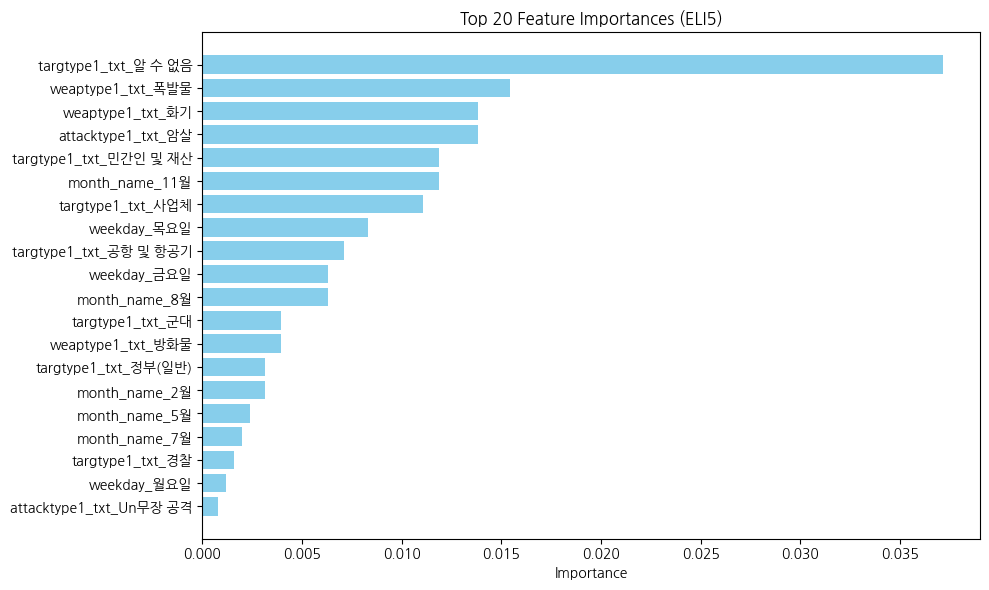

In [96]:
import eli5
from eli5.sklearn import PermutationImportance
import pandas as pd
import matplotlib.pyplot as plt

# Permutation Importance Í≥ÑÏÇ∞
perm = PermutationImportance(stack_model, random_state=42)
perm.fit(X_test_scaled, y_test)

# Í≤∞Í≥ºÎ•º pandas DataFrameÏúºÎ°ú Î≥ÄÌôò
df_weights = eli5.explain_weights_df(perm, feature_names=X_test.columns.tolist())

# ÏÉÅÏúÑ 20Í∞úÎßå ÏãúÍ∞ÅÌôî
top_weights = df_weights.head(20)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.barh(top_weights['feature'], top_weights['weight'], color='skyblue')
plt.xlabel("Importance")
plt.title("Top 20 Feature Importances (ELI5)")
plt.gca().invert_yaxis()  # Í∞ÄÏû• Ï§ëÏöîÌïú featureÍ∞Ä ÏúÑÎ°ú Ïò§Í≤å
plt.tight_layout()
plt.show()
